<center><img src="Logo.png" alt="logo"></center>

<h5 style="color:blue">
Presentado por el Alumno: Javier Edgar Esteban 
Ghithub: JavierEdgarEsteban77 
Carrera: DataScience Cohorte 05PT 02 Año 2.023</h5>

<h3 style="color:green">
Proyecto: Obtención del Minimum Viable Product (MUV) solicitado por la empresa Steam sobre la recomendación de videos juegos y optimización para usuarios: 'worried'</h3>

<h5 style="color:white">
Propuesta de Trabajo

En este notebook primero vamos a trabajar el Extract, Transform and Load (ETL) el cual trabajaremos el Rol de Data Engineer y posteriormente el 

Análisis Exploratorio de Datos (EDA).

La impronta que tendrá este trabajo individual desde el punto de vista técnico es extraer los datos en dónde trabajaremos los archivos:

steam_games.json; user__reviews.json y users_items.json

Cargo los datos de archivos JSON y los convierto en DataFrames de Pandas. Una vez transformados a nuestros df, estaremos en condición de la posterior preparación de la documentación para poder realizar un correcto análisis exploratorio que satisfaga las nececidades de nuestro cliente brindando información de calidad para una correcta toma de desición.

In [1]:
# Importo librerías.
import json
import pandas as pd
import ast
from tqdm import tqdm

# Creo la función para leer las líneas de cada dataset.
def leer_datos(ruta, tipo='json'):
    """
    Esta función lee datos desde cada archivo de mi carpeta y los convierte en un DataFrame de pandas.

    Args:
        ruta (str): La ruta al archivo que se va a leer.
        tipo (str, optional): El formato de los datos en el archivo. Puede ser 'json' o 'literal'. 
                              Si es 'json', los datos se cargarán utilizando json.loads. 
                              Si es 'literal', los datos se cargarán utilizando ast.literal_eval. 
                              Por defecto es 'json'.

    Returns:
        pd.DataFrame: Un DataFrame de pandas que contiene los datos leídos del archivo.
    """
    filas = []  # Será la lista para almacenar cada fila de datos

    # Abro el archivo en modo lectura con codificación utf-8

    with open(ruta, encoding='utf-8') as f:
        # Leo cada línea del archivo
        for line in tqdm(f.readlines(), desc=f"Leyendo {ruta}"):
            # Si el tipo es 'json', carga los datos con json.loads
            if tipo == 'json':
                data = json.loads(line)
            # Si el tipo es 'literal', carga los datos con ast.literal_eval
            elif tipo == 'literal':
                data = ast.literal_eval(line)
             # Añado los datos a la lista de filas
            filas.append(data)

    # Convierto la lista de filas en un DataFrame de pandas y lo devuelve.
    return pd.DataFrame(filas)

# Determino la ruta de cada dataset.
ruta_games = r'C:\Users\Esteban García\OneDrive\Escritorio\LABs\PIMLOPS JEE\Datasets\steam_games.json'
ruta_reviews = r'C:\Users\Esteban García\OneDrive\Escritorio\LABs\PIMLOPS JEE\Datasets\user_reviews.json'
ruta_items = r'C:\Users\Esteban García\OneDrive\Escritorio\LABs\PIMLOPS JEE\Datasets\users_items.json'

# Convierto en dataframe cada datasets
df_steam_games = leer_datos(ruta_games, tipo='json')
df_user_reviews = leer_datos(ruta_reviews, tipo='literal')
df_users_items = leer_datos(ruta_items, tipo='literal')

Leyendo C:\Users\Esteban García\OneDrive\Escritorio\LABs\PIMLOPS JEE\Datasets\steam_games.json:  32%|███▏      | 38249/120445 [00:00<00:01, 69068.25it/s]

Leyendo C:\Users\Esteban García\OneDrive\Escritorio\LABs\PIMLOPS JEE\Datasets\steam_games.json: 100%|██████████| 120445/120445 [00:01<00:00, 71482.45it/s]
Leyendo C:\Users\Esteban García\OneDrive\Escritorio\LABs\PIMLOPS JEE\Datasets\user_reviews.json: 100%|██████████| 25799/25799 [00:03<00:00, 7287.12it/s]
Leyendo C:\Users\Esteban García\OneDrive\Escritorio\LABs\PIMLOPS JEE\Datasets\users_items.json: 100%|██████████| 88310/88310 [04:14<00:00, 347.11it/s] 


<h3 style="color:green">
Nuestros dataframes se llaman: df_steam_games; df_user_reviews y df_users_items

<h5 style="color:blue">
Trabajaré son Steam Games

In [2]:
# Visualizo el contenido para poder analizar los pasos a seguir.
df_steam_games

,publisher,genres,app_name,title,url,release_date,tags,reviews_url,specs,price,early_access,id,developer
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
120440,Ghost_RUS Games,"[Casual, Indie, Simulation, Strategy]",Colony On Mars,Colony On Mars,http://store.steampowered.com/app/773640/Colon...,2018-01-04,"[Strategy, Indie, Casual, Simulation]",http://steamcommunity.com/app/773640/reviews/?...,"[Single-player, Steam Achievements]",1.99,False,773640,"Nikita ""Ghost_RUS"""
120441,Sacada,"[Casual, Indie, Strategy]",LOGistICAL: South Africa,LOGistICAL: South Africa,http://store.steampowered.com/app/733530/LOGis...,2018-01-04,"[Strategy, Indie, Casual]",http://steamcommunity.com/app/733530/reviews/?...,"[Single-player, Steam Achievements, Steam Clou...",4.99,False,733530,Sacada
120442,Laush Studio,"[Indie, Racing, Simulation]",Russian Roads,Russian Roads,http://store.steampowered.com/app/610660/Russi...,2018-01-04,"[Indie, Simulation, Racing]",http://steamcommunity.com/app/610660/reviews/?...,"[Single-player, Steam Achievements, Steam Trad...",1.99,False,610660,Laush Dmitriy Sergeevich
120443,SIXNAILS,"[Casual, Indie]",EXIT 2 - Directions,EXIT 2 - Directions,http://store.steampowered.com/app/658870/EXIT_...,2017-09-02,"[Indie, Casual, Puzzle, Singleplayer, Atmosphe...",http://steamcommunity.com/app/658870/reviews/?...,"[Single-player, Steam Achievements, Steam Cloud]",4.99,False,658870,"xropi,stev3ns"


### Para una correcta visualización de todas mis salidas, ajustaré antes de comenzar las salidas al ancho de mi pantalla.

In [3]:
# Importo librerías. 
import ctypes

# Obtengo el ancho de la pantalla
user32 = ctypes.windll.user32
user32.SetProcessDPIAware()
ancho, _ = user32.GetSystemMetrics(0), user32.GetSystemMetrics(1)

In [4]:
print(f"""
El df_steam_games tiene {df_steam_games.shape[0]} filas y {df_steam_games.shape[1]} columnas.
Las columnas son: {df_steam_games.columns}
""")


El df_steam_games tiene 120445 filas y 13 columnas.
Las columnas son: Index(['publisher', 'genres', 'app_name', 'title', 'url', 'release_date',
       'tags', 'reviews_url', 'specs', 'price', 'early_access', 'id',
       'developer'],
      dtype='object')



### Procederé a visualizar las columnas que contienen una lista o un diccionario.

In [5]:
# Importo librerías.
import pandas as pd

# Itero sobre cada columna
for column in df_steam_games.columns:
    # Obtengo el primer valor no nulo
    non_null_values = df_steam_games[column].dropna()
    if non_null_values.empty:
        print(f"La columna '{column}' solo contiene valores nulos.")
        continue
    first_non_null_value = non_null_values.iloc[0]

    # Compruebo si es una lista o un diccionario
    if isinstance(first_non_null_value, list):
        print(f"La columna '{column}' contiene una lista.")
    elif isinstance(first_non_null_value, dict):
        print(f"La columna '{column}' contiene un diccionario.")
    else:
        print(f"La columna '{column}' no contiene ni listas ni diccionarios.")

La columna 'publisher' no contiene ni listas ni diccionarios.
La columna 'genres' contiene una lista.
La columna 'app_name' no contiene ni listas ni diccionarios.
La columna 'title' no contiene ni listas ni diccionarios.
La columna 'url' no contiene ni listas ni diccionarios.
La columna 'release_date' no contiene ni listas ni diccionarios.
La columna 'tags' contiene una lista.
La columna 'reviews_url' no contiene ni listas ni diccionarios.
La columna 'specs' contiene una lista.
La columna 'price' no contiene ni listas ni diccionarios.
La columna 'early_access' no contiene ni listas ni diccionarios.
La columna 'id' no contiene ni listas ni diccionarios.
La columna 'developer' no contiene ni listas ni diccionarios.


### Desanido columnas que contienen listas creando variables ficticias con dumies para conocer su contenido.

In [6]:
# Importo librerías.
import pandas as pd

def desanidar_y_crear_dummies(df, column):
    """
    Esta función desanida la columna 'genres', 'tags' y 'specs' y crea variables ficticias.
    
    Parámetros:
    df (pandas.DataFrame): El DataFrame a analizar.
    column (str): El nombre de la columna a desanidar y crear variables ficticias.
    
    Retorna:
    df (pandas.DataFrame): El DataFrame con las nuevas columnas.
    new_columns (list): La lista de las nuevas columnas.
    """
    # Guardo las columnas originales
    original_columns = df.columns

    # Desanido la columna y creo  variables ficticias.
    df_dummies = df[column].str.join('|').str.get_dummies()

    # Concateno las variables ficticias al DataFrame original.
    df = pd.concat([df, df_dummies], axis=1)

    # Elimino la columna original.
    df = df.drop(column, axis=1)

    # Encuentro las nuevas columnas después del desanidado
    new_columns = [col for col in df.columns if col not in original_columns]

    return df, new_columns

# Uso de la función para columnas específicas
df_steam_games = df_steam_games  # aquí coloco el nombre del df y su nombre
columns = ['genres', 'tags', 'specs']  # aquí coloco los nombres de las columnas

for column in columns:
    df_steam_games, new_columns = desanidar_y_crear_dummies(df_steam_games, column)
    if column == 'genres':
        new_columns_genres = new_columns[:5]
    elif column == 'tags':
        new_columns_tags = new_columns[:5]
    elif column == 'specs':
        new_columns_specs = new_columns[:5]

print(f"""
El df_steam_games tiene {df_steam_games.shape[0]} filas y {df_steam_games.shape[1]} columnas.
Las columnas son: {df_steam_games.columns}

Nuevas columnas para 'genres': {new_columns_genres}
Nuevas columnas para 'tags': {new_columns_tags}
Nuevas columnas para 'specs': {new_columns_specs}
""")

""" Limité la salida a los efectos de optimizar el tiempo de presentación """


El df_steam_games tiene 120445 filas y 411 columnas.
Las columnas son: Index(['publisher', 'app_name', 'title', 'url', 'release_date', 'reviews_url',
       'price', 'early_access', 'id', 'developer',
       ...
       'Steam Achievements', 'Steam Cloud', 'Steam Leaderboards',
       'Steam Trading Cards', 'Steam Turn Notifications', 'Steam Workshop',
       'SteamVR Collectibles', 'Tracked Motion Controllers',
       'Valve Anti-Cheat enabled', 'Windows Mixed Reality'],
      dtype='object', length=411)

Nuevas columnas para 'genres': ['Accounting', 'Action', 'Adventure', 'Animation &amp; Modeling', 'Audio Production']
Nuevas columnas para 'tags': ['1980s', "1990's", '2.5D', '2D', '2D Fighter']
Nuevas columnas para 'specs': ['Captions available', 'Commentary available', 'Cross-Platform Multiplayer', 'Downloadable Content', 'Full controller support']



' Limité la salida a los efectos de optimizar el tiempo de presentación '

#### Normalizo mi df_steam_games eliminando filas vacías, NaN y analizaremos en porcentajes cuántos datos nulos o vacíos representan en el total del df y desanidando 'genres'.

In [7]:
# Importo librerías.
import pandas as pd

# Guardo el número de filas antes de la eliminación.
num_rows_before = df_steam_games.shape[0]

# Imprimo los tipos de datos por columna y cantidad de nulos.
print("Tipos de datos por columna y cantidad de nulos:")
print(df_steam_games.dtypes)
print(df_steam_games.isnull().sum())

# Elimino las filas donde cualquier valor es NaN
print("Eliminando filas con valores nulos...")
df_steam_games = df_steam_games.dropna(how='any').reset_index(drop=True)

# Reseteo el índice del DataFrame
print("Reseteando el índice del DataFrame...")
df_steam_games.reset_index(drop=True, inplace=True)

# Guardo el número de filas después de la eliminación
num_rows_after = df_steam_games.shape[0]

# Calculo la reducción porcentual
reduction_percentage = (1 - num_rows_after / num_rows_before) * 100

# Imprimo la reducción porcentual
print(f"La reducción de filas es aproximadamente del {reduction_percentage:.2f}%.")

# Verifico los tipos de datos por columna.
print("Tipos de datos por columna después de la eliminación:")
print(df_steam_games.dtypes)

# Reviso las columnas
for col in df_steam_games.columns:
    print(f"Columna: {col}")
    print(f"Primer valor: {df_steam_games[col].iloc[0]}")

    # Convierto las listas a cadenas antes de llamar a unique()
    unique_values = pd.Series([str(x) if isinstance(x, list) else x for x in df_steam_games[col]]).unique()
    print(f"Valores únicos: {unique_values[:5]}\n")

""" Limité la salida a los efectos de optimizar el tiempo de presentación """

Tipos de datos por columna y cantidad de nulos:
publisher                     object
app_name                      object
title                         object
url                           object
release_date                  object
                               ...  
Steam Workshop                 int64
SteamVR Collectibles           int64
Tracked Motion Controllers     int64
Valve Anti-Cheat enabled       int64
Windows Mixed Reality          int64
Length: 411, dtype: object


publisher                     96362
app_name                      88312
title                         90360
url                           88310
release_date                  90377
                              ...  
Steam Workshop                    0
SteamVR Collectibles              0
Tracked Motion Controllers        0
Valve Anti-Cheat enabled          0
Windows Mixed Reality             0
Length: 411, dtype: int64
Eliminando filas con valores nulos...
Reseteando el índice del DataFrame...
La reducción de filas es aproximadamente del 80.97%.
Tipos de datos por columna después de la eliminación:
publisher                     object
app_name                      object
title                         object
url                           object
release_date                  object
                               ...  
Steam Workshop                 int64
SteamVR Collectibles           int64
Tracked Motion Controllers     int64
Valve Anti-Cheat enabled       int64
Windows Mixed Reality    

' Limité la salida a los efectos de optimizar el tiempo de presentación '

In [8]:
# Importo librerías.
import html

print("Normalizo los nombres de las columnas")

# Normalizo los nombres de las columnas
df_steam_games.columns = df_steam_games.columns.map(html.unescape)

# Recreo las listas 'new_columns_genres', 'new_columns_tags' y 'new_columns_specs' para reflejar los cambios en los nombres de las columnas
new_columns_genres = [col for col in df_steam_games.columns if col in new_columns_genres][:8]
new_columns_tags = [col for col in df_steam_games.columns if col in new_columns_tags][:8]
new_columns_specs = [col for col in df_steam_games.columns if col in new_columns_specs][:8]

# Imprimo los nombres de las columnas y las nuevas columnas
print(f"""
Columnas del dataframe:
{df_steam_games.columns}

Nuevas columnas para 'genres':
{new_columns_genres}

Nuevas columnas para 'tags':
{new_columns_tags}

Nuevas columnas para 'specs':
{new_columns_specs}
""")

""" Limite la salida a los efectos de optimizar el tiempo de presentación """

Normalizo los nombres de las columnas

Columnas del dataframe:
Index(['publisher', 'app_name', 'title', 'url', 'release_date', 'reviews_url',
       'price', 'early_access', 'id', 'developer',
       ...
       'Steam Achievements', 'Steam Cloud', 'Steam Leaderboards',
       'Steam Trading Cards', 'Steam Turn Notifications', 'Steam Workshop',
       'SteamVR Collectibles', 'Tracked Motion Controllers',
       'Valve Anti-Cheat enabled', 'Windows Mixed Reality'],
      dtype='object', length=411)

Nuevas columnas para 'genres':
['Accounting', 'Action', 'Adventure', 'Audio Production', 'Action', 'Adventure', 'Audio Production']

Nuevas columnas para 'tags':
['1980s', "1990's", '2.5D', '2D', '2D Fighter']

Nuevas columnas para 'specs':
['Captions available', 'Commentary available', 'Cross-Platform Multiplayer', 'Downloadable Content', 'Full controller support']



' Limite la salida a los efectos de optimizar el tiempo de presentación '

### Elimino duplicados.

In [9]:
# Importo librerías.
import numpy as np

# Obtengo todas las columnas del DataFrame
all_columns = df_steam_games.columns.tolist()

# Aseguro que 'developer' esté en la lista de columnas a verificar
if 'developer' not in all_columns:
    all_columns.append('developer')

# Calculo el número de columnas a seleccionar (30% de todas las columnas)
num_columns_to_check = int(len(all_columns) * 0.3)

# Selecciono un subconjunto de columnas al azar
np.random.seed(0)  # Para reproducibilidad
columns_to_check = np.random.choice(all_columns, num_columns_to_check, replace=False)

# Imprimo el número de filas antes de la eliminación de duplicados
print("Número de filas antes de la eliminación de duplicados:", df_steam_games.shape[0])

# Elimino los duplicados del DataFrame
df_steam_games.drop_duplicates(subset=columns_to_check, keep='first', inplace=True)

# Imprimo el número de filas después de la eliminación de duplicados
print("Número de filas después de la eliminación de duplicados:", df_steam_games.shape[0])

# Imprimo las columnas que se usaron para verificar los duplicados
print("\nColumnas que se usaron para verificar los duplicados:") 
print(columns_to_check[:10])

""" Limite la salida a los efectos de optimizar el tiempo de presentación """

Número de filas antes de la eliminación de duplicados: 22916
Número de filas después de la eliminación de duplicados: 22915

Columnas que se usaron para verificar los duplicados:
['Software' 'Card Game' 'Tower Defense' 'Violent' 'Space' 'Football'
 'Co-op' 'Accounting' 'Spectacle fighter' 'Time Manipulation']


' Limite la salida a los efectos de optimizar el tiempo de presentación '

In [10]:
# Verifico las filas duplicadas
hay_duplicados = df_steam_games.duplicated(subset='id', keep=False).any()
print('¿Hay filas duplicadas?', hay_duplicados)


¿Hay filas duplicadas? False


### Graficaré para interpretar al contenido de 'genres' que se desanido, en este caso la frecuencia.

In [11]:
print(df_steam_games.columns)
print(new_columns_genres)
print(new_columns_specs)
print(new_columns_tags)

Index(['publisher', 'app_name', 'title', 'url', 'release_date', 'reviews_url',
       'price', 'early_access', 'id', 'developer',
       ...
       'Steam Achievements', 'Steam Cloud', 'Steam Leaderboards',
       'Steam Trading Cards', 'Steam Turn Notifications', 'Steam Workshop',
       'SteamVR Collectibles', 'Tracked Motion Controllers',
       'Valve Anti-Cheat enabled', 'Windows Mixed Reality'],
      dtype='object', length=411)
['Accounting', 'Action', 'Adventure', 'Audio Production', 'Action', 'Adventure', 'Audio Production']
['Captions available', 'Commentary available', 'Cross-Platform Multiplayer', 'Downloadable Content', 'Full controller support']
['1980s', "1990's", '2.5D', '2D', '2D Fighter']


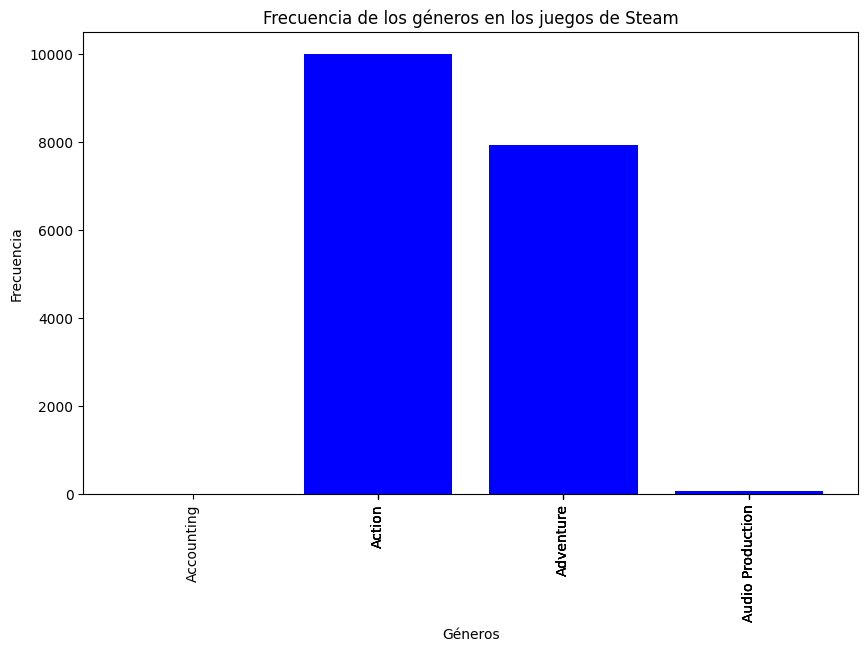

El gráfico muestra la frecuencia de los géneros en los juegos de Steam. Las barras representan el número de juegos de cada género.
El género más popular es **Action**, con **10002** juegos.
Los géneros menos populares son **Accounting, Audio Production, Audio Production, Audio Production, Audio Production**, con menos de 5000 juegos cada uno.

**Tipología:** **Descripción
 objetiva


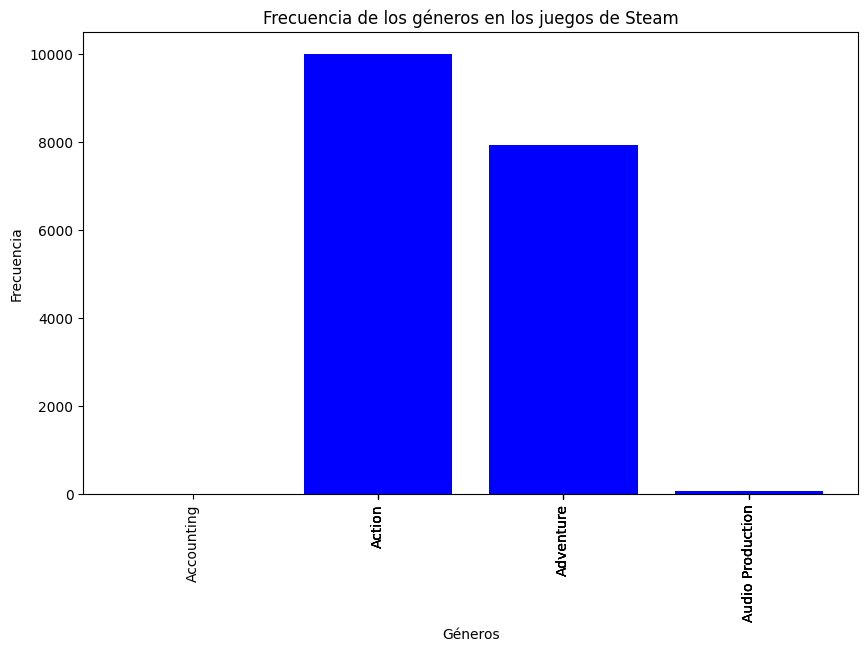

El gráfico muestra la frecuencia de los géneros en los juegos de Steam. Las
barras representan el número de juegos de cada género. El género más popular es
**Action**, con **10002** juegos. Los géneros menos populares son **Accounting,
Audio Production, Audio Production, Audio Production, Audio Production**, con
menos de 5000 juegos cada uno.  **Tipología:** **Descripción  objetiva


In [12]:
# Importo librerías.
import matplotlib.pyplot as plt
import textwrap

def generate_graph_and_description(df_steam_games, new_columns_genres):

    # Cuento la frecuencia de cada género.
    genre_counts = df_steam_games[new_columns_genres].sum()

    # Creo el gráfico de barras.
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.bar(genre_counts.index, genre_counts.values, color='b')

    # Agrego etiquetas a los ejes.
    ax.set_xlabel('Géneros')
    ax.set_ylabel('Frecuencia')
    ax.set_title('Frecuencia de los géneros en los juegos de Steam')

    # Roto las etiquetas del eje x para una mejor visualización.
    ax.set_xticks(genre_counts.index)  # Establece las posiciones de las etiquetas del eje x
    ax.set_xticklabels(genre_counts.index, rotation=90)  # Establece las etiquetas y la rotación

    # Obtengo el género más popular.
    max_index = genre_counts.argmax()

    # Obtengo los géneros menos populares.
    low_count_genres = genre_counts[genre_counts <= 5000]
    low_count_genres_names = low_count_genres.index.to_list()

    # Genero la descripción del gráfico.
    response = f"El gráfico muestra la frecuencia de los géneros en los juegos de Steam. Las barras representan el número de juegos de cada género.\n"
    response += f"El género más popular es **{genre_counts.index[max_index]}**, con **{genre_counts.values[max_index]}** juegos.\n"
    response += f"Los géneros menos populares son **{', '.join(low_count_genres_names)}**, con menos de 5000 juegos cada uno."

    # Añado la tipología.
    response += f"\n\n**Tipología:** {textwrap.fill('Descripción objetiva', 20, initial_indent='**', subsequent_indent=' ')}"

    # Muestro el gráfico.
    plt.show()

    return fig, ax, response

def main(df_steam_games, new_columns_genres):

    # Genero el gráfico y la descripción.
    fig, ax, response = generate_graph_and_description(df_steam_games, new_columns_genres)

    # Imprimo la descripción.
    print(response)

if __name__ == "__main__":
    # Aquí debes definir df_steam_games y new_columns_genres antes de llamar a main.
    main(df_steam_games, new_columns_genres)
# Importo librerías.
import matplotlib.pyplot as plt
import textwrap

def generate_graph_and_description(df_steam_games, new_columns_genres):

    # Cuento la frecuencia de cada género.
    genre_counts = df_steam_games[new_columns_genres].sum()

    # Creo el gráfico de barras.
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.bar(genre_counts.index, genre_counts.values, color='b')

    # Agrego etiquetas a los ejes.
    ax.set_xlabel('Géneros')
    ax.set_ylabel('Frecuencia')
    ax.set_title('Frecuencia de los géneros en los juegos de Steam')

    # Roto las etiquetas del eje x para una mejor visualización.
    ax.set_xticks(genre_counts.index)  # Establece las posiciones de las etiquetas del eje x
    ax.set_xticklabels(genre_counts.index, rotation=90)  # Establece las etiquetas y la rotación

    # Obtengo el género más popular.
    max_index = genre_counts.argmax()

    # Obtengo los géneros menos populares.
    low_count_genres = genre_counts[genre_counts <= 5000]
    low_count_genres_names = low_count_genres.index.to_list()

    # Genero la descripción del gráfico.
    response = f"El gráfico muestra la frecuencia de los géneros en los juegos de Steam. Las barras representan el número de juegos de cada género.\n"
    response += f"El género más popular es **{genre_counts.index[max_index]}**, con **{genre_counts.values[max_index]}** juegos.\n"
    response += f"Los géneros menos populares son **{', '.join(low_count_genres_names)}**, con menos de 5000 juegos cada uno."

    # Añado la tipología.
    response += f"\n\n**Tipología:** {textwrap.fill('Descripción objetiva', 20, initial_indent='**', subsequent_indent=' ')}"

    # Ajusto la descripción a un ancho de 80 caracteres.
    wrapped_response = textwrap.fill(response, width=80)

    # Muestro el gráfico.
    plt.show()

    return fig, ax, wrapped_response

def main(df_steam_games, new_columns_genres):

    # Genero el gráfico y la descripción.
    fig, ax, response = generate_graph_and_description(df_steam_games, new_columns_genres)

    # Imprimo la descripción.
    print(response)

if __name__ == "__main__":
    # Aquí debes definir df_steam_games y new_columns_genres antes de llamar a main.
    main(df_steam_games, new_columns_genres)


### Análisis de la columnas.

In [13]:
print(df_steam_games.columns)
print(new_columns_genres)
print(new_columns_tags)
print(new_columns_specs)

Index(['publisher', 'app_name', 'title', 'url', 'release_date', 'reviews_url',
       'price', 'early_access', 'id', 'developer',
       ...
       'Steam Achievements', 'Steam Cloud', 'Steam Leaderboards',
       'Steam Trading Cards', 'Steam Turn Notifications', 'Steam Workshop',
       'SteamVR Collectibles', 'Tracked Motion Controllers',
       'Valve Anti-Cheat enabled', 'Windows Mixed Reality'],
      dtype='object', length=411)
['Accounting', 'Action', 'Adventure', 'Audio Production', 'Action', 'Adventure', 'Audio Production']
['1980s', "1990's", '2.5D', '2D', '2D Fighter']
['Captions available', 'Commentary available', 'Cross-Platform Multiplayer', 'Downloadable Content', 'Full controller support']


In [14]:
# Importo librerías.
from tqdm import tqdm

def analizar_columna_individual(df, columna):
    """
    Esta función analiza cada columna individualmente, en este caso 'genres', 'tags' y 'specs' de un DataFrame de pandas.
    
    Parámetros:
    df (pandas.DataFrame): El DataFrame a analizar.
    columna (str): El nombre de la columna a analizar.
    
    Retorna:
    None
    """
    # Verifico si la columna existe en el DataFrame
    if columna not in df.columns:
        print(f"La columna '{columna}' no existe en el DataFrame.")
        return

    # Verifico si hay valores nulos
    num_nulls = df[columna].isnull().sum()
    
    # Obtengo un resumen de la columna
    resumen = df[columna].describe()

    print(f"Columna '{columna}':\n{resumen}\nNúmero de valores nulos = {num_nulls}\n")

# Uso de la función para cada columna nueva
for columna in tqdm(new_columns_genres + new_columns_tags + new_columns_specs):
    analizar_columna_individual(df_steam_games, columna)

""" Limite la salida a los efectos de optimizar el tiempo de presentación """

 29%|██▉       | 5/17 [00:00<00:00, 46.76it/s]

Columna 'Accounting':
count    22915.000000
mean         0.000305
std          0.017476
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Accounting, dtype: float64
Número de valores nulos = 0

Columna 'Action':
             Action        Action
count  22915.000000  22915.000000
mean       0.411564      0.436483
std        0.492128      0.495960
min        0.000000      0.000000
25%        0.000000      0.000000
50%        0.000000      0.000000
75%        1.000000      1.000000
max        1.000000      1.000000
Número de valores nulos = Action    0
Action    0
dtype: int64

Columna 'Adventure':
          Adventure     Adventure
count  22915.000000  22915.000000
mean       0.306655      0.346411
std        0.461115      0.475836
min        0.000000      0.000000
25%        0.000000      0.000000
50%        0.000000      0.000000
75%        1.000000      1.000000
max        1.000000      1.000000
Número de valores nulos =

100%|██████████| 17/17 [00:00<00:00, 88.60it/s]


' Limite la salida a los efectos de optimizar el tiempo de presentación '

### Trabajaré publisher

In [15]:
# Calculo los recuentos de valores
publisher_counts = df_steam_games['publisher'].value_counts()

# Ordeno los recuentos de valores en orden descendente
publisher_counts = publisher_counts.sort_values(ascending=False)

# Muestro los primeros 20 recuentos de valores en formato de tabla
print(publisher_counts[:10].to_string())

""" Limite la salida a los efectos de optimizar el tiempo de presentación """

publisher
Ubisoft                       368
Dovetail Games - Trains       359
Degica                        280
Paradox Interactive           264
SEGA                          230
Dovetail Games - Flight       220
Activision                    201
Big Fish Games                194
KOEI TECMO GAMES CO., LTD.    192
KISS ltd                      182


' Limite la salida a los efectos de optimizar el tiempo de presentación '

### Analizo 'publisher'

In [16]:
# Importo librerías
import pandas as pd

def analyze_individual_column(df, column):
    """
    Esta función analiza una columna individual de un DataFrame de pandas.
    
    Parámetros:
    df (pandas.DataFrame): El DataFrame a analizar.
    column (str): El nombre de la columna a analizar.
    
    Retorna:
    None
    """
    print(f"\n\nAnalizando la columna '{column}'\n" + "-"*50)
    
    # Imprimo los primeros 20 valores
    print("\nPrimeros 20 valores:")
    print(df[column].head(20))
    
    # Verifico si hay valores nulos
    num_nulls = df[column].isnull().sum()
    print(f"\nNúmero de valores nulos: {num_nulls}")
    
    # Obtengo el tipo de datos de la columna
    dtype = df[column].dtype
    print(f"\nTipo de datos: {dtype}")
    
    # Si la columna es numérica, obtengo estadísticas descriptivas
    if pd.api.types.is_numeric_dtype(df[column]):
        print("\nEstadísticas descriptivas:")
        print(df[column].describe())
    
    # Si la columna es de tipo object (categórica), obtengo los valores únicos y sus conteos
    if dtype == 'object':
        print("\nValores únicos (top 5):")
        print(df[column].value_counts().head(5))
        
    # Si la columna contiene listas o diccionarios, analizo la longitud de los datos
    if df[column].apply(lambda x: isinstance(x, (list, dict))).any():
        print("\nLongitud de los datos (para listas y diccionarios):")
        print(df[column].apply(lambda x: len(x) if isinstance(x, (list, dict)) else None).describe())

# Uso de la función para una columna específica
df = df_steam_games  # aquí coloco el nombre del df y su nombre
column = 'publisher'  # aquí coloco el nombre de la columna

analyze_individual_column(df, column)




Analizando la columna 'publisher'
--------------------------------------------------

Primeros 20 valores:
0                          Kotoshiro
1                   Making Fun, Inc.
2                       Poolians.com
3                               彼岸领域
4                Trickjump Games Ltd
5             Poppermost Productions
6             Poppermost Productions
7     Stegalosaurus Game Development
8                  Copperpick Studio
9                       Ghulam Jewel
10                            Apillo
11            Poppermost Productions
12                            Apillo
13            Poppermost Productions
14                       Tero Lunkka
15                      FrozenPepper
16                      FrozenPepper
17                     Casey Labrack
18               Stainless Games Ltd
19                             Valve
Name: publisher, dtype: object

Número de valores nulos: 0

Tipo de datos: object

Valores únicos (top 5):
publisher
Ubisoft                    368
Dov

In [17]:
# Lista de nombres de juegos para verificar duplicados
game_names = ['Degica', 'Päradox Interactive', 'Sega']

# Columnas a considerar al verificar duplicados
columns_to_consider = ['app_name', 'publisher', 'developer']

# Para cada nombre de juego en la lista
for game_name in game_names:
    # Crea una cadena de texto con la información que deseas
    info = f"""
    Este bloque de código verifica si hay filas duplicadas para el juego 
    '{game_name}' en el DataFrame df_steam_games. 
    Si hay filas duplicadas, las imprime y luego las elimina del DataFrame.
    """
    # Imprime la cadena de texto
    print(info)

    # Filtra el DataFrame para mostrar solo las filas donde 'app_name' es el nombre del juego actual
    df_game = df_steam_games[df_steam_games['app_name'] == game_name]

    # Verifica si hay filas duplicadas, considerando solo las columnas especificadas
    duplicates = df_game.duplicated(subset=columns_to_consider)

    # Si hay filas duplicadas
    if duplicates.any():
        print(f"Duplicados para {game_name}:")
        
        # Imprime las filas duplicadas
        print(df_game[duplicates])
    else:
        # Imprime un mensaje indicando que no se encontraron duplicados para el juego actual
        print(f"No se encontraron duplicados para {game_name}.")


    Este bloque de código verifica si hay filas duplicadas para el juego 
    'Degica' en el DataFrame df_steam_games. 
    Si hay filas duplicadas, las imprime y luego las elimina del DataFrame.
    
No se encontraron duplicados para Degica.

    Este bloque de código verifica si hay filas duplicadas para el juego 
    'Päradox Interactive' en el DataFrame df_steam_games. 
    Si hay filas duplicadas, las imprime y luego las elimina del DataFrame.
    
No se encontraron duplicados para Päradox Interactive.

    Este bloque de código verifica si hay filas duplicadas para el juego 
    'Sega' en el DataFrame df_steam_games. 
    Si hay filas duplicadas, las imprime y luego las elimina del DataFrame.
    
No se encontraron duplicados para Sega.


In [18]:
# Por ahora no usaré esta columna, teng dudas en eliminarla.
# df_steam_games = df_steam_games.drop(columns='publisher')

### Trabajaré genres, tags y specs.

#### Vamos a realizar un preprocesamiento y análisis, aplanado listas, tratando valores nulos y creando variables ficticias cuya finalidad es transformar datos categóricos en un formato numérico para que los algoritmos de machine learning puedan procesar más adelante.

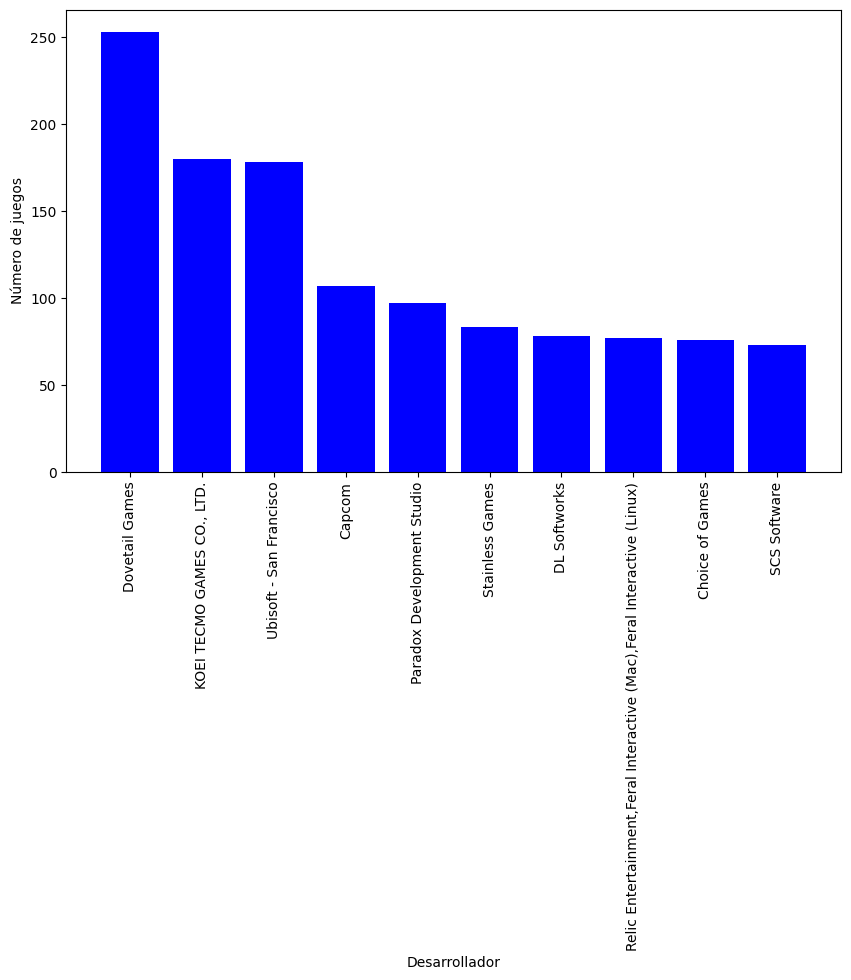

El gráfico muestra la distribución de Desarrollador en los juegos. Aquí están los cinco más comunes: * Dovetail Games: 253 juegos * KOEI TECMO GAMES
CO., LTD.: 180 juegos * Ubisoft - San Francisco: 178 juegos * Capcom: 107 juegos * Paradox Development Studio: 97 juegos


In [19]:
# Importo librerías.
import matplotlib.pyplot as plt
import pandas as pd
import textwrap

def generate_graph_and_description(df, column, title):
    """
    Genera un gráfico y una descripción para una columna específica de un DataFrame.

    Parámetros:
    df (pandas.DataFrame): El DataFrame a analizar.
    column (str): La columna del DataFrame a graficar.
    title (str): El título del gráfico.
    """
    # Calculamos los conteos de la columna
    counts = df[column].value_counts()

    # Generamos el gráfico
    plt.figure(figsize=(10,6))
    plt.bar(counts.index[:10], counts.values[:10], color='b')  # Mostramos solo los 10 primeros para evitar un gráfico demasiado lleno
    plt.ylabel('Número de juegos')
    plt.xlabel(title)
    plt.xticks(rotation=90)  # Rota las etiquetas del eje x
    plt.show()

    # Genero la descripción
    description = f"El gráfico muestra la distribución de {title} en los juegos. Aquí están los cinco más comunes:\n"
    for developer, count in counts[:5].items():
        description += f"* {developer}: {count} juegos\n"

    # Ajusto la descripción a un ancho de 150 caracteres.
    wrapped_description = textwrap.fill(description, width=150)

    print(wrapped_description)

# Llamo a la función con el DataFrame y la columna que queremos graficar
generate_graph_and_description(df_steam_games, 'developer', 'Desarrollador')


### Trabajaré app_name y title

In [20]:
def print_dataframe(df):
    """
    Imprimo el contenido de las columnas del DataFrame.
    """
    print(df[["app_name", "title"]])

def filter_dataframe(df):
    """
    Creo una máscara cuando app_name es diferente a title y muestra algunos resultados después de aplicar los filtros.
    """
    diferentes = df["app_name"] != df["title"]
    indices_true = diferentes.to_numpy().nonzero()[0]
    sample_size = min(10, len(indices_true))
    print(df.loc[indices_true, ["app_name", "title"]].sample(sample_size))

# Visualizo el contenido de las columnas
print_dataframe(df_steam_games)

# Aplico los filtros y visualizamos algunos resultados
filter_dataframe(df_steam_games)

                       app_name                     title
0           Lost Summoner Kitty       Lost Summoner Kitty
1                     Ironbound                 Ironbound
2       Real Pool 3D - Poolians   Real Pool 3D - Poolians
3                       弹炸人2222                   弹炸人2222
4         Battle Royale Trainer     Battle Royale Trainer
...                         ...                       ...
22911              Kebab it Up!              Kebab it Up!
22912            Colony On Mars            Colony On Mars
22913  LOGistICAL: South Africa  LOGistICAL: South Africa
22914             Russian Roads             Russian Roads
22915       EXIT 2 - Directions       EXIT 2 - Directions

[22915 rows x 2 columns]
                                                app_name  \
10216  Dresden Files Cooperative Card Game - Mouse & ...   
22608                                          Starscape   
12091            Animation Throwdown - Incredible Bundle   
1222   Dungeons & Dragons Online® Cata

In [21]:
""" Verifico si 'app_name' y 'title' son iguales para todas las filas """ 
son_iguales = (df_steam_games['app_name'] == df_steam_games['title']).all()

print(f"¿Son 'app_name' y 'title' iguales para todas las filas? {son_iguales}")

¿Son 'app_name' y 'title' iguales para todas las filas? False


### Analizo 'app_name'

In [22]:
# Importo librerías
import pandas as pd

def analyze_individual_column(df, column):
    """
    Esta función analiza una columna individual de un DataFrame de pandas.
    
    Parámetros:
    df (pandas.DataFrame): El DataFrame a analizar.
    column (str): El nombre de la columna a analizar.
    
    Retorna:
    None
    """
    print(f"\n\nAnalizando la columna '{column}'\n" + "-"*50)
    
    # Imprimo los primeros 20 valores
    print("\nPrimeros 20 valores:")
    print(df[column].head(20))
    
    # Verifico si hay valores nulos
    num_nulls = df[column].isnull().sum()
    print(f"\nNúmero de valores nulos: {num_nulls}")
    
    # Obtengo el tipo de datos de la columna
    dtype = df[column].dtype
    print(f"\nTipo de datos: {dtype}")
    
    # Si la columna es numérica, obtengo estadísticas descriptivas
    if pd.api.types.is_numeric_dtype(df[column]):
        print("\nEstadísticas descriptivas:")
        print(df[column].describe())
    
    # Si la columna es de tipo object (categórica), obtengo los valores únicos y sus conteos
    if dtype == 'object':
        print("\nValores únicos (top 5):")
        print(df[column].value_counts().head(5))
        
    # Si la columna contiene listas o diccionarios, analizo la longitud de los datos
    if df[column].apply(lambda x: isinstance(x, (list, dict))).any():
        print("\nLongitud de los datos (para listas y diccionarios):")
        print(df[column].apply(lambda x: len(x) if isinstance(x, (list, dict)) else None).describe())

# Uso de la función para una columna específica
df = df_steam_games  # aquí coloco el nombre del df y su nombre
column = 'app_name'  # aquí coloco el nombre de la columna

analyze_individual_column(df, column)




Analizando la columna 'app_name'
--------------------------------------------------

Primeros 20 valores:
0                                   Lost Summoner Kitty
1                                             Ironbound
2                               Real Pool 3D - Poolians
3                                               弹炸人2222
4                                 Battle Royale Trainer
5                            SNOW - All Access Pro Pass
6                         SNOW - All Access Legend Pass
7     Army of Tentacles: (Not) A Cthulhu Dating Sim:...
8                                           Beach Rules
9                           Planetarium 2 - Zen Odyssey
10                              The first thrust of God
11                                  SNOW - Starter Pack
12              The first thrust of God - All Aircrafts
13                                 SNOW - Lifetime Pack
14                             The Warrior Of Treasures
15                         RC Plane 3 - Canyon Scena

In [23]:
# Lista de nombres de app_names para verificar duplicados
app_names1 = ['Alter Ego', 'Invasion', 'Invisible Apartment Zero']

# Columnas a considerar al verificar duplicados
columns_to_consider = ['app_name', 'publisher', 'developer']

# Para cada nombre de juego en la lista
for game_name in game_names:
    # Crea una cadena de texto con la información que deseas
    info = f"""
    Este bloque de código verifica si hay filas duplicadas para el juego 
    '{game_name}' en el DataFrame df_steam_games. 
    Si hay filas duplicadas, las imprime y luego las elimina del DataFrame.
    """
    # Imprime la cadena de texto
    print(info)

    # Filtra el DataFrame para mostrar solo las filas donde 'app_name' es el nombre del juego actual
    df_game = df_steam_games[df_steam_games['app_name'] == game_name]

    # Verifica si hay filas duplicadas, considerando solo las columnas especificadas
    duplicates = df_game.duplicated(subset=columns_to_consider)

    # Si hay filas duplicadas
    if duplicates.any():
        print(f"Duplicados para {game_name}:")
        
        # Imprime las filas duplicadas
        print(df_game[duplicates])
    else:
        # Imprime un mensaje indicando que no se encontraron duplicados para el juego actual
        print(f"No se encontraron duplicados para {game_name}.")



    Este bloque de código verifica si hay filas duplicadas para el juego 
    'Degica' en el DataFrame df_steam_games. 
    Si hay filas duplicadas, las imprime y luego las elimina del DataFrame.
    
No se encontraron duplicados para Degica.

    Este bloque de código verifica si hay filas duplicadas para el juego 
    'Päradox Interactive' en el DataFrame df_steam_games. 
    Si hay filas duplicadas, las imprime y luego las elimina del DataFrame.
    
No se encontraron duplicados para Päradox Interactive.

    Este bloque de código verifica si hay filas duplicadas para el juego 
    'Sega' en el DataFrame df_steam_games. 
    Si hay filas duplicadas, las imprime y luego las elimina del DataFrame.
    
No se encontraron duplicados para Sega.


### Analizo 'title'

In [24]:
# Importo librerías
import pandas as pd

def analyze_individual_column(df, column):
    """
    Esta función analiza una columna individual de un DataFrame de pandas.
    
    Parámetros:
    df (pandas.DataFrame): El DataFrame a analizar.
    column (str): El nombre de la columna a analizar.
    
    Retorna:
    None
    """
    print(f"\n\nAnalizando la columna '{column}'\n" + "-"*50)
    
    # Imprimo los primeros 20 valores
    print("\nPrimeros 20 valores:")
    print(df[column].head(20))
    
    # Verifico si hay valores nulos
    num_nulls = df[column].isnull().sum()
    print(f"\nNúmero de valores nulos: {num_nulls}")
    
    # Obtengo el tipo de datos de la columna
    dtype = df[column].dtype
    print(f"\nTipo de datos: {dtype}")
    
    # Si la columna es numérica, obtengo estadísticas descriptivas
    if pd.api.types.is_numeric_dtype(df[column]):
        print("\nEstadísticas descriptivas:")
        print(df[column].describe())
    
    # Si la columna es de tipo object (categórica), obtengo los valores únicos y sus conteos
    if dtype == 'object':
        print("\nValores únicos (top 5):")
        print(df[column].value_counts().head(5))
        
    # Si la columna contiene listas o diccionarios, analizo la longitud de los datos
    if df[column].apply(lambda x: isinstance(x, (list, dict))).any():
        print("\nLongitud de los datos (para listas y diccionarios):")
        print(df[column].apply(lambda x: len(x) if isinstance(x, (list, dict)) else None).describe())

# Uso de la función para una columna específica
df = df_steam_games  # aquí coloco el nombre del df y su nombre
column = 'title'  # aquí coloco el nombre de la columna

analyze_individual_column(df, column)




Analizando la columna 'title'
--------------------------------------------------

Primeros 20 valores:
0                                   Lost Summoner Kitty
1                                             Ironbound
2                               Real Pool 3D - Poolians
3                                               弹炸人2222
4                                 Battle Royale Trainer
5                            SNOW - All Access Pro Pass
6                         SNOW - All Access Legend Pass
7     Army of Tentacles: (Not) A Cthulhu Dating Sim:...
8                                           Beach Rules
9                           Planetarium 2 - Zen Odyssey
10                              The first thrust of God
11                                  SNOW - Starter Pack
12              The first thrust of God - All Aircrafts
13                                 SNOW - Lifetime Pack
14                             The Warrior Of Treasures
15                         RC Plane 3 - Canyon Scenario

In [25]:
# Lista de nombres de juegos para verificar duplicados
game_names = ['Alter Ego', 'Invasion', 'Invisible Apartment Zero']

# Columnas a considerar al verificar duplicados
columns_to_consider = ['app_name', 'publisher', 'developer']

# Para cada nombre de juego en la lista
for game_name in game_names:
    # Crea una cadena de texto con la información que deseas
    info = f"""
    Este bloque de código verifica si hay filas duplicadas para el juego 
    '{game_name}' en el DataFrame df_steam_games. 
    Si hay filas duplicadas, las imprime y luego las elimina del DataFrame.
    """
    # Imprime la cadena de texto
    print(info)

    # Filtra el DataFrame para mostrar solo las filas donde 'app_name' es el nombre del juego actual
    df_game = df_steam_games[df_steam_games['app_name'] == game_name]

    # Verifica si hay filas duplicadas, considerando solo las columnas especificadas
    duplicates = df_game.duplicated(subset=columns_to_consider)

    # Si hay filas duplicadas
    if duplicates.any():
        print(f"Duplicados para {game_name}:")
        
        # Imprime las filas duplicadas
        print(df_game[duplicates])
    else:
        # Imprime un mensaje indicando que no se encontraron duplicados para el juego actual
        print(f"No se encontraron duplicados para {game_name}.")



    Este bloque de código verifica si hay filas duplicadas para el juego 
    'Alter Ego' en el DataFrame df_steam_games. 
    Si hay filas duplicadas, las imprime y luego las elimina del DataFrame.
    
No se encontraron duplicados para Alter Ego.

    Este bloque de código verifica si hay filas duplicadas para el juego 
    'Invasion' en el DataFrame df_steam_games. 
    Si hay filas duplicadas, las imprime y luego las elimina del DataFrame.
    
No se encontraron duplicados para Invasion.

    Este bloque de código verifica si hay filas duplicadas para el juego 
    'Invisible Apartment Zero' en el DataFrame df_steam_games. 
    Si hay filas duplicadas, las imprime y luego las elimina del DataFrame.
    
No se encontraron duplicados para Invisible Apartment Zero.


### ¿Cuántos juegos únicos por categoría hay?

In [26]:
# Agrupo por género y cuento los juegos únicos
unique_games_per_genre = df_steam_games.groupby(new_columns)['id'].nunique()

# Calculo el número de combinaciones únicas de géneros
num_unique_combinations = len(unique_games_per_genre)

# Imprimo el resultado y el mensaje personalizado con el número calculado
print(f"{unique_games_per_genre}\n\nEl código agrupa los juegos por género y cuenta el número de juegos únicos para cada combinación de géneros, resultando en {num_unique_combinations} combinaciones únicas de géneros en el conjunto de datos.")

Captions available  Commentary available  Cross-Platform Multiplayer  Downloadable Content  Full controller support  Game demo  Gamepad  HTC Vive  In-App Purchases  Includes Source SDK  Includes level editor  Keyboard / Mouse  Local Co-op  Local Multi-Player  MMO  Mods  Mods (require HL1)  Mods (require HL2)  Multi-player  Oculus Rift  Online Co-op  Online Multi-Player  Partial Controller Support  Room-Scale  Seated  Shared/Split Screen  Single-player  Standing  Stats  Steam Achievements  Steam Cloud  Steam Leaderboards  Steam Trading Cards  Steam Turn Notifications  Steam Workshop  SteamVR Collectibles  Tracked Motion Controllers  Valve Anti-Cheat enabled  Windows Mixed Reality
0                   0                     0                           0                     0                        0          0        0         0                 0                    0                      0                 0            0                   0    0     0                   0                   0

### Graficaré para ver el top ten de los juegos y los últimos 10 juegos menos usados para tener una comparativa.

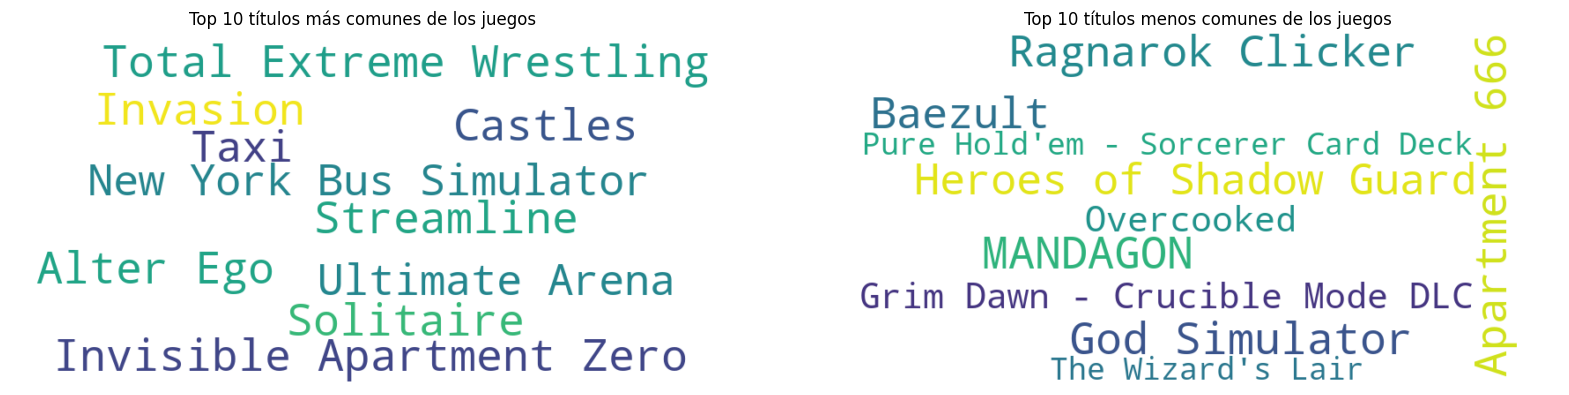

La nube de palabras muestra los 10 títulos más comunes de los juegos. Los títulos más grandes son los más comunes. Los títulos más comunes son: *
Solitaire: 2 juegos * Streamline: 2 juegos * Alter Ego: 2 juegos * Invasion: 2 juegos * Invisible Apartment Zero: 2 juegos * Total Extreme Wrestling:
2 juegos * Castles: 2 juegos * Ultimate Arena: 2 juegos * Taxi: 2 juegos * New York Bus Simulator: 2 juegos
La nube de palabras muestra los 10 títulos menos comunes de los juegos. Los títulos más grandes son los menos comunes. Los títulos menos comunes son:
* God Simulator: 1 juegos * Apartment 666: 1 juegos * MANDAGON: 1 juegos * Heroes of Shadow Guard: 1 juegos * Baezult: 1 juegos * Ragnarok Clicker: 1
juegos * Grim Dawn - Crucible Mode DLC: 1 juegos * Overcooked: 1 juegos * Pure Hold'em - Sorcerer Card Deck: 1 juegos * The Wizard's Lair: 1 juegos


In [27]:
# Importo librerías
from wordcloud import WordCloud
import textwrap

# Creo una serie con todos los títulos
all_titles = df_steam_games['title']

# Obtengo los 10 títulos más y menos comunes
top_ten_titles = all_titles.value_counts().nlargest(10).to_dict()
bottom_ten_titles = all_titles.value_counts().nsmallest(10).to_dict()

# Creo las nubes de palabras con parámetros ajustados
wordcloud_top = WordCloud(width=800, height=400, background_color='white', max_font_size=50, max_words=100).generate_from_frequencies(top_ten_titles)
wordcloud_bottom = WordCloud(width=800, height=400, background_color='white', max_font_size=50, max_words=100).generate_from_frequencies(bottom_ten_titles)

# Creo una figura con dos subtramas
fig, axs = plt.subplots(1, 2, figsize=(20, 10))

# Muestro las nubes de palabras en las subtramas
axs[0].imshow(wordcloud_top, interpolation='bilinear')
axs[0].set_title('Top 10 títulos más comunes de los juegos')
axs[0].axis('off')

axs[1].imshow(wordcloud_bottom, interpolation='bilinear')
axs[1].set_title('Top 10 títulos menos comunes de los juegos')
axs[1].axis('off')

plt.show()

# Genero las descripciones
description_top = f"La nube de palabras muestra los 10 títulos más comunes de los juegos. Los títulos más grandes son los más comunes. Los títulos más comunes son:\n"
for title, count in top_ten_titles.items():
    description_top += f"* {title}: {count} juegos\n"

description_bottom = f"La nube de palabras muestra los 10 títulos menos comunes de los juegos. Los títulos más grandes son los menos comunes. Los títulos menos comunes son:\n"
for title, count in bottom_ten_titles.items():
    description_bottom += f"* {title}: {count} juegos\n"

# Ajusto las descripciones a un ancho de 150 caracteres.
wrapped_description_top = textwrap.fill(description_top, width=150)
wrapped_description_bottom = textwrap.fill(description_bottom, width=150)

# Imprimo las descripciones
print(wrapped_description_top)
print(wrapped_description_bottom)


### Trabajaré reviews_url.

In [28]:
# Muestro los primeros elementos de la columna 'reviews_url'
print(df_steam_games['reviews_url'].head().to_frame())

print("\nNo considero relevante a la columna 'reviews_url', pero para un futuro trabajo tiene información importante, por eso no la elimino en caso de expandir mi trabajo de MLOPS.")

                                         reviews_url
0  http://steamcommunity.com/app/761140/reviews/?...
1  http://steamcommunity.com/app/643980/reviews/?...
2  http://steamcommunity.com/app/670290/reviews/?...
3  http://steamcommunity.com/app/767400/reviews/?...
4  http://steamcommunity.com/app/772540/reviews/?...

No considero relevante a la columna 'reviews_url', pero para un futuro trabajo tiene información importante, por eso no la elimino en caso de expandir mi trabajo de MLOPS.


### Analizo 'reviews_url'

In [29]:
# Importo librerías
import pandas as pd

def analyze_individual_column(df, column):
    """
    Esta función analiza una columna individual de un DataFrame de pandas.
    
    Parámetros:
    df (pandas.DataFrame): El DataFrame a analizar.
    column (str): El nombre de la columna a analizar.
    
    Retorna:
    None
    """
    print(f"\n\nAnalizando la columna '{column}'\n" + "-"*50)
    
    # Imprimo los primeros 20 valores
    print("\nPrimeros 20 valores:")
    print(df[column].head(20))
    
    # Verifico si hay valores nulos
    num_nulls = df[column].isnull().sum()
    print(f"\nNúmero de valores nulos: {num_nulls}")
    
    # Obtengo el tipo de datos de la columna
    dtype = df[column].dtype
    print(f"\nTipo de datos: {dtype}")
    
    # Si la columna es numérica, obtengo estadísticas descriptivas
    if pd.api.types.is_numeric_dtype(df[column]):
        print("\nEstadísticas descriptivas:")
        print(df[column].describe())
    
    # Si la columna es de tipo object (categórica), obtengo los valores únicos y sus conteos
    if dtype == 'object':
        print("\nValores únicos (top 5):")
        print(df[column].value_counts().head(5))
        
    # Si la columna contiene listas o diccionarios, analizo la longitud de los datos
    if df[column].apply(lambda x: isinstance(x, (list, dict))).any():
        print("\nLongitud de los datos (para listas y diccionarios):")
        print(df[column].apply(lambda x: len(x) if isinstance(x, (list, dict)) else None).describe())

# Uso de la función para una columna específica
df = df_steam_games  # aquí coloco el nombre del df y su nombre
column = 'reviews_url'  # aquí coloco el nombre de la columna

analyze_individual_column(df, column)




Analizando la columna 'reviews_url'
--------------------------------------------------

Primeros 20 valores:
0     http://steamcommunity.com/app/761140/reviews/?...
1     http://steamcommunity.com/app/643980/reviews/?...
2     http://steamcommunity.com/app/670290/reviews/?...
3     http://steamcommunity.com/app/767400/reviews/?...
4     http://steamcommunity.com/app/772540/reviews/?...
5     http://steamcommunity.com/app/774277/reviews/?...
6     http://steamcommunity.com/app/774278/reviews/?...
7     http://steamcommunity.com/app/770380/reviews/?...
8     http://steamcommunity.com/app/768880/reviews/?...
9     http://steamcommunity.com/app/765320/reviews/?...
10    http://steamcommunity.com/app/773650/reviews/?...
11    http://steamcommunity.com/app/774271/reviews/?...
12    http://steamcommunity.com/app/773690/reviews/?...
13    http://steamcommunity.com/app/774279/reviews/?...
14    http://steamcommunity.com/app/768060/reviews/?...
15    http://steamcommunity.com/app/775880/review

### Trabajaré release_date.

In [30]:
# Imprime los valores únicos en la columna 'release_date'
print(df_steam_games['release_date'].unique())

# Haz un recuento de los valores en la columna 'release_date'
print(df_steam_games['release_date'].value_counts())


['2018-01-04' '2017-07-24' '2017-12-07' ... '2003-11-01' '2004-03-16'
 '2004-03-01']
release_date
2012-10-16    100
2017-07-25     63
2017-09-26     62
2017-10-17     61
2017-12-15     60
             ... 
1999-03-22      1
2002-03-28      1
1999-10-13      1
1998-05-01      1
2004-03-01      1
Name: count, Length: 3229, dtype: int64


In [31]:
# Importo librerías
import pandas as pd

# Convierto la columna release_date a datetime
df_steam_games['release_date'] = pd.to_datetime(df_steam_games['release_date'], errors='coerce')

# Encuentro los valores que no se pudieron convertir a datetime
non_convertible_values = df_steam_games[df_steam_games['release_date'].isna()]

# Imprimo los valores únicos que no se pudieron convertir a datetime
print(non_convertible_values['release_date'].unique())

# Imprimo la cantidad de valores NaT
print("Cantidad de valores NaT: ", len(non_convertible_values))

# Elimino las filas con 'NaT' en la columna 'release_date'
df_steam_games = df_steam_games[df_steam_games['release_date'].notna()]

# Verifico si hay valores NaN o NaT en la columna 'release_date'
print("¿Existen valores NaN o NaT en 'release_date'? ", df_steam_games['release_date'].isna().any())

print("Luego de haber realizado las correcciones pertinentes y su limpieza, puedo afirmar que no tenemos datos nulos; a continuación procedo a la conversión de la columna 'release_date' a datetime y la renombre año de lanzamiento y creo la columna 'año'.")

<DatetimeArray>
['NaT']
Length: 1, dtype: datetime64[ns]
Cantidad de valores NaT:  34
¿Existen valores NaN o NaT en 'release_date'?  False
Luego de haber realizado las correcciones pertinentes y su limpieza, puedo afirmar que no tenemos datos nulos; a continuación procedo a la conversión de la columna 'release_date' a datetime y la renombre año de lanzamiento y creo la columna 'año'.


In [32]:
# Renombro la columna release_date a 'año de lanzamiento'
df_steam_games.rename(columns={'release_date': 'año de lanzamiento'}, inplace=True)

# Creo la columna 'año'
df_steam_games['año'] = df_steam_games['año de lanzamiento'].dt.year

# Analizo los datos
print(df_steam_games['año de lanzamiento'].head())


0   2018-01-04
1   2018-01-04
2   2017-07-24
3   2017-12-07
4   2018-01-04
Name: año de lanzamiento, dtype: datetime64[ns]


C:\Users\Esteban García\AppData\Local\Temp\ipykernel_5408\2576562942.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_steam_games.rename(columns={'release_date': 'año de lanzamiento'}, inplace=True)
C:\Users\Esteban García\AppData\Local\Temp\ipykernel_5408\2576562942.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_steam_games['año'] = df_steam_games['año de lanzamiento'].dt.year


### Analizo 'release_date' que fue renombrada a 'año de lanzamiento'.

In [33]:
# Importo librerías
import pandas as pd

def analyze_individual_column(df, column):
    """
    Esta función analiza una columna individual de un DataFrame de pandas.
    
    Parámetros:
    df (pandas.DataFrame): El DataFrame a analizar.
    column (str): El nombre de la columna a analizar.
    
    Retorna:
    None
    """
    print(f"\n\nAnalizando la columna '{column}'\n" + "-"*50)
    
    # Imprimo los primeros 20 valores
    print("\nPrimeros 20 valores:")
    print(df[column].head(20))
    
    # Verifico si hay valores nulos
    num_nulls = df[column].isnull().sum()
    print(f"\nNúmero de valores nulos: {num_nulls}")
    
    # Obtengo el tipo de datos de la columna
    dtype = df[column].dtype
    print(f"\nTipo de datos: {dtype}")
    
    # Si la columna es numérica, obtengo estadísticas descriptivas
    if pd.api.types.is_numeric_dtype(df[column]):
        print("\nEstadísticas descriptivas:")
        print(df[column].describe())
    
    # Si la columna es de tipo object (categórica), obtengo los valores únicos y sus conteos
    if dtype == 'object':
        print("\nValores únicos (top 5):")
        print(df[column].value_counts().head(5))
        
    # Si la columna contiene listas o diccionarios, analizo la longitud de los datos
    if df[column].apply(lambda x: isinstance(x, (list, dict))).any():
        print("\nLongitud de los datos (para listas y diccionarios):")
        print(df[column].apply(lambda x: len(x) if isinstance(x, (list, dict)) else None).describe())

# Uso de la función para una columna específica
df = df_steam_games  # aquí coloco el nombre del df y su nombre
column = 'año de lanzamiento'  # aquí coloco el nombre de la columna

analyze_individual_column(df, column)




Analizando la columna 'año de lanzamiento'
--------------------------------------------------

Primeros 20 valores:
0    2018-01-04
1    2018-01-04
2    2017-07-24
3    2017-12-07
4    2018-01-04
5    2018-01-04
6    2018-01-04
7    2018-01-04
8    2018-01-04
9    2018-01-03
10   2018-01-03
11   2018-01-03
12   2018-01-03
13   2018-01-03
14   2018-01-03
15   2017-12-22
16   2017-12-23
17   2018-01-03
18   1997-06-30
19   1998-11-08
Name: año de lanzamiento, dtype: datetime64[ns]

Número de valores nulos: 0

Tipo de datos: datetime64[ns]


### Analizo 'año'

In [34]:
# Importo librerías
import pandas as pd

def analyze_individual_column(df, column):
    """
    Esta función analiza una columna individual de un DataFrame de pandas.
    
    Parámetros:
    df (pandas.DataFrame): El DataFrame a analizar.
    column (str): El nombre de la columna a analizar.
    
    Retorna:
    None
    """
    print(f"\n\nAnalizando la columna '{column}'\n" + "-"*50)
    
    # Imprimo los primeros 20 valores
    print("\nPrimeros 20 valores:")
    print(df[column].head(20))
    
    # Verifico si hay valores nulos
    num_nulls = df[column].isnull().sum()
    print(f"\nNúmero de valores nulos: {num_nulls}")
    
    # Obtengo el tipo de datos de la columna
    dtype = df[column].dtype
    print(f"\nTipo de datos: {dtype}")
    
    # Si la columna es numérica, obtengo estadísticas descriptivas
    if pd.api.types.is_numeric_dtype(df[column]):
        print("\nEstadísticas descriptivas:")
        print(df[column].describe())
    
    # Si la columna es de tipo object (categórica), obtengo los valores únicos y sus conteos
    if dtype == 'object':
        print("\nValores únicos (top 5):")
        print(df[column].value_counts().head(5))
        
    # Si la columna contiene listas o diccionarios, analizo la longitud de los datos
    if df[column].apply(lambda x: isinstance(x, (list, dict))).any():
        print("\nLongitud de los datos (para listas y diccionarios):")
        print(df[column].apply(lambda x: len(x) if isinstance(x, (list, dict)) else None).describe())

# Uso de la función para una columna específica
df = df_steam_games  # aquí coloco el nombre del df y su nombre
column = 'año'  # aquí coloco el nombre de la columna

analyze_individual_column(df, column)

"""" Es importante destacar que año tiene el formato yyyy.00000 a los efectos de realizar análisis estadísticos, lo mantendré para no perder info """




Analizando la columna 'año'
--------------------------------------------------

Primeros 20 valores:
0     2018
1     2018
2     2017
3     2017
4     2018
5     2018
6     2018
7     2018
8     2018
9     2018
10    2018
11    2018
12    2018
13    2018
14    2018
15    2017
16    2017
17    2018
18    1997
19    1998
Name: año, dtype: int32

Número de valores nulos: 0

Tipo de datos: int32

Estadísticas descriptivas:
count    22881.000000
mean      2014.673572
std          3.506630
min       1983.000000
25%       2014.000000
50%       2016.000000
75%       2017.000000
max       2021.000000
Name: año, dtype: float64


'" Es importante destacar que año tiene el formato yyyy.00000 a los efectos de realizar análisis estadísticos, lo mantendré para no perder info '

### Popularidad de los juegos por año de lanzamiento e interpreto la columna 'año'.

In [35]:
# Obtengo el año de lanzamiento mínimo y máximo
min_year = df_steam_games['año de lanzamiento'].min()
max_year = df_steam_games['año de lanzamiento'].max()

print(f"El rango de años de lanzamiento es de {min_year} a {max_year}")

El rango de años de lanzamiento es de 1983-06-19 00:00:00 a 2021-12-31 00:00:00


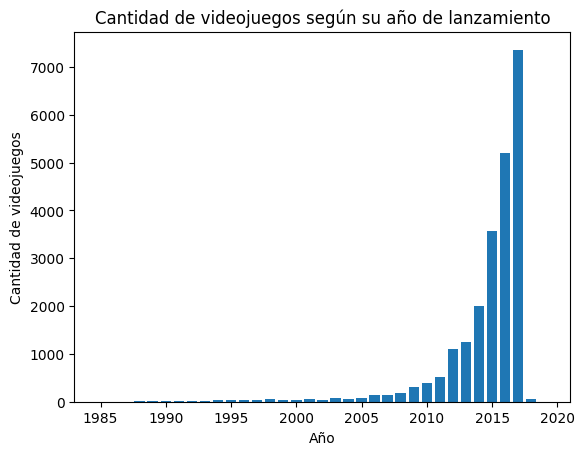

El gráfico muestra la cantidad de videojuegos lanzados cada año desde 1983 hasta 2021. Cada barra representa un año, y su altura indica la cantidad de
videojuegos lanzados ese año.


In [36]:
# Importo librerías
import matplotlib.pyplot as plt
import textwrap

# Extraigo el año de la fecha de lanzamiento
df_steam_games['año'] = df_steam_games['año de lanzamiento'].dt.year

# Creo una serie con la cantidad de videojuegos según su año de lanzamiento.
games_by_year = df_steam_games.groupby("año").size()

# Hago un gráfico de barras de games_by_year.
plt.bar(games_by_year.index, games_by_year.values)

# Ajusto opciones del gráfico.
plt.xlabel("Año")
plt.ylabel("Cantidad de videojuegos")
plt.title("Cantidad de videojuegos según su año de lanzamiento")
plt.xlim(1983, 2021)

# Muestro el gráfico
plt.show()

# Genero la descripción
description = f"El gráfico muestra la cantidad de videojuegos lanzados cada año desde 1983 hasta 2021. Cada barra representa un año, y su altura indica la cantidad de videojuegos lanzados ese año."

# Ajusto la descripción a un ancho de 150 caracteres.
wrapped_description = textwrap.fill(description, width=150)

# Imprimo la descripción
print(wrapped_description)


### Trabajaré price

In [37]:
# Importo librerías
import pandas as pd

def replace_price(price):
    """
    Esta función reemplaza las cadenas de texto por 0.0 en la columna 'price'.
    
    Parámetros:
    price (str, float): El precio a reemplazar.
    
    Retorna:
    float: El precio reemplazado.
    """
    if isinstance(price, str):
        return 0.0
    else:
        return price

# Corrijo precios en df_steam_games
df_steam_games['price'].replace({'Starting at $499.00': 499.0, 'Starting at $449.00': 499.0}, inplace=True)

# Aplico la función a la columna price
df_steam_games['price'] = df_steam_games['price'].apply(replace_price)

# Calculo la cantidad de valores nulos en cada columna
nulos = df_steam_games.isnull().sum()

# Calculo el porcentaje de filas con valores nulos en las columnas 'developer' y 'año de lanzamiento'
porcentaje_nulos = 1 - df_steam_games.dropna(subset=["developer","año de lanzamiento"]).shape[0] / df_steam_games.shape[0]

print(df_steam_games.head())
print(df_steam_games['price'].head())
print(df_steam_games['price'].tail())
print(df_steam_games['price'].describe())
print(df_steam_games['price'].value_counts())
print(nulos)
print(f'Porcentaje de nulos : {porcentaje_nulos}')

             publisher                 app_name                    title  \
0            Kotoshiro      Lost Summoner Kitty      Lost Summoner Kitty   
1     Making Fun, Inc.                Ironbound                Ironbound   
2         Poolians.com  Real Pool 3D - Poolians  Real Pool 3D - Poolians   
3                 彼岸领域                  弹炸人2222                  弹炸人2222   
4  Trickjump Games Ltd    Battle Royale Trainer    Battle Royale Trainer   

                                                 url año de lanzamiento  \
0  http://store.steampowered.com/app/761140/Lost_...         2018-01-04   
1  http://store.steampowered.com/app/643980/Ironb...         2018-01-04   
2  http://store.steampowered.com/app/670290/Real_...         2017-07-24   
3     http://store.steampowered.com/app/767400/2222/         2017-12-07   
4  http://store.steampowered.com/app/772540/Battl...         2018-01-04   

                                         reviews_url  price early_access  \
0  http://steamc

### Analizo 'price'

In [38]:
# Importo librerías
import pandas as pd

def analyze_individual_column(df, column):
    """
    Esta función analiza una columna individual de un DataFrame de pandas.
    
    Parámetros:
    df (pandas.DataFrame): El DataFrame a analizar.
    column (str): El nombre de la columna a analizar.
    
    Retorna:
    None
    """
    print(f"\n\nAnalizando la columna '{column}'\n" + "-"*50)
    
    # Imprimo los primeros 20 valores
    print("\nPrimeros 20 valores:")
    print(df[column].head(20))
    
    # Verifico si hay valores nulos
    num_nulls = df[column].isnull().sum()
    print(f"\nNúmero de valores nulos: {num_nulls}")
    
    # Obtengo el tipo de datos de la columna
    dtype = df[column].dtype
    print(f"\nTipo de datos: {dtype}")
    
    # Si la columna es numérica, obtengo estadísticas descriptivas
    if pd.api.types.is_numeric_dtype(df[column]):
        print("\nEstadísticas descriptivas:")
        print(df[column].describe())
    
    # Si la columna es de tipo object (categórica), obtengo los valores únicos y sus conteos
    if dtype == 'object':
        print("\nValores únicos (top 5):")
        print(df[column].value_counts().head(5))
        
    # Si la columna contiene listas o diccionarios, analizo la longitud de los datos
    if df[column].apply(lambda x: isinstance(x, (list, dict))).any():
        print("\nLongitud de los datos (para listas y diccionarios):")
        print(df[column].apply(lambda x: len(x) if isinstance(x, (list, dict)) else None).describe())

# Uso de la función para una columna específica
df = df_steam_games  # aquí coloco el nombre del df y su nombre
column = 'price'  # aquí coloco el nombre de la columna

analyze_individual_column(df, column)



Analizando la columna 'price'
--------------------------------------------------

Primeros 20 valores:
0      4.99
1      0.00
2      0.00
3      0.99
4      3.99
5     18.99
6     29.99
7     10.99
8      3.99
9      2.99
10     1.59
11    14.99
12     1.99
13    59.99
14     0.99
15     2.99
16     2.99
17     4.99
18     9.99
19     9.99
Name: price, dtype: float64

Número de valores nulos: 0

Tipo de datos: float64

Estadísticas descriptivas:
count    22881.000000
mean         9.348689
std         16.972885
min          0.000000
25%          2.990000
50%          4.990000
75%          9.990000
max        995.000000
Name: price, dtype: float64


### Trabajaré early_acces

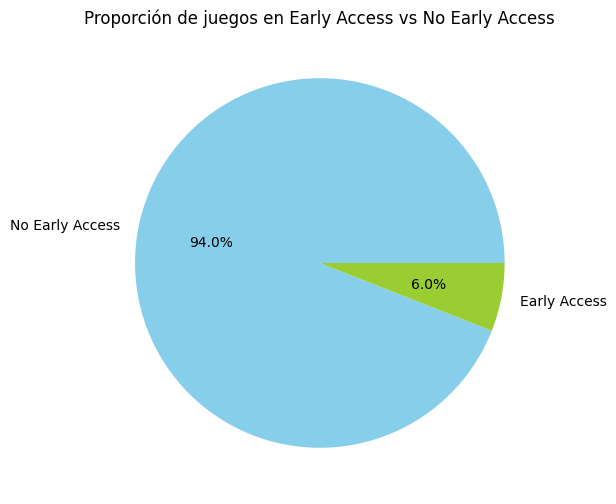

El gráfico de pastel muestra la proporción de juegos que están en 'Early Access' frente a los que no están en 'Early Access'. La sección 'Early
Access' representa los juegos que están en 'Early Access', mientras que la sección 'No Early Access' representa los juegos que no están en 'Early
Access'.


In [39]:
# Importo librerías.
import matplotlib.pyplot as plt
import textwrap

# Cuento la cantidad de juegos en 'Early Access' y no en 'Early Access'
early_access_counts = df_steam_games['early_access'].value_counts()

# Creo un gráfico de pastel
plt.figure(figsize=(6, 6))
plt.pie(early_access_counts, labels=['No Early Access', 'Early Access'], autopct='%1.1f%%',
        colors=['skyblue', 'yellowgreen'])
plt.title('Proporción de juegos en Early Access vs No Early Access')

# Muestro el gráfico
plt.show()

# Genero la descripción
description = "El gráfico de pastel muestra la proporción de juegos que están en 'Early Access' frente a los que no están en 'Early Access'. La sección 'Early Access' representa los juegos que están en 'Early Access', mientras que la sección 'No Early Access' representa los juegos que no están en 'Early Access'."

# Ajusto la descripción a un ancho de 150 caracteres.
wrapped_description = textwrap.fill(description, width=150)

# Imprimo la descripción
print(wrapped_description)


### Analizo 'early_acces'

In [40]:
# Importo librerías
import pandas as pd

def analyze_individual_column(df, column):
    """
    Esta función analiza una columna individual de un DataFrame de pandas.
    
    Parámetros:
    df (pandas.DataFrame): El DataFrame a analizar.
    column (str): El nombre de la columna a analizar.
    
    Retorna:
    None
    """
    print(f"\n\nAnalizando la columna '{column}'\n" + "-"*50)
    
    # Imprimo los primeros 5 valores
    print("\nPrimeros 20 valores:")
    print(df[column].head(20))
    
    # Verifico si hay valores nulos
    num_nulls = df[column].isnull().sum()
    print(f"\nNúmero de valores nulos: {num_nulls}")
    
    # Obtengo el tipo de datos de la columna
    dtype = df[column].dtype
    print(f"\nTipo de datos: {dtype}")
    
    # Si la columna es numérica, obtengo estadísticas descriptivas
    if pd.api.types.is_numeric_dtype(df[column]):
        print("\nEstadísticas descriptivas:")
        print(df[column].describe())
    
    # Si la columna es de tipo object (categórica), obtengo los valores únicos y sus conteos
    if dtype == 'object':
        print("\nValores únicos (top 5):")
        print(df[column].value_counts().head(5))
        
    # Si la columna contiene listas o diccionarios, analizo la longitud de los datos
    if df[column].apply(lambda x: isinstance(x, (list, dict))).any():
        print("\nLongitud de los datos (para listas y diccionarios):")
        print(df[column].apply(lambda x: len(x) if isinstance(x, (list, dict)) else None).describe())

# Uso de la función para una columna específica
df = df_steam_games  # aquí coloco el nombre del df y su nombre
column = 'early_access'  # aquí coloco el nombre de la columna

analyze_individual_column(df, column)




Analizando la columna 'early_access'
--------------------------------------------------

Primeros 20 valores:
0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
Name: early_access, dtype: object

Número de valores nulos: 0

Tipo de datos: object

Valores únicos (top 5):
early_access
False    21514
True      1367
Name: count, dtype: int64


### Trabajaré id

In [41]:
# Analizo el número de nulos en la columna 'id'
print("El número de nulos en la columna 'id' es:", df_steam_games.id.isna().sum())

# Elimino las filas con valores NaN
df_steam_games.dropna(inplace=True)

# Imprimo el número de duplicados en la columna 'id'
print("El número de duplicados en la columna 'id' es:", df_steam_games.id.duplicated().sum())

# Elimino los duplicados en la columna 'id'
df_steam_games.drop_duplicates(subset=["id"], inplace=True)

# Reseteo el índice del DataFrame
df_steam_games.reset_index(drop=True, inplace=True)

# Imprimo el número de registros y el número de 'id' únicos
print(f"El número de registros es {df_steam_games.shape[0]}.")
print(f"El número de 'id' únicos es {df_steam_games.id.nunique()}.")

# Convierto 'id' a número para ahorrar espacio de almacenamiento
df_steam_games["id"] = df_steam_games["id"].astype("int32")

# Cambio el nombre de la columna 'id' a 'user_id'
df_steam_games.rename(columns={'id': 'user_id'}, inplace=True)

# Verifico los cambios
print(df_steam_games.head())


El número de nulos en la columna 'id' es: 0
El número de duplicados en la columna 'id' es: 0
El número de registros es 22881.
El número de 'id' únicos es 22881.
             publisher                 app_name                    title  \
0            Kotoshiro      Lost Summoner Kitty      Lost Summoner Kitty   
1     Making Fun, Inc.                Ironbound                Ironbound   
2         Poolians.com  Real Pool 3D - Poolians  Real Pool 3D - Poolians   
3                 彼岸领域                  弹炸人2222                  弹炸人2222   
4  Trickjump Games Ltd    Battle Royale Trainer    Battle Royale Trainer   

                                                 url año de lanzamiento  \
0  http://store.steampowered.com/app/761140/Lost_...         2018-01-04   
1  http://store.steampowered.com/app/643980/Ironb...         2018-01-04   
2  http://store.steampowered.com/app/670290/Real_...         2017-07-24   
3     http://store.steampowered.com/app/767400/2222/         2017-12-07   
4  http

### Analizo 'id' renombrado a 'user_id'.

In [42]:
# Importo librerías
import pandas as pd

def analyze_individual_column(df, column):
    """
    Esta función analiza una columna individual de un DataFrame de pandas.
    
    Parámetros:
    df (pandas.DataFrame): El DataFrame a analizar.
    column (str): El nombre de la columna a analizar.
    
    Retorna:
    None
    """
    print(f"\n\nAnalizando la columna '{column}'\n" + "-"*50)
    
    # Imprimo los primeros 20 valores
    print("\nPrimeros 20 valores:")
    print(df[column].head(20))
    
    # Verifico si hay valores nulos
    num_nulls = df[column].isnull().sum()
    print(f"\nNúmero de valores nulos: {num_nulls}")
    
    # Obtengo el tipo de datos de la columna
    dtype = df[column].dtype
    print(f"\nTipo de datos: {dtype}")
    
    # Si la columna es numérica, obtengo estadísticas descriptivas
    if pd.api.types.is_numeric_dtype(df[column]):
        print("\nEstadísticas descriptivas:")
        print(df[column].describe())
    
    # Si la columna es de tipo object (categórica), obtengo los valores únicos y sus conteos
    if dtype == 'object':
        print("\nValores únicos (top 5):")
        print(df[column].value_counts().head(5))
        
    # Si la columna contiene listas o diccionarios, analizo la longitud de los datos
    if df[column].apply(lambda x: isinstance(x, (list, dict))).any():
        print("\nLongitud de los datos (para listas y diccionarios):")
        print(df[column].apply(lambda x: len(x) if isinstance(x, (list, dict)) else None).describe())

# Uso de la función para una columna específica
df = df_steam_games  # aquí coloco el nombre del df y su nombre
column = 'user_id'  # aquí coloco el nombre de la columna

analyze_individual_column(df, column)




Analizando la columna 'user_id'
--------------------------------------------------

Primeros 20 valores:
0     761140
1     643980
2     670290
3     767400
4     772540
5     774277
6     774278
7     770380
8     768880
9     765320
10    773650
11    774271
12    773690
13    774279
14    768060
15    775880
16    775881
17    653960
18    282010
19        70
Name: user_id, dtype: int32

Número de valores nulos: 0

Tipo de datos: int32

Estadísticas descriptivas:
count    2.288100e+04
mean     4.308574e+05
std      1.915666e+05
min      1.000000e+01
25%      3.024700e+05
50%      4.270010e+05
75%      5.809700e+05
max      2.028850e+06
Name: user_id, dtype: float64


### Trabajaré developer

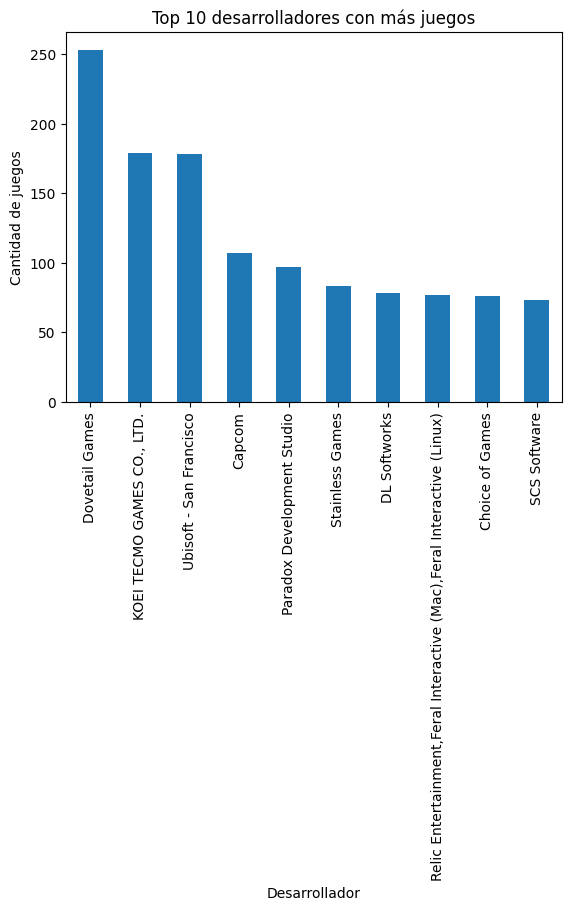

El gráfico de barras muestra los 10 desarrolladores con más juegos. Cada barra representa un desarrollador, y su altura indica la cantidad de juegos
que ha desarrollado.

Top 10 desarrolladores con más juegos:
 developer
Dovetail Games                                                           253
KOEI TECMO GAMES CO., LTD.                                               179
Ubisoft - San Francisco                                                  178
Capcom                                                                   107
Paradox Development Studio                                                97
Stainless Games                                                           83
DL Softworks                                                              78
Relic Entertainment,Feral Interactive (Mac),Feral Interactive (Linux)     77
Choice of Games                                                           76
SCS Software                                                              73
Name: cou

In [43]:
# Importo librerías.
import pandas as pd
import matplotlib.pyplot as plt
import textwrap

# Cuento la cantidad de juegos por desarrollador
developer_counts = df_steam_games['developer'].value_counts()

# Creo un gráfico de barras con los primeros 10 desarrolladores con más juegos
developer_counts.head(10).plot(kind='bar')
plt.title('Top 10 desarrolladores con más juegos')
plt.xlabel('Desarrollador')
plt.ylabel('Cantidad de juegos')

# Muestro el gráfico
plt.show()

# Genero la descripción
description = "El gráfico de barras muestra los 10 desarrolladores con más juegos. Cada barra representa un desarrollador, y su altura indica la cantidad de juegos que ha desarrollado."

# Ajusto la descripción a un ancho de 150 caracteres.
wrapped_description = textwrap.fill(description, width=150)

# Imprimo la descripción
print(wrapped_description)

# Imprimo los primeros 10 desarrolladores con más juegos
print("\nTop 10 desarrolladores con más juegos:\n", developer_counts.head(10))


### Analizo 'developer'.

In [44]:
# Importo librerías
import pandas as pd

def analyze_individual_column(df, column):
    """
    Esta función analiza una columna individual de un DataFrame de pandas.
    
    Parámetros:
    df (pandas.DataFrame): El DataFrame a analizar.
    column (str): El nombre de la columna a analizar.
    
    Retorna:
    None
    """
    print(f"\n\nAnalizando la columna '{column}'\n" + "-"*50)
    
    # Imprimo los primeros 20 valores
    print("\nPrimeros 20 valores:")
    print(df[column].head(20))
    
    # Verifico si hay valores nulos
    num_nulls = df[column].isnull().sum()
    print(f"\nNúmero de valores nulos: {num_nulls}")
    
    # Obtengo el tipo de datos de la columna
    dtype = df[column].dtype
    print(f"\nTipo de datos: {dtype}")
    
    # Si la columna es numérica, obtengo estadísticas descriptivas
    if pd.api.types.is_numeric_dtype(df[column]):
        print("\nEstadísticas descriptivas:")
        print(df[column].describe())
    
    # Si la columna es de tipo object (categórica), obtengo los valores únicos y sus conteos
    if dtype == 'object':
        print("\nValores únicos (top 5):")
        print(df[column].value_counts().head(5))
        
    # Si la columna contiene listas o diccionarios, analizo la longitud de los datos
    if df[column].apply(lambda x: isinstance(x, (list, dict))).any():
        print("\nLongitud de los datos (para listas y diccionarios):")
        print(df[column].apply(lambda x: len(x) if isinstance(x, (list, dict)) else None).describe())

# Uso de la función para una columna específica
df = df_steam_games  # aquí coloco el nombre del df y su nombre
column = 'developer'  # aquí coloco el nombre de la columna

analyze_individual_column(df, column)




Analizando la columna 'developer'
--------------------------------------------------

Primeros 20 valores:
0                          Kotoshiro
1                   Secret Level SRL
2                       Poolians.com
3                               彼岸领域
4                Trickjump Games Ltd
5             Poppermost Productions
6             Poppermost Productions
7     Stegalosaurus Game Development
8                  Copperpick Studio
9                       Ghulam Jewel
10                            Apillo
11            Poppermost Productions
12                            Apillo
13            Poppermost Productions
14                       Tero Lunkka
15                      FrozenPepper
16                      FrozenPepper
17                     Casey Labrack
18               Stainless Games Ltd
19                             Valve
Name: developer, dtype: object

Número de valores nulos: 0

Tipo de datos: object

Valores únicos (top 5):
developer
Dovetail Games                253


In [45]:
# Lista de nombres de developers para verificar duplicados
developer_list = ['Ubisoft - San Francisco', 'Capcom', 'Paradox Development Studio']

# Columnas a considerar al verificar duplicados
columns_to_consider = ['app_name', 'publisher', 'año de lanzamiento']

# Para cada nombre de developer en la lista
for developer in developer_list:
    # Crea una cadena de texto con la información que deseas
    info = f"""
    Este bloque de código verifica si hay filas duplicadas para el developer 
    '{developer}' en el DataFrame df_steam_games. 
    Si hay filas duplicadas, las imprime y luego las elimina del DataFrame.
    """
    # Imprime la cadena de texto
    print(info)

    # Filtra el DataFrame para mostrar solo las filas donde 'developer' es el nombre del developer actual
    df_game = df_steam_games[df_steam_games['developer'] == developer]

    # Verifica si hay filas duplicadas, considerando solo las columnas especificadas
    duplicates = df_game.duplicated(subset=columns_to_consider)

    # Si hay filas duplicadas
    if duplicates.any():
        print(f"Duplicados para {developer}:")
        
        # Imprime las filas duplicadas
        print(df_game[duplicates])
    else:
        # Imprime un mensaje indicando que no se encontraron duplicados para el developer actual
        print(f"No se encontraron duplicados para {developer}.")



    Este bloque de código verifica si hay filas duplicadas para el developer 
    'Ubisoft - San Francisco' en el DataFrame df_steam_games. 
    Si hay filas duplicadas, las imprime y luego las elimina del DataFrame.
    
No se encontraron duplicados para Ubisoft - San Francisco.

    Este bloque de código verifica si hay filas duplicadas para el developer 
    'Capcom' en el DataFrame df_steam_games. 
    Si hay filas duplicadas, las imprime y luego las elimina del DataFrame.
    
No se encontraron duplicados para Capcom.

    Este bloque de código verifica si hay filas duplicadas para el developer 
    'Paradox Development Studio' en el DataFrame df_steam_games. 
    Si hay filas duplicadas, las imprime y luego las elimina del DataFrame.
    
No se encontraron duplicados para Paradox Development Studio.


<h3 style="color:green">
Ahora bien analizamos los títulos de los juegos de Steam mediante el uso de técnicas de procesamiento del lenguaje natural en dónde encontraremos tendencias.

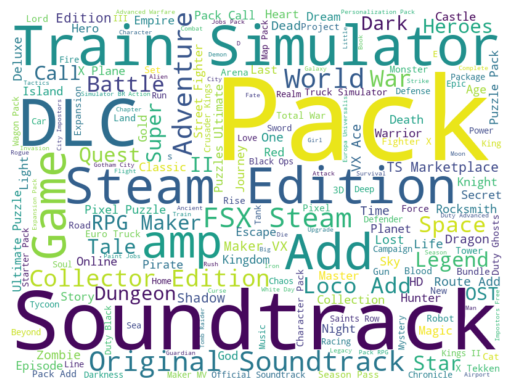

La nube de palabras muestra los títulos de los juegos de Steam. Cada palabra en la nube representa un título de juego, y su tamaño indica la
frecuencia de ese título en el conjunto de datos. Los títulos más frecuentes son: * Dark Matter: aparece 2 veces * Taxi: aparece 2 veces * Invisible
Apartment Zero: aparece 2 veces * Castles: aparece 2 veces * New York Bus Simulator: aparece 2 veces


In [46]:
# Importo librerías
import pandas as pd
import matplotlib.pyplot as plt
import tqdm
import textwrap
from wordcloud import WordCloud
from collections import Counter


def analyze_steam_game_titles(df_steam_games):
  """
  Analizo los títulos de los juegos de Steam.

  Args:
    df_steam_games: Un DataFrame de pandas con los juegos de Steam.

  Returns:
    Una lista con los títulos completos.
  """

  # Accedo a la columna de los títulos del DataFrame
  titles = df_steam_games["title"].tolist()

  return titles  # Devuelve una lista con los títulos completos

# Analizo los títulos de los juegos
titles = analyze_steam_game_titles(df_steam_games)

# Creo una nube de palabras con los títulos completos
wordcloud = WordCloud(width=800, height=600, background_color="white").generate(' '.join(titles))

# Muestro la nube de palabras
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")

# Muestro el gráfico
plt.show()

# Calculo las frecuencias de los títulos
title_frequencies = Counter(titles)

# Encuentro los títulos más comunes
most_common_titles = title_frequencies.most_common(5)

# Genero la descripción
description = "La nube de palabras muestra los títulos de los juegos de Steam. Cada palabra en la nube representa un título de juego, y su tamaño indica la frecuencia de ese título en el conjunto de datos. Los títulos más frecuentes son:\n"
for title, count in most_common_titles:
    description += f"* {title}: aparece {count} veces\n"

# Ajusto la descripción a un ancho de 150 caracteres.
wrapped_description = textwrap.fill(description, width=150)

# Imprimo la descripción
print(wrapped_description)


### Analizaremos el top ten de los juegos y los últimos 10 menos jugados.

In [47]:
print(df_steam_games.columns)

Index(['publisher', 'app_name', 'title', 'url', 'año de lanzamiento',
       'reviews_url', 'price', 'early_access', 'user_id', 'developer',
       ...
       'Steam Cloud', 'Steam Leaderboards', 'Steam Trading Cards',
       'Steam Turn Notifications', 'Steam Workshop', 'SteamVR Collectibles',
       'Tracked Motion Controllers', 'Valve Anti-Cheat enabled',
       'Windows Mixed Reality', 'año'],
      dtype='object', length=412)


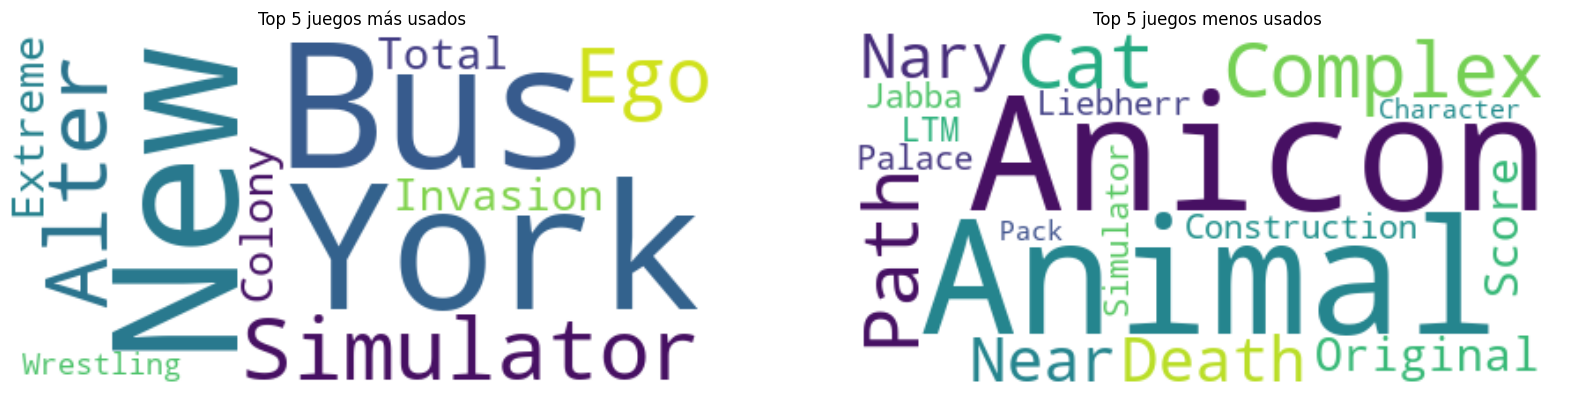

La nube de palabras muestra los 5 juegos más usados. Los juegos más grandes son los más usados. Los juegos más usados son: * New York Bus Simulator *
Alter Ego * Invasion * Colony * Total Extreme Wrestling
La nube de palabras muestra los 5 juegos menos usados. Los juegos más grandes son los menos usados. Los juegos menos usados son: * Anicon - Animal
Complex - Cat's Path * Nary * Near Death: Original Score * Construction Simulator 2015: Liebherr LTM 1300 6.2 * Jabba's Palace Character Pack


In [48]:
# Importo librerías
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import textwrap

def create_wordclouds(df_steam_games):
    """
    Esta función crea dos nubes de palabras: una para los juegos más usados y otra para los menos usados.
    
    Parámetros:
    df_steam_games (pandas.DataFrame): El DataFrame que contiene los datos de los juegos.
    
    Retorna:
    None
    """
    # Usaré 'app_name' como columna de uso
    top_five_games = df_steam_games['app_name'].value_counts().nlargest(5).index
    bottom_five_games = df_steam_games['app_name'].value_counts().nsmallest(5).index

    # Creo la nube de palabras para los juegos más usados
    wordcloud_top = WordCloud(background_color='white').generate(' '.join(top_five_games))

    # Creo la nube de palabras para los juegos menos usados
    wordcloud_bottom = WordCloud(background_color='white').generate(' '.join(bottom_five_games))

    # Creo una figura con dos subplots
    fig, axs = plt.subplots(1, 2, figsize=(20, 10))

    # Muestro la nube de palabras de los juegos más usados
    axs[0].imshow(wordcloud_top, interpolation='bilinear')
    axs[0].set_title('Top 5 juegos más usados')
    axs[0].axis('off')

    # Muestro la nube de palabras de los juegos menos usados
    axs[1].imshow(wordcloud_bottom, interpolation='bilinear')
    axs[1].set_title('Top 5 juegos menos usados')
    axs[1].axis('off')

    # Muestro la figura
    plt.show()

    # Genero las descripciones
    description_top = f"La nube de palabras muestra los 5 juegos más usados. Los juegos más grandes son los más usados. Los juegos más usados son:\n"
    for game in top_five_games:
        description_top += f"* {game}\n"

    description_bottom = f"La nube de palabras muestra los 5 juegos menos usados. Los juegos más grandes son los menos usados. Los juegos menos usados son:\n"
    for game in bottom_five_games:
        description_bottom += f"* {game}\n"

    # Ajusto las descripciones a un ancho de 150 caracteres.
    wrapped_description_top = textwrap.fill(description_top, width=150)
    wrapped_description_bottom = textwrap.fill(description_bottom, width=150)

    # Imprimo las descripciones
    print(wrapped_description_top)
    print(wrapped_description_bottom)

# Uso la función para crear las nubes de palabras
create_wordclouds(df_steam_games)


<h3 style="color:blue">
Ahora trabajaré con User Reviews

In [49]:
# Ya realizada la carga anteiormente, vemos su contenido
df_user_reviews


,user_id,user_url,reviews
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"[{'funny': '', 'posted': 'Posted November 5, 2..."
1,js41637,http://steamcommunity.com/id/js41637,"[{'funny': '', 'posted': 'Posted June 24, 2014..."
2,evcentric,http://steamcommunity.com/id/evcentric,"[{'funny': '', 'posted': 'Posted February 3.',..."
3,doctr,http://steamcommunity.com/id/doctr,"[{'funny': '', 'posted': 'Posted October 14, 2..."
4,maplemage,http://steamcommunity.com/id/maplemage,"[{'funny': '3 people found this review funny',..."
...,...,...,...
25794,76561198306599751,http://steamcommunity.com/profiles/76561198306...,"[{'funny': '', 'posted': 'Posted May 31.', 'la..."
25795,Ghoustik,http://steamcommunity.com/id/Ghoustik,"[{'funny': '', 'posted': 'Posted June 17.', 'l..."
25796,76561198310819422,http://steamcommunity.com/profiles/76561198310...,"[{'funny': '1 person found this review funny',..."
25797,76561198312638244,http://steamcommunity.com/profiles/76561198312...,"[{'funny': '', 'posted': 'Posted July 21.', 'l..."


In [50]:
print(df_user_reviews['reviews'])


0        [{'funny': '', 'posted': 'Posted November 5, 2...
1        [{'funny': '', 'posted': 'Posted June 24, 2014...
2        [{'funny': '', 'posted': 'Posted February 3.',...
3        [{'funny': '', 'posted': 'Posted October 14, 2...
4        [{'funny': '3 people found this review funny',...
                               ...                        
25794    [{'funny': '', 'posted': 'Posted May 31.', 'la...
25795    [{'funny': '', 'posted': 'Posted June 17.', 'l...
25796    [{'funny': '1 person found this review funny',...
25797    [{'funny': '', 'posted': 'Posted July 21.', 'l...
25798    [{'funny': '1 person found this review funny',...
Name: reviews, Length: 25799, dtype: object


In [51]:
# Importo librerías.
import pandas as pd

def main(df_user_reviews):
    """
    Analizo el DataFrame dado.

    Parámetros:
    df_user_reviews (pandas.DataFrame): El DataFrame a analizar.
    """

    # Inspecciono los tipos de datos de cada columna en tu DataFrame
    dtypes = df_user_reviews.dtypes

    # Si alguna columna es de tipo 'object', podría contener datos anidados
    object_cols = df_user_reviews.select_dtypes(include=['object']).columns

    # Imprimo los tipos de datos, las columnas que podrían contener datos anidados y la forma del DataFrame
    print(f"Tipos de datos en el DataFrame:\n{dtypes}\n")
    print(f"Columnas que podrían contener datos anidados: {object_cols}\n")
    print(f"El df_user_reviews tiene {df_user_reviews.shape[0]} filas y {df_user_reviews.shape[1]} columnas.")

if __name__ == "__main__":
    # Asegúrate de que df_user_reviews está definido aquí
    main(df_user_reviews)


Tipos de datos en el DataFrame:
user_id     object
user_url    object
reviews     object
dtype: object

Columnas que podrían contener datos anidados: Index(['user_id', 'user_url', 'reviews'], dtype='object')

El df_user_reviews tiene 25799 filas y 3 columnas.


### Procederé a visualizar las columnas que contienen una lista o un diccionario.

In [52]:
# Importo librerías.
import pandas as pd

# Itero sobre cada columna
for column in df_user_reviews.columns:
    # Obtengo el primer valor no nulo
    non_null_values = df_user_reviews[column].dropna()
    if non_null_values.empty:
        print(f"La columna '{column}' solo contiene valores nulos.")
        continue
    first_non_null_value = non_null_values.iloc[0]

    # Compruebo si es una lista o un diccionario
    if isinstance(first_non_null_value, list):
        print(f"La columna '{column}' contiene una lista.")
    elif isinstance(first_non_null_value, dict):
        print(f"La columna '{column}' contiene un diccionario.")
    else:
        print(f"La columna '{column}' no contiene ni listas ni diccionarios.")


La columna 'user_id' no contiene ni listas ni diccionarios.
La columna 'user_url' no contiene ni listas ni diccionarios.
La columna 'reviews' contiene una lista.


### Desanido, creando columnas ficticias con dumies; verifico los tipos de datos, duplicados y chequeo.

In [53]:
# Importo librerías.
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def desanidar_reviews(df, column):
    """
    Esta función desanida la columna 'reviews' y crea variables ficticias.
    
    Parámetros:
    df (pandas.DataFrame): El DataFrame a analizar.
    column (str): El nombre de la columna a desanidar y crear variables ficticias.
    
    Retorna:
    df (pandas.DataFrame): El DataFrame con las nuevas columnas.
    new_columns (list): La lista de las nuevas columnas.
    """
    # Guardo las columnas originales
    original_columns = df.columns.tolist()

    # Desanido la columna 'reviews'
    df = df.explode(column)

    # Duplico las filas generando un diccionario por cada diccionario en la lista. 
    # Luego, concateno el DataFrame original con el DataFrame generado a partir de transformar los diccionarios a pandas
    df = pd.concat([df.drop([column],axis=1),df[column].apply(pd.Series)],axis=1)

    # Encuentro las nuevas columnas después del desanidado
    new_columns = [col for col in df.columns if col not in original_columns]

    return df, new_columns

# Uso de la función para la columna 'reviews'
df_user_reviews = df_user_reviews  # aquí coloco el nombre del df y su nombre
column = 'reviews'  # aquí coloco el nombre de la columna

df_user_reviews, new_columns_reviews = desanidar_reviews(df_user_reviews, column)

print(f"El df_user_reviews tiene {df_user_reviews.shape[0]} filas y {df_user_reviews.shape[1]} columnas.")
print(f"Nuevas columnas para 'reviews': {new_columns_reviews}")


El df_user_reviews tiene 59333 filas y 10 columnas.
Nuevas columnas para 'reviews': ['funny', 'posted', 'last_edited', 'item_id', 'helpful', 'recommend', 'review', 0]


In [54]:
# Importo librerías.
import pandas as pd

def find_duplicates(df, column):
    """
    Encuentra filas duplicadas en un DataFrame basado en una columna específica.

    Parámetros:
    df (pandas.DataFrame): El DataFrame en el que buscar.
    column (str): El nombre de la columna en la que buscar duplicados.

    Devuelve:
    filas_duplicadas (pandas.DataFrame): Un DataFrame que contiene solo las filas duplicadas.
    """
    duplicados = df.duplicated(subset=column, keep=False)
    filas_duplicadas = df[duplicados]
    return filas_duplicadas

# Uso de la función
filas_duplicadas = find_duplicates(df_user_reviews, 'user_id')
filas_duplicadas


,user_id,user_url,funny,posted,last_edited,item_id,helpful,recommend,review,0
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,,"Posted November 5, 2011.",,1250,No ratings yet,True,Simple yet with great replayability. In my opi...,NaN
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,,"Posted July 15, 2011.",,22200,No ratings yet,True,It's unique and worth a playthrough.,NaN
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,,"Posted April 21, 2011.",,43110,No ratings yet,True,Great atmosphere. The gunplay can be a bit chu...,NaN
1,js41637,http://steamcommunity.com/id/js41637,,"Posted June 24, 2014.",,251610,15 of 20 people (75%) found this review helpful,True,I know what you think when you see this title ...,NaN
1,js41637,http://steamcommunity.com/id/js41637,,"Posted September 8, 2013.",,227300,0 of 1 people (0%) found this review helpful,True,For a simple (it's actually not all that simpl...,NaN
...,...,...,...,...,...,...,...,...,...,...
25797,76561198312638244,http://steamcommunity.com/profiles/76561198312...,,Posted July 10.,,70,No ratings yet,True,a must have classic from steam definitely wort...,NaN
25797,76561198312638244,http://steamcommunity.com/profiles/76561198312...,,Posted July 8.,,362890,No ratings yet,True,this game is a perfect remake of the original ...,NaN
25798,LydiaMorley,http://steamcommunity.com/id/LydiaMorley,1 person found this review funny,Posted July 3.,,273110,1 of 2 people (50%) found this review helpful,True,had so much fun plaing this and collecting res...,NaN
25798,LydiaMorley,http://steamcommunity.com/id/LydiaMorley,,Posted July 20.,,730,No ratings yet,True,:D,NaN


In [55]:
# Importo librerías.
import pandas as pd

# Agrupo el DataFrame por 'user_id' y 'review', y cuento el número de ocurrencias de cada combinación.
conteo_resenas = filas_duplicadas.groupby(['user_id', 'review']).size()

# Filtro las combinaciones que ocurren más de una vez.
resenas_duplicadas = conteo_resenas[conteo_resenas > 1]

print(resenas_duplicadas)


user_id                review                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     
05041129               This game to me it is so good that it is better than any of the games out their and $15 worth it                                                                                              

In [56]:
# Procedo a identificar reseñas duplicadas.
duplicados = filas_duplicadas.duplicated(subset=['user_id', 'user_url', 'funny', 'posted', 'last_edited', 'item_id', 'helpful', 'recommend', 'review', 0], keep=False)

# Muestro solo las filas duplicadas.
filas_duplicadas_duplicadas = filas_duplicadas[duplicados]

# Verifico si hay duplicados y muestra un mensaje apropiado.
if filas_duplicadas_duplicadas.empty:
    print("No hay reseñas duplicadas.")
else:
    print("Hay reseñas duplicadas.")
    print(filas_duplicadas_duplicadas)

# Elimina las filas duplicadas del DataFrame original.
filas_duplicadas.drop_duplicates(subset=['user_id', 'user_url', 'funny', 'posted', 'last_edited', 'item_id', 'helpful', 'recommend', 'review', 0], keep='first', inplace=True)


Hay reseñas duplicadas.
                    user_id  \
9         76561198156664158   
50                   Rivtex   
119    DieMadchenschanderin   
119    DieMadchenschanderin   
119    DieMadchenschanderin   
...                     ...   
18234     76561198092022514   
18234     76561198092022514   
18234     76561198092022514   
18234     76561198092022514   
18309        SuchGayMuchWow   

                                                user_url funny  \
9      http://steamcommunity.com/profiles/76561198156...         
50                   http://steamcommunity.com/id/Rivtex         
119    http://steamcommunity.com/id/DieMadchenschanderin         
119    http://steamcommunity.com/id/DieMadchenschanderin         
119    http://steamcommunity.com/id/DieMadchenschanderin         
...                                                  ...   ...   
18234  http://steamcommunity.com/profiles/76561198092...         
18234  http://steamcommunity.com/profiles/76561198092...         
18234  ht

C:\Users\Esteban García\AppData\Local\Temp\ipykernel_5408\4005002905.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filas_duplicadas.drop_duplicates(subset=['user_id', 'user_url', 'funny', 'posted', 'last_edited', 'item_id', 'helpful', 'recommend', 'review', 0], keep='first', inplace=True)


### Normalizaré a str, posteriormente algunos emojis, signos, entre otros.

In [57]:
# Identifico las filas en la columna 'review' que no son cadenas (strings)
no_strings = filas_duplicadas['review'].apply(lambda x: not isinstance(x, str))

# Verifico si todas las filas en la columna 'review' son cadenas (strings)
all_strings = not no_strings.any()

print(all_strings)

# Muestro solo las filas que no son cadenas (strings)
print(filas_duplicadas[no_strings])


False
              user_id                                           user_url  \
83  76561198094224872  http://steamcommunity.com/profiles/76561198094...   

   funny posted last_edited item_id helpful recommend review   0  
83   NaN    NaN         NaN     NaN     NaN       NaN    NaN NaN  


In [58]:
# Identifico las filas en la columna 'review' que no son cadenas (strings)
no_strings = filas_duplicadas['review'].apply(lambda x: not isinstance(x, str))

# Muestro solo las filas que no son cadenas (strings)
filas_duplicadas[no_strings]


,user_id,user_url,funny,posted,last_edited,item_id,helpful,recommend,review,0
83,76561198094224872,http://steamcommunity.com/profiles/76561198094...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
# Reemplazo los valores NaN en la columna 'review' con 'Sin Dato'
filas_duplicadas.loc[:, 'review'] = filas_duplicadas['review'].fillna('Sin Dato')

print(filas_duplicadas['review'].head())


0    Simple yet with great replayability. In my opi...
0                 It's unique and worth a playthrough.
0    Great atmosphere. The gunplay can be a bit chu...
1    I know what you think when you see this title ...
1    For a simple (it's actually not all that simpl...
Name: review, dtype: object


### Analizo los NaN

In [60]:
"""
Aquí comienza el proceso de eliminación de columnas.
Primero, se obtiene una lista de todas las columnas en df_user_reviews.
Luego, se calcula el porcentaje de valores NaN para cada columna.
Se obtiene una lista de las columnas que tienen el 100% de valores NaN.
Se añaden a la lista las columnas específicas que se quieren eliminar porque no son relevantes.
Finalmente, se verifica si las columnas existen en df_user_reviews y si es así, se eliminan.
"""

# Todas las columnas
columnas_de_interes = df_user_reviews.columns.tolist()

# Calcula el porcentaje de valores NaN
porcentaje_nan = df_user_reviews[columnas_de_interes].isnull().mean() * 100

# Obtiene las columnas con el 100% de datos NaN
columnas_a_eliminar = porcentaje_nan[porcentaje_nan == 100].index.tolist()

# Añade las columnas específicas que quieres eliminar por no ser relevantes
columnas_a_eliminar.extend(['funny', 'last_edited', 'helpful', '0'])

# Verifica si las columnas existen en el DataFrame y las elimina
for columna in columnas_a_eliminar:
    if columna in df_user_reviews.columns:
        df_user_reviews = df_user_reviews.drop(columna, axis=1)

# Actualiza new_columns_reviews para que contenga solo las columnas que aún existen en df_user_reviews
new_columns_reviews = [col for col in new_columns_reviews if col in df_user_reviews.columns]

print("Las columnas con el 100% de datos NaN y las columnas 'funny', 'last_edited', 'helpful' y '0' han sido eliminadas del DataFrame.")
print(new_columns_reviews)

Las columnas con el 100% de datos NaN y las columnas 'funny', 'last_edited', 'helpful' y '0' han sido eliminadas del DataFrame.
['posted', 'item_id', 'recommend', 'review']


In [61]:
# Creo un diccionario de caracteres y sus significados para normalizar en la columna 'review'.
char_dict = {
    ":D": "I liked it",
    ":(": "I didn't like it",
    ":|": "I'm indifferent",
    "&": " and ",
    "%": " percent",
    "♥♥♥♥♥♥♥": "I loved it",
    "♥♥♥♥♥♥♥♥": "I loved it a lot",
}

# Creo una función para reemplazar los caracteres por sus significados.
def replace_chars(text):
    """
    Esta función toma una cadena de texto y reemplaza ciertos caracteres (definidos en el diccionario char_dict)
    por sus significados correspondientes. Utiliza un codificador para manejar los caracteres especiales.

    Parámetros:
    text (str): La cadena de texto a procesar.

    Retorna:
    str: La cadena de texto con los caracteres reemplazados.
    """
    for char, meaning in char_dict.items():
        text = text.replace(char, meaning)
    return text

# Convierto toda la columna 'review' a texto
df_user_reviews['review'] = df_user_reviews['review'].astype(str)

# Aplico la función a las reseñas.
df_user_reviews['review'] = df_user_reviews['review'].apply(replace_chars)
df_user_reviews

,user_id,user_url,posted,item_id,recommend,review
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"Posted November 5, 2011.",1250,True,Simple yet with great replayability. In my opi...
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"Posted July 15, 2011.",22200,True,It's unique and worth a playthrough.
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"Posted April 21, 2011.",43110,True,Great atmosphere. The gunplay can be a bit chu...
1,js41637,http://steamcommunity.com/id/js41637,"Posted June 24, 2014.",251610,True,I know what you think when you see this title ...
1,js41637,http://steamcommunity.com/id/js41637,"Posted September 8, 2013.",227300,True,For a simple (it's actually not all that simpl...
...,...,...,...,...,...,...
25797,76561198312638244,http://steamcommunity.com/profiles/76561198312...,Posted July 10.,70,True,a must have classic from steam definitely wort...
25797,76561198312638244,http://steamcommunity.com/profiles/76561198312...,Posted July 8.,362890,True,this game is a perfect remake of the original ...
25798,LydiaMorley,http://steamcommunity.com/id/LydiaMorley,Posted July 3.,273110,True,had so much fun plaing this and collecting res...
25798,LydiaMorley,http://steamcommunity.com/id/LydiaMorley,Posted July 20.,730,True,I liked it


### Analizo posted

In [62]:
# Creo una serie booleana para cada formato
has_year = df_user_reviews['posted'].str.contains('\d{4}')  # Busco cuatro dígitos consecutivos (un año)

# Cuento cuántas filas coinciden con cada formato
num_with_year = has_year.sum()
num_without_year = len(df_user_reviews) - num_with_year

print(f"Number of rows with year: {num_with_year}")
print(f"Number of rows without year: {num_without_year}")

Number of rows with year: 49186
Number of rows without year: 10147


In [63]:
# Elimino las filas con valores nulos en la columna 'posted'.
filas_duplicadas.dropna(subset=['posted'], inplace=True)

# Verifico si todavía hay valores nulos en la columna 'posted'.
if filas_duplicadas['posted'].isnull().any():
    print("Todavía hay valores nulos.")
else:
    print("No hay valores nulos.")

No hay valores nulos.


In [64]:
# Importo librerías
import pandas as pd

def analyze_individual_column(df, column):
    """
    Esta función analiza una columna individual de un DataFrame de pandas.
    
    Parámetros:
    df (pandas.DataFrame): El DataFrame a analizar.
    column (str): El nombre de la columna a analizar.
    
    Retorna:
    None
    """
    print(f"\n\nAnalizando la columna '{column}'\n" + "-"*50)
    
    # Imprimo los primeros 20 valores
    print("\nPrimeros 20 valores:")
    print(df[column].head(20))
    
    # Verifico si hay valores nulos
    num_nulls = df[column].isnull().sum()
    print(f"\nNúmero de valores nulos: {num_nulls}")
    
    # Obtengo el tipo de datos de la columna
    dtype = df[column].dtype
    print(f"\nTipo de datos: {dtype}")
    
    # Si la columna es numérica, obtengo estadísticas descriptivas
    if pd.api.types.is_numeric_dtype(df[column]):
        print("\nEstadísticas descriptivas:")
        print(df[column].describe())
    
    # Si la columna es de tipo object (categórica), obtengo los valores únicos y sus conteos
    if dtype == 'object':
        print("\nValores únicos (top 10):")
        print(df[column].value_counts().head(5))
        
    # Si la columna contiene listas o diccionarios, analizo la longitud de los datos
    if df[column].apply(lambda x: isinstance(x, (list, dict))).any():
        print("\nLongitud de los datos (para listas y diccionarios):")
        print(df[column].apply(lambda x: len(x) if isinstance(x, (list, dict)) else None).describe())

# Uso de la función para una columna específica
df = df_user_reviews  # aquí coloco el nombre del df y su nombre
column = 'posted'  # aquí coloco el nombre de la columna

analyze_individual_column(df, column)

""" Podría descartar esta columna, para mi trabajo no la voy a requerir """



Analizando la columna 'posted'
--------------------------------------------------

Primeros 20 valores:
0     Posted November 5, 2011.
0        Posted July 15, 2011.
0       Posted April 21, 2011.
1        Posted June 24, 2014.
1    Posted September 8, 2013.
1    Posted November 29, 2013.
2           Posted February 3.
2     Posted December 4, 2015.
2     Posted November 3, 2014.
2     Posted October 15, 2014.
2     Posted October 15, 2014.
2     Posted October 15, 2014.
3     Posted October 14, 2013.
3        Posted July 28, 2012.
3         Posted June 2, 2012.
3        Posted June 29, 2014.
3    Posted November 22, 2012.
3    Posted February 23, 2012.
4       Posted April 15, 2014.
4    Posted December 23, 2013.
Name: posted, dtype: object

Número de valores nulos: 28

Tipo de datos: object

Valores únicos (top 10):
posted
Posted June 21, 2014.        225
Posted June 20, 2014.        193
Posted June 23, 2014.        174
Posted June 27, 2014.        172
Posted December 26, 2013.    

' Podría descartar esta columna, para mi trabajo no la voy a requerir '

In [65]:
# Lista de fechas de publicación para verificar duplicados
posted_dates = ['Posted June 23, 2014.', 'Posted June 27, 2014.', 'Posted December 26, 2013.']

# Columnas a considerar al verificar duplicados
columns_to_consider = ['user_id', 'recommend', 'review']

# Para cada fecha de publicación en la lista
for posted_date in posted_dates:
    # Crea una cadena de texto con la información que deseas
    info = f"""
    Este bloque de código verifica si hay filas duplicadas para la fecha de publicación 
    '{posted_date}' en el DataFrame df_user_reviews. 
    Si hay filas duplicadas, las imprime y luego las elimina del DataFrame.
    """
    # Imprime la cadena de texto
    print(info)

    # Filtra el DataFrame para mostrar solo las filas donde 'posted' es la fecha de publicación actual
    df_reviews = df_user_reviews[df_user_reviews['posted'] == posted_date]

    # Verifica si hay filas duplicadas, considerando solo las columnas especificadas
    duplicates = df_reviews.duplicated(subset=columns_to_consider)

    # Si hay filas duplicadas
    if duplicates.any():
        print(f"Duplicados para {posted_date}:")
        
        # Imprime las filas duplicadas
        print(df_reviews[duplicates])
        
        # Elimina las filas duplicadas
        df_reviews = df_reviews.drop_duplicates(subset=columns_to_consider)
        
        print(f"\nFilas duplicadas eliminadas para la fecha de publicación {posted_date}.")
    else:
        # Imprime un mensaje indicando que no se encontraron duplicados para la fecha de publicación actual
        print(f"No se encontraron duplicados para la fecha de publicación {posted_date}.")



    Este bloque de código verifica si hay filas duplicadas para la fecha de publicación 
    'Posted June 23, 2014.' en el DataFrame df_user_reviews. 
    Si hay filas duplicadas, las imprime y luego las elimina del DataFrame.
    
Duplicados para Posted June 23, 2014.:
                user_id                                           user_url  \
1456  76561198062039159  http://steamcommunity.com/profiles/76561198062...   
5292  76561198091034264  http://steamcommunity.com/profiles/76561198091...   
5506          Justmatel             http://steamcommunity.com/id/Justmatel   

                     posted item_id recommend  \
1456  Posted June 23, 2014.  222880      True   
5292  Posted June 23, 2014.  204360      True   
5506  Posted June 23, 2014.  263440      True   

                                                 review  
1456  This is possibly the best tactical FPS i've ev...  
5292  This game is incredibly addicting, and just wh...  
5506                            HORAY THE ST

### Analizo 'review'

In [66]:
# Importo librerías
import pandas as pd

def analyze_individual_column(df, column):
    """
    Esta función analiza una columna individual de un DataFrame de pandas.
    
    Parámetros:
    df (pandas.DataFrame): El DataFrame a analizar.
    column (str): El nombre de la columna a analizar.
    
    Retorna:
    None
    """
    print(f"\n\nAnalizando la columna '{column}'\n" + "-"*50)
    
    # Imprimo los primeros 20 valores
    print("\nPrimeros 20 valores:")
    print(df[column].head(20))
    
    # Verifico si hay valores nulos
    num_nulls = df[column].isnull().sum()
    print(f"\nNúmero de valores nulos: {num_nulls}")
    
    # Obtengo el tipo de datos de la columna
    dtype = df[column].dtype
    print(f"\nTipo de datos: {dtype}")
    
    # Si la columna es numérica, obtengo estadísticas descriptivas
    if pd.api.types.is_numeric_dtype(df[column]):
        print("\nEstadísticas descriptivas:")
        print(df[column].describe())
    
    # Si la columna es de tipo object (categórica), obtengo los valores únicos y sus conteos
    if dtype == 'object':
        print("\nValores únicos (top 10):")
        print(df[column].value_counts().head(5))
        
    # Si la columna contiene listas o diccionarios, analizo la longitud de los datos
    if df[column].apply(lambda x: isinstance(x, (list, dict))).any():
        print("\nLongitud de los datos (para listas y diccionarios):")
        print(df[column].apply(lambda x: len(x) if isinstance(x, (list, dict)) else None).describe())

# Uso de la función para una columna específica
df = df_user_reviews  # aquí coloco el nombre del df y su nombre
column = 'review'  # aquí coloco el nombre de la columna

analyze_individual_column(df, column)

""" Podría descartar esta columna, para mi trabajo no la voy a requerir """



Analizando la columna 'review'
--------------------------------------------------

Primeros 20 valores:
0    Simple yet with great replayability. In my opi...
0                 It's unique and worth a playthrough.
0    Great atmosphere. The gunplay can be a bit chu...
1    I know what you think when you see this title ...
1    For a simple (it's actually not all that simpl...
1    Very fun little game to play when your bored o...
2    A suitably punishing roguelike platformer.  Wi...
2    "Run for fun? What the hell kind of fun is that?"
2    Elegant integration of gameplay, story, world ...
2    Random drops and random quests, with stat poin...
2    Fun balance of tactics and strategy.  Potentia...
2    Fun world builder, with plenty of option of ho...
3    This game... is so fun. The fight sequences ha...
3    Really Really Really Great Game, very good sto...
3    Just buy it already. Great Story, Great Multip...
3    It was a great game from what I played, right ...
3    The endin

' Podría descartar esta columna, para mi trabajo no la voy a requerir '

In [67]:
# Lista de nombres de usuarios para verificar duplicados
user_id1 = ['great game', '10/10', 'Great game' ]

# Columnas a considerar al verificar duplicados
columns_to_consider = ['posted', 'item_id', 'recommend', 'review']

# Para cada nombre de usuario en la lista
for user_id in user_id1:
    # Crea una cadena de texto con la información que deseas
    info = f"""
    Este bloque de código verifica si hay filas duplicadas para el usuario 
    '{user_id}' en el DataFrame df_user_reviews. 
    Si hay filas duplicadas, las imprime y luego las elimina del DataFrame.
    """
    # Imprime la cadena de texto
    print(info)

    # Filtra el DataFrame para mostrar solo las filas donde 'user_id' es el nombre del usuario actual
    df_user = df_user_reviews[df_user_reviews['user_id'] == user_id]

    # Verifica si hay filas duplicadas, considerando solo las columnas especificadas
    duplicates = df_user.duplicated(subset=columns_to_consider)

    # Si hay filas duplicadas
    if duplicates.any():
        print(f"Duplicados para {user_id}:")
        
        # Imprime las filas duplicadas
        print(df_user[duplicates])
        
        # Elimina las filas duplicadas
        df_user_reviews.drop_duplicates(subset=columns_to_consider, inplace=True)
    else:
        # Imprime un mensaje indicando que no se encontraron duplicados para el usuario actual
        print(f"No se encontraron duplicados para {user_id}.")



    Este bloque de código verifica si hay filas duplicadas para el usuario 
    'great game' en el DataFrame df_user_reviews. 
    Si hay filas duplicadas, las imprime y luego las elimina del DataFrame.
    
No se encontraron duplicados para great game.

    Este bloque de código verifica si hay filas duplicadas para el usuario 
    '10/10' en el DataFrame df_user_reviews. 
    Si hay filas duplicadas, las imprime y luego las elimina del DataFrame.
    
No se encontraron duplicados para 10/10.

    Este bloque de código verifica si hay filas duplicadas para el usuario 
    'Great game' en el DataFrame df_user_reviews. 
    Si hay filas duplicadas, las imprime y luego las elimina del DataFrame.
    
No se encontraron duplicados para Great game.


### Trabajaré las columnas 'user_id' y 'user_url'

In [68]:
df_user_reviews['coincide'] = df_user_reviews['user_id'] == df_user_reviews['user_url']
print('Coincidencias:', df_user_reviews['coincide'].sum())


Coincidencias: 0


In [69]:
# Visualización de los primeros registros
print(df_user_reviews[['user_id', 'user_url']].head())

# Comparación de valores únicos
print('Valores únicos en user_id:', df_user_reviews['user_id'].nunique())
print('Valores únicos en user_url:', df_user_reviews['user_url'].nunique())

# Análisis de coincidencias
df_user_reviews['coincide'] = df_user_reviews['user_id'] == df_user_reviews['user_url']
print('Coincidencias:', df_user_reviews['coincide'].sum())

# Verificar el tipo de datos
print(df_user_reviews[['user_id', 'user_url']].dtypes)


             user_id                                           user_url
0  76561197970982479  http://steamcommunity.com/profiles/76561197970...
0  76561197970982479  http://steamcommunity.com/profiles/76561197970...
0  76561197970982479  http://steamcommunity.com/profiles/76561197970...
1            js41637               http://steamcommunity.com/id/js41637
1            js41637               http://steamcommunity.com/id/js41637
Valores únicos en user_id: 25485
Valores únicos en user_url: 25485
Coincidencias: 0
user_id     object
user_url    object
dtype: object


### Analizo user_id

In [70]:
# Importo librerías
import pandas as pd

def analyze_individual_column(df, column):
    """
    Esta función analiza una columna individual de un DataFrame de pandas.
    
    Parámetros:
    df (pandas.DataFrame): El DataFrame a analizar.
    column (str): El nombre de la columna a analizar.
    
    Retorna:
    None
    """
    print(f"\n\nAnalizando la columna '{column}'\n" + "-"*50)
    
    # Imprimo los primeros 20 valores
    print("\nPrimeros 20 valores:")
    print(df[column].head(20))
    
    # Verifico si hay valores nulos
    num_nulls = df[column].isnull().sum()
    print(f"\nNúmero de valores nulos: {num_nulls}")
    
    # Obtengo el tipo de datos de la columna
    dtype = df[column].dtype
    print(f"\nTipo de datos: {dtype}")
    
    # Si la columna es numérica, obtengo estadísticas descriptivas
    if pd.api.types.is_numeric_dtype(df[column]):
        print("\nEstadísticas descriptivas:")
        print(df[column].describe())
    
    # Si la columna es de tipo object (categórica), obtengo los valores únicos y sus conteos
    if dtype == 'object':
        print("\nValores únicos (top 5):")
        print(df[column].value_counts().head(5))
        
    # Si la columna contiene listas o diccionarios, analizo la longitud de los datos
    if df[column].apply(lambda x: isinstance(x, (list, dict))).any():
        print("\nLongitud de los datos (para listas y diccionarios):")
        print(df[column].apply(lambda x: len(x) if isinstance(x, (list, dict)) else None).describe())

# Uso de la función para una columna específica
df = df_user_reviews  # aquí coloco el nombre del df y su nombre
column = 'user_id'  # aquí coloco el nombre de la columna

analyze_individual_column(df, column)



Analizando la columna 'user_id'
--------------------------------------------------

Primeros 20 valores:
0    76561197970982479
0    76561197970982479
0    76561197970982479
1              js41637
1              js41637
1              js41637
2            evcentric
2            evcentric
2            evcentric
2            evcentric
2            evcentric
2            evcentric
3                doctr
3                doctr
3                doctr
3                doctr
3                doctr
3                doctr
4            maplemage
4            maplemage
Name: user_id, dtype: object

Número de valores nulos: 0

Tipo de datos: object

Valores únicos (top 5):
user_id
76561198094665607    20
chicken_tonight      20
OfficialSenix        20
Letachal             20
76561198064484479    20
Name: count, dtype: int64


In [71]:
# Lista de nombres de usuarios para verificar duplicados
user_id1 = ['OfficialSenix', 'Letachal', '76561198064484479']

# Columnas a considerar al verificar duplicados
columns_to_consider = ['posted', 'item_id', 'recommend', 'review']

# Para cada nombre de usuario en la lista
for user_id in user_id1:
    # Crea una cadena de texto con la información que deseas
    info = f"""
    Este bloque de código verifica si hay filas duplicadas para el usuario 
    '{user_id}' en el DataFrame df_user_reviews. 
    Si hay filas duplicadas, las imprime y luego las elimina del DataFrame.
    """
    # Imprime la cadena de texto
    print(info)

    # Filtra el DataFrame para mostrar solo las filas donde 'user_id' es el nombre del usuario actual
    df_user = df_user_reviews[df_user_reviews['user_id'] == user_id]

    # Verifica si hay filas duplicadas, considerando solo las columnas especificadas
    duplicates = df_user.duplicated(subset=columns_to_consider)

    # Si hay filas duplicadas
    if duplicates.any():
        print(f"Duplicados para {user_id}:")
        
        # Imprime las filas duplicadas
        print(df_user[duplicates])
        
        # Elimina las filas duplicadas
        df_user_reviews.drop_duplicates(subset=columns_to_consider, inplace=True)
    else:
        # Imprime un mensaje indicando que no se encontraron duplicados para el usuario actual
        print(f"No se encontraron duplicados para {user_id}.")



    Este bloque de código verifica si hay filas duplicadas para el usuario 
    'OfficialSenix' en el DataFrame df_user_reviews. 
    Si hay filas duplicadas, las imprime y luego las elimina del DataFrame.
    
Duplicados para OfficialSenix:
            user_id                                    user_url  \
3940  OfficialSenix  http://steamcommunity.com/id/OfficialSenix   
3940  OfficialSenix  http://steamcommunity.com/id/OfficialSenix   
3940  OfficialSenix  http://steamcommunity.com/id/OfficialSenix   
3940  OfficialSenix  http://steamcommunity.com/id/OfficialSenix   
3940  OfficialSenix  http://steamcommunity.com/id/OfficialSenix   
3940  OfficialSenix  http://steamcommunity.com/id/OfficialSenix   
3940  OfficialSenix  http://steamcommunity.com/id/OfficialSenix   
3940  OfficialSenix  http://steamcommunity.com/id/OfficialSenix   
3940  OfficialSenix  http://steamcommunity.com/id/OfficialSenix   
3940  OfficialSenix  http://steamcommunity.com/id/OfficialSenix   

                   

### Analizo user-url

In [72]:
# Importo librerías
import pandas as pd

def analyze_individual_column(df, column):
    """
    Esta función analiza una columna individual de un DataFrame de pandas.
    
    Parámetros:
    df (pandas.DataFrame): El DataFrame a analizar.
    column (str): El nombre de la columna a analizar.
    
    Retorna:
    None
    """
    print(f"\n\nAnalizando la columna '{column}'\n" + "-"*50)
    
    # Imprimo los primeros 20 valores
    print("\nPrimeros 20 valores:")
    print(df[column].head(20))
    
    # Verifico si hay valores nulos
    num_nulls = df[column].isnull().sum()
    print(f"\nNúmero de valores nulos: {num_nulls}")
    
    # Obtengo el tipo de datos de la columna
    dtype = df[column].dtype
    print(f"\nTipo de datos: {dtype}")
    
    # Si la columna es numérica, obtengo estadísticas descriptivas
    if pd.api.types.is_numeric_dtype(df[column]):
        print("\nEstadísticas descriptivas:")
        print(df[column].describe())
    
    # Si la columna es de tipo object (categórica), obtengo los valores únicos y sus conteos
    if dtype == 'object':
        print("\nValores únicos (top 5):")
        print(df[column].value_counts().head(5))
        
    # Si la columna contiene listas o diccionarios, analizo la longitud de los datos
    if df[column].apply(lambda x: isinstance(x, (list, dict))).any():
        print("\nLongitud de los datos (para listas y diccionarios):")
        print(df[column].apply(lambda x: len(x) if isinstance(x, (list, dict)) else None).describe())

# Uso de la función para una columna específica
df = df_user_reviews  # aquí coloco el nombre del df y su nombre
column = 'user_url'  # aquí coloco el nombre de la columna

analyze_individual_column(df, column)



Analizando la columna 'user_url'
--------------------------------------------------

Primeros 20 valores:
0    http://steamcommunity.com/profiles/76561197970...
0    http://steamcommunity.com/profiles/76561197970...
0    http://steamcommunity.com/profiles/76561197970...
1                 http://steamcommunity.com/id/js41637
1                 http://steamcommunity.com/id/js41637
1                 http://steamcommunity.com/id/js41637
2               http://steamcommunity.com/id/evcentric
2               http://steamcommunity.com/id/evcentric
2               http://steamcommunity.com/id/evcentric
2               http://steamcommunity.com/id/evcentric
2               http://steamcommunity.com/id/evcentric
2               http://steamcommunity.com/id/evcentric
3                   http://steamcommunity.com/id/doctr
3                   http://steamcommunity.com/id/doctr
3                   http://steamcommunity.com/id/doctr
3                   http://steamcommunity.com/id/doctr
3           

In [73]:
# Lista de URLs de usuarios para verificar duplicados
user_urls = ['http://steamcommunity.com/profiles/76561198067805986', 
             'http://steamcommunity.com/profiles/76561198056863768', 
             'http://steamcommunity.com/id/ohreoreoreo']

# Columnas a considerar al verificar duplicados
columns_to_consider = ['posted', 'item_id', 'recommend', 'review']

# Para cada URL de usuario en la lista
for user_url1 in user_urls:
    # Crea una cadena de texto con la información que deseas
    info = f"""
    Este bloque de código verifica si hay filas duplicadas para el usuario 
    '{user_url1}' en el DataFrame df_user_reviews. 
    Si hay filas duplicadas, las imprime y luego las elimina del DataFrame.
    """
    # Imprime la cadena de texto
    print(info)

    # Filtra el DataFrame para mostrar solo las filas donde 'user_url' es la URL del usuario actual
    df_user = df_user_reviews[df_user_reviews['user_url'] == user_url1]

    # Verifica si hay filas duplicadas, considerando solo las columnas especificadas
    duplicates = df_user.duplicated(subset=columns_to_consider)

    # Si hay filas duplicadas
    if duplicates.any():
        print(f"Duplicados para {user_url1}:")
        
        # Imprime las filas duplicadas
        print(df_user[duplicates])
        
        # Elimina las filas duplicadas
        df_user_reviews.drop_duplicates(subset=columns_to_consider, inplace=True)
    else:
        # Imprime un mensaje indicando que no se encontraron duplicados para el usuario actual
        print(f"No se encontraron duplicados para {user_url1}.")



    Este bloque de código verifica si hay filas duplicadas para el usuario 
    'http://steamcommunity.com/profiles/76561198067805986' en el DataFrame df_user_reviews. 
    Si hay filas duplicadas, las imprime y luego las elimina del DataFrame.
    
No se encontraron duplicados para http://steamcommunity.com/profiles/76561198067805986.

    Este bloque de código verifica si hay filas duplicadas para el usuario 
    'http://steamcommunity.com/profiles/76561198056863768' en el DataFrame df_user_reviews. 
    Si hay filas duplicadas, las imprime y luego las elimina del DataFrame.
    
No se encontraron duplicados para http://steamcommunity.com/profiles/76561198056863768.

    Este bloque de código verifica si hay filas duplicadas para el usuario 
    'http://steamcommunity.com/id/ohreoreoreo' en el DataFrame df_user_reviews. 
    Si hay filas duplicadas, las imprime y luego las elimina del DataFrame.
    
No se encontraron duplicados para http://steamcommunity.com/id/ohreoreoreo.


### Análisis 'item_id'

In [74]:
# Importo librerías
import pandas as pd

def analyze_individual_column(df, column):
    """
    Esta función analiza una columna individual de un DataFrame de pandas.
    
    Parámetros:
    df (pandas.DataFrame): El DataFrame a analizar.
    column (str): El nombre de la columna a analizar.
    
    Retorna:
    None
    """
    print(f"\n\nAnalizando la columna '{column}'\n" + "-"*50)
    
    # Imprimo los primeros 20 valores
    print("\nPrimeros 20 valores:")
    print(df[column].head(20))
    
    # Verifico si hay valores nulos
    num_nulls = df[column].isnull().sum()
    print(f"\nNúmero de valores nulos: {num_nulls}")
    
    # Obtengo el tipo de datos de la columna
    dtype = df[column].dtype
    print(f"\nTipo de datos: {dtype}")
    
    # Si la columna es numérica, obtengo estadísticas descriptivas
    if pd.api.types.is_numeric_dtype(df[column]):
        print("\nEstadísticas descriptivas:")
        print(df[column].describe())
    
    # Si la columna es de tipo object (categórica), obtengo los valores únicos y sus conteos
    if dtype == 'object':
        print("\nValores únicos (top 5):")
        print(df[column].value_counts().head(5))
        
    # Si la columna contiene listas o diccionarios, analizo la longitud de los datos
    if df[column].apply(lambda x: isinstance(x, (list, dict))).any():
        print("\nLongitud de los datos (para listas y diccionarios):")
        print(df[column].apply(lambda x: len(x) if isinstance(x, (list, dict)) else None).describe())

# Uso de la función para una columna específica
df = df_user_reviews  # aquí coloco el nombre del df y su nombre
column = 'item_id'  # aquí coloco el nombre de la columna

analyze_individual_column(df, column)



Analizando la columna 'item_id'
--------------------------------------------------

Primeros 20 valores:
0      1250
0     22200
0     43110
1    251610
1    227300
1    239030
2    248820
2    370360
2    237930
2    263360
2    107200
2    224500
3    250320
3     20920
3    204100
3    224600
3    207610
3    108710
4    211420
4    211820
Name: item_id, dtype: object

Número de valores nulos: 1

Tipo de datos: object

Valores únicos (top 5):
item_id
730       3707
440       3694
4000      1702
570       1544
218620    1113
Name: count, dtype: int64


In [75]:
# Lista de IDs de items para verificar duplicados
items_id = ['4000', '570', '218620']

# Columnas a considerar al verificar duplicados
columns_to_consider = ['posted', 'user_id', 'recommend', 'review']

# Para cada ID de item en la lista
for item_id in items_id:
    # Crea una cadena de texto con la información que deseas
    info = f"""
    Este bloque de código verifica si hay filas duplicadas para el item 
    '{item_id}' en el DataFrame df_user_reviews. 
    Si hay filas duplicadas, las imprime y luego las elimina del DataFrame.
    """
    # Imprime la cadena de texto
    print(info)

    # Filtra el DataFrame para mostrar solo las filas donde 'item_id' es el ID del item actual
    df_item = df_user_reviews[df_user_reviews['item_id'] == item_id]

    # Verifica si hay filas duplicadas, considerando solo las columnas especificadas
    duplicates = df_item.duplicated(subset=columns_to_consider)

    # Si hay filas duplicadas
    if duplicates.any():
        print(f"Duplicados para {item_id}:")
        
        # Imprime las filas duplicadas
        print(df_item[duplicates])
        
        # Elimina las filas duplicadas
        df_user_reviews.drop_duplicates(subset=columns_to_consider, inplace=True)
    else:
        # Imprime un mensaje indicando que no se encontraron duplicados para el item actual
        print(f"No se encontraron duplicados para {item_id}.")



    Este bloque de código verifica si hay filas duplicadas para el item 
    '4000' en el DataFrame df_user_reviews. 
    Si hay filas duplicadas, las imprime y luego las elimina del DataFrame.
    
No se encontraron duplicados para 4000.

    Este bloque de código verifica si hay filas duplicadas para el item 
    '570' en el DataFrame df_user_reviews. 
    Si hay filas duplicadas, las imprime y luego las elimina del DataFrame.
    
No se encontraron duplicados para 570.

    Este bloque de código verifica si hay filas duplicadas para el item 
    '218620' en el DataFrame df_user_reviews. 
    Si hay filas duplicadas, las imprime y luego las elimina del DataFrame.
    
No se encontraron duplicados para 218620.


### Analizo 'recommend'

In [76]:
# Importo librerías
import pandas as pd

def analyze_individual_column(df, column):
    """
    Esta función analiza una columna individual de un DataFrame de pandas.
    
    Parámetros:
    df (pandas.DataFrame): El DataFrame a analizar.
    column (str): El nombre de la columna a analizar.
    
    Retorna:
    None
    """
    print(f"\n\nAnalizando la columna '{column}'\n" + "-"*50)
    
    # Imprimo los primeros 20 valores
    print("\nPrimeros 20 valores:")
    print(df[column].head(20))
    
    # Verifico si hay valores nulos
    num_nulls = df[column].isnull().sum()
    print(f"\nNúmero de valores nulos: {num_nulls}")
    
    # Obtengo el tipo de datos de la columna
    dtype = df[column].dtype
    print(f"\nTipo de datos: {dtype}")
    
    # Si la columna es numérica, obtengo estadísticas descriptivas
    if pd.api.types.is_numeric_dtype(df[column]):
        print("\nEstadísticas descriptivas:")
        print(df[column].describe())
    
    # Si la columna es de tipo object (categórica), obtengo los valores únicos y sus conteos
    if dtype == 'object':
        print("\nValores únicos (top 5):")
        print(df[column].value_counts().head(5))
        
    # Si la columna contiene listas o diccionarios, analizo la longitud de los datos
    if df[column].apply(lambda x: isinstance(x, (list, dict))).any():
        print("\nLongitud de los datos (para listas y diccionarios):")
        print(df[column].apply(lambda x: len(x) if isinstance(x, (list, dict)) else None).describe())

# Uso de la función para una columna específica
df = df_user_reviews  # aquí coloco el nombre del df y su nombre
column = 'recommend'  # aquí coloco el nombre de la columna

analyze_individual_column(df, column)



Analizando la columna 'recommend'
--------------------------------------------------

Primeros 20 valores:
0    True
0    True
0    True
1    True
1    True
1    True
2    True
2    True
2    True
2    True
2    True
2    True
3    True
3    True
3    True
3    True
3    True
3    True
4    True
4    True
Name: recommend, dtype: object

Número de valores nulos: 1

Tipo de datos: object

Valores únicos (top 5):
recommend
True     51685
False     6739
Name: count, dtype: int64


In [77]:
# Cambio el tipo de dato de booleano a str
df_user_reviews['recommend'] = df_user_reviews['recommend'].astype(str)

In [78]:
# Elimino las filas donde 'recommend' es nulo
df_user_reviews = df_user_reviews.dropna(subset=['recommend'])

# Verifico si aún hay valores nulos en 'recommend'
num_nulls = df_user_reviews['recommend'].isnull().sum()
print(f"Número de valores nulos después de eliminar: {num_nulls}")


Número de valores nulos después de eliminar: 0


### Analizo new_columns_reviews

In [79]:
print(new_columns_reviews)


['posted', 'item_id', 'recommend', 'review']


In [80]:
# Importo librerías
import pandas as pd

def analyze_individual_column(df, column):
    """
    Esta función analiza una columna individual de un DataFrame de pandas.
    
    Parámetros:
    df (pandas.DataFrame): El DataFrame a analizar.
    column (str): El nombre de la columna a analizar.
    
    Retorna:
    None
    """
    print(f"\n\nAnalizando la columna '{column}'\n" + "-"*50)
    
    # Imprimo los primeros 20 valores
    print("\nPrimeros 20 valores:")
    print(df[column].head(20))
    
    # Verifico si hay valores nulos
    num_nulls = df[column].isnull().sum()
    print(f"\nNúmero de valores nulos: {num_nulls}")
    
    # Obtengo el tipo de datos de la columna
    dtype = df[column].dtype
    print(f"\nTipo de datos: {dtype}")
    
    # Si la columna es numérica, obtengo estadísticas descriptivas
    if pd.api.types.is_numeric_dtype(df[column]):
        print("\nEstadísticas descriptivas:")
        print(df[column].describe())
    
    # Si la columna es de tipo object (categórica), obtengo los valores únicos y sus conteos
    if dtype == 'object':
        print("\nValores únicos (top 5):")
        print(df[column].value_counts().head(5))
        
    # Si la columna contiene listas o diccionarios, analizo la longitud de los datos
    if df[column].apply(lambda x: isinstance(x, (list, dict))).any():
        print("\nLongitud de los datos (para listas y diccionarios):")
        print(df[column].apply(lambda x: len(x) if isinstance(x, (list, dict)) else None).describe())

# Lista de nombres de columnas para analizar
new_columns_reviews = ['posted', 'item_id', 'recommend', 'review']

# Para cada nombre de columna en la lista
for column in new_columns_reviews:
    # Llama a la función para analizar la columna
    analyze_individual_column(df_user_reviews, column)




Analizando la columna 'posted'
--------------------------------------------------

Primeros 20 valores:
0     Posted November 5, 2011.
0        Posted July 15, 2011.
0       Posted April 21, 2011.
1        Posted June 24, 2014.
1    Posted September 8, 2013.
1    Posted November 29, 2013.
2           Posted February 3.
2     Posted December 4, 2015.
2     Posted November 3, 2014.
2     Posted October 15, 2014.
2     Posted October 15, 2014.
2     Posted October 15, 2014.
3     Posted October 14, 2013.
3        Posted July 28, 2012.
3         Posted June 2, 2012.
3        Posted June 29, 2014.
3    Posted November 22, 2012.
3    Posted February 23, 2012.
4       Posted April 15, 2014.
4    Posted December 23, 2013.
Name: posted, dtype: object

Número de valores nulos: 1

Tipo de datos: object

Valores únicos (top 5):
posted
Posted June 21, 2014.        220
Posted June 20, 2014.        192
Posted June 27, 2014.        171
Posted June 23, 2014.        171
Posted December 26, 2013.    16

In [81]:
# Lista de new_columns.... para verificar duplicados
new_columns = ['great game', '10/10', 'Great game', '♥♥♥♥']

# Columnas a considerar al verificar duplicados
columns_to_consider = ['posted', 'item_id', 'recommend', 'review']

# Para cada columna en la lista new_columns
for column in new_columns:
    # Crea una cadena de texto con la información que deseas
    info = f"""
    Este bloque de código verifica si hay filas duplicadas para la columna 
    '{column}' en el DataFrame df_user_reviews. 
    Si hay filas duplicadas, las imprime y luego las elimina del DataFrame.
    """
    # Imprime la cadena de texto
    print(info)

    # Verifica si la columna existe en el DataFrame
    if column in df_user_reviews.columns:
        # Filtra el DataFrame para mostrar solo las filas donde la columna actual no es nula
        df_column = df_user_reviews[df_user_reviews[column].notna()]

        # Verifica si hay filas duplicadas, considerando solo las columnas especificadas
        duplicates = df_column.duplicated(subset=columns_to_consider)

        # Si hay filas duplicadas
        if duplicates.any():
            print(f"Duplicados para {column}:")
            
            # Imprime las filas duplicadas
            print(df_column[duplicates])
            
            # Elimina las filas duplicadas
            df_user_reviews.drop_duplicates(subset=columns_to_consider, inplace=True)
        else:
            # Imprime un mensaje indicando que no se encontraron duplicados para la columna actual
            print(f"No se encontraron duplicados para {column}.")
    else:
        print(f"La columna {column} no existe en el DataFrame.")


    Este bloque de código verifica si hay filas duplicadas para la columna 
    'great game' en el DataFrame df_user_reviews. 
    Si hay filas duplicadas, las imprime y luego las elimina del DataFrame.
    
La columna great game no existe en el DataFrame.

    Este bloque de código verifica si hay filas duplicadas para la columna 
    '10/10' en el DataFrame df_user_reviews. 
    Si hay filas duplicadas, las imprime y luego las elimina del DataFrame.
    
La columna 10/10 no existe en el DataFrame.

    Este bloque de código verifica si hay filas duplicadas para la columna 
    'Great game' en el DataFrame df_user_reviews. 
    Si hay filas duplicadas, las imprime y luego las elimina del DataFrame.
    
La columna Great game no existe en el DataFrame.

    Este bloque de código verifica si hay filas duplicadas para la columna 
    '♥♥♥♥' en el DataFrame df_user_reviews. 
    Si hay filas duplicadas, las imprime y luego las elimina del DataFrame.
    
La columna ♥♥♥♥ no existe en el D

### Procederé a calcular la experiencia de usuario y el porcentaje de las reseñas.

In [82]:
# Importo las librerías necesarias y descargo el léxico de VADER
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm import tqdm
nltk.download('vader_lexicon', quiet=True)

# Creo el analizador de sentimientos
sia = SentimentIntensityAnalyzer()

# Defino la función para clasificar los sentimientos
def classify_sentiment(text):
    """Clasifica el sentimiento de un texto dado utilizando la puntuación de polaridad.

    Args:
        text (str): El texto a clasificar.

    Returns:
        int: Retorna 2 si el texto es positivo, 0 si es negativo, y 1 si es neutral o 'Sin Dato'.
    """
    if text == 'Sin Dato':
        return 1  # Neutral
    sentiment_score = sia.polarity_scores(text)
    if sentiment_score['compound'] >= 0.05:
        return 2  # Positivo
    elif sentiment_score['compound'] <= -0.05:
        return 0  # Negativo
    else:
        return 1  # Neutral

# Aplico la función a la columna de reseñas y elimino la columna 'review'
tqdm.pandas()
df_user_reviews['sentiment_analysis'] = df_user_reviews['review'].progress_apply(classify_sentiment)
df_user_reviews.drop(columns=['review'], inplace=True)

# Muestra las primeras 5 filas de cada columna
print(df_user_reviews.head())

100%|██████████| 58425/58425 [00:43<00:00, 1345.96it/s]

             user_id                                           user_url  \
0  76561197970982479  http://steamcommunity.com/profiles/76561197970...   
0  76561197970982479  http://steamcommunity.com/profiles/76561197970...   
0  76561197970982479  http://steamcommunity.com/profiles/76561197970...   
1            js41637               http://steamcommunity.com/id/js41637   
1            js41637               http://steamcommunity.com/id/js41637   

                      posted item_id recommend  coincide  sentiment_analysis  
0   Posted November 5, 2011.    1250      True     False                   2  
0      Posted July 15, 2011.   22200      True     False                   2  
0     Posted April 21, 2011.   43110      True     False                   2  
1      Posted June 24, 2014.  251610      True     False                   2  
1  Posted September 8, 2013.  227300      True     False                   2  


In [83]:
# Importo librerías.
import numpy as np

# Calculo el número total de reseñas
total_reviews = df_user_reviews.shape[0]

# Calculo el número de reseñas en cada categoría de sentimiento
positive_reviews = df_user_reviews[df_user_reviews['sentiment_analysis'] == 2].shape[0]
neutral_reviews = df_user_reviews[df_user_reviews['sentiment_analysis'] == 1].shape[0]
negative_reviews = df_user_reviews[df_user_reviews['sentiment_analysis'] == 0].shape[0]

# Calculo los porcentajes
positive_percentage = (positive_reviews / total_reviews) * 100
neutral_percentage = (neutral_reviews / total_reviews) * 100
negative_percentage = (negative_reviews / total_reviews) * 100

# Imprimo los porcentajes
print(f"Porcentaje de reseñas positivas: {positive_percentage}%")
print(f"Porcentaje de reseñas neutrales: {neutral_percentage}%")
print(f"Porcentaje de reseñas negativas: {negative_percentage}%")

# Imprimo la conclusión
print("\nConclusión:")
print(f"La mayoría de las reseñas de los juegos son positivas en un {positive_percentage:.2f}%, mientras que un {neutral_percentage:.2f}% son neutrales y un {negative_percentage:.2f}% son negativas.")
print("Podríamos trabajar en la mejora de experiencia de usuario para mejorar los valores neutrales y cambiar radicalmente el porcentaje de las experiencias negativas, realizando un análisis más profundo en cada caso en particular.")
print("Esto proporciona una visión general de las opiniones de los usuarios sobre los juegos y lo que tendríamos que trabajar para mejorar.")

Porcentaje de reseñas positivas: 63.43003851091142%
Porcentaje de reseñas neutrales: 20.463842533162175%
Porcentaje de reseñas negativas: 16.1061189559264%

Conclusión:
La mayoría de las reseñas de los juegos son positivas en un 63.43%, mientras que un 20.46% son neutrales y un 16.11% son negativas.
Podríamos trabajar en la mejora de experiencia de usuario para mejorar los valores neutrales y cambiar radicalmente el porcentaje de las experiencias negativas, realizando un análisis más profundo en cada caso en particular.
Esto proporciona una visión general de las opiniones de los usuarios sobre los juegos y lo que tendríamos que trabajar para mejorar.


In [84]:
# Analizo los outliers ya que veo que tenemos outliers
Q1 = df_user_reviews['sentiment_analysis'].quantile(0.25)
Q3 = df_user_reviews['sentiment_analysis'].quantile(0.75)
IQR = Q3 - Q1

outliers = df_user_reviews[(df_user_reviews['sentiment_analysis'] < Q1 - 1.5 * IQR) | (df_user_reviews['sentiment_analysis'] > Q3 + 1.5 * IQR)]

### Realizo una visualización de los datos para una mejor comprensión final. Aquí he utilizado un diagrama de caja y un diagrama de violín.

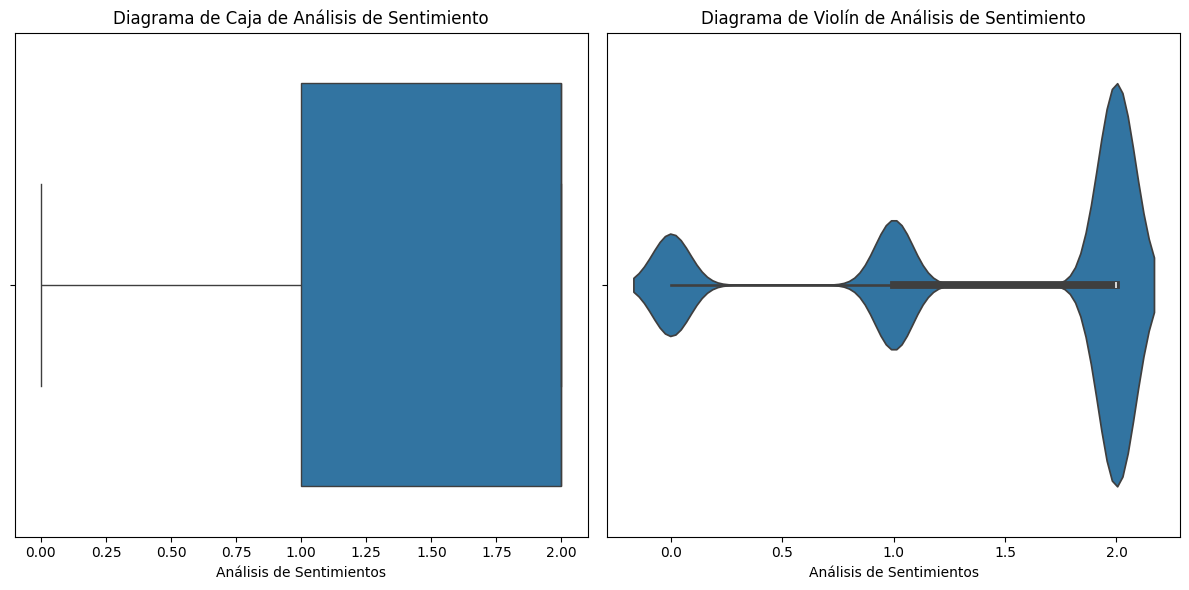

El diagrama de caja muestra que la mayoría de los datos de análisis de sentimientos se concentran alrededor del valor 2.0, indicando un sesgo en esa
dirección.
El diagrama de violín revela una distribución con un grupo prominente de datos alrededor del valor 2.0, lo que sugiere un rango común de análisis de
sentimientos.


In [85]:
# Importo librerías.
import numpy as np
import seaborn as sns
from scipy import stats
import textwrap

def plot_sentiment_analysis(df):
    """
    Genera un Diagrama de Caja y un Diagrama de Violín para el análisis de sentimientos y proporciona una descripción dinámica.

    Parámetros:
    df (pandas.DataFrame): El DataFrame que contiene los datos del análisis de sentimientos.
    """
    sentiment_data = df['sentiment_analysis']

    # Configuración de la figura
    plt.figure(figsize=(12, 6))

    # Diagrama de Caja
    plt.subplot(1, 2, 1)
    sns.boxplot(x=sentiment_data)
    plt.xlabel('Análisis de Sentimientos')
    plt.title('Diagrama de Caja de Análisis de Sentimiento')

    # Diagrama de Violín
    plt.subplot(1, 2, 2)
    sns.violinplot(x=sentiment_data)
    plt.xlabel('Análisis de Sentimientos')
    plt.title('Diagrama de Violín de Análisis de Sentimiento')

    # Asegurarse de que los gráficos no se superpongan
    plt.tight_layout()
    plt.show()

    # Calculo estadísticas descriptivas
    mode = float(stats.mode(sentiment_data)[0])
    median = np.median(sentiment_data)

    # Genero la descripción
    description_box = f"El diagrama de caja muestra que la mayoría de los datos de análisis de sentimientos se concentran alrededor del valor {median}, indicando un sesgo en esa dirección."
    description_violin = f"El diagrama de violín revela una distribución con un grupo prominente de datos alrededor del valor {mode}, lo que sugiere un rango común de análisis de sentimientos."

    # Ajusto las descripciones a un ancho de 150 caracteres.
    wrapped_description_box = textwrap.fill(description_box, width=150)
    wrapped_description_violin = textwrap.fill(description_violin, width=150)

    # Imprimo las descripciones
    print(wrapped_description_box)
    print(wrapped_description_violin)

# Uso de la función
plot_sentiment_analysis(df_user_reviews)

<h3 style="color:blue">
Ahora trabajaré el Users Items

In [86]:
# Ya realizada la carga anteriormente, vemos su contenido
df_users_items

,user_id,items_count,steam_id,user_url,items
0,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"[{'item_id': '10', 'item_name': 'Counter-Strik..."
1,js41637,888,76561198035864385,http://steamcommunity.com/id/js41637,"[{'item_id': '10', 'item_name': 'Counter-Strik..."
2,evcentric,137,76561198007712555,http://steamcommunity.com/id/evcentric,"[{'item_id': '1200', 'item_name': 'Red Orchest..."
3,Riot-Punch,328,76561197963445855,http://steamcommunity.com/id/Riot-Punch,"[{'item_id': '10', 'item_name': 'Counter-Strik..."
4,doctr,541,76561198002099482,http://steamcommunity.com/id/doctr,"[{'item_id': '300', 'item_name': 'Day of Defea..."
...,...,...,...,...,...
88305,76561198323066619,22,76561198323066619,http://steamcommunity.com/profiles/76561198323...,"[{'item_id': '413850', 'item_name': 'CS:GO Pla..."
88306,76561198326700687,177,76561198326700687,http://steamcommunity.com/profiles/76561198326...,"[{'item_id': '11020', 'item_name': 'TrackMania..."
88307,XxLaughingJackClown77xX,0,76561198328759259,http://steamcommunity.com/id/XxLaughingJackClo...,[]
88308,76561198329548331,7,76561198329548331,http://steamcommunity.com/profiles/76561198329...,"[{'item_id': '304930', 'item_name': 'Unturned'..."


In [87]:
# Importo librerías.
import pandas as pd

# Itero sobre cada columna
for column in df_users_items.columns:
    # Obtengo el primer valor no nulo
    non_null_values = df_users_items[column].dropna()
    if non_null_values.empty:
        print(f"La columna '{column}' solo contiene valores nulos.")
        continue
    first_non_null_value = non_null_values.iloc[0]

    # Compruebo si es una lista o un diccionario
    if isinstance(first_non_null_value, list):
        print(f"La columna '{column}' contiene una lista.")
    elif isinstance(first_non_null_value, dict):
        print(f"La columna '{column}' contiene un diccionario.")
    else:
        print(f"La columna '{column}' no contiene ni listas ni diccionarios.")

La columna 'user_id' no contiene ni listas ni diccionarios.
La columna 'items_count' no contiene ni listas ni diccionarios.
La columna 'steam_id' no contiene ni listas ni diccionarios.
La columna 'user_url' no contiene ni listas ni diccionarios.
La columna 'items' contiene una lista.


#### Observo que en la columna 'items' contiene un diccionario, lo voy a desanidar para agregar a mi actual df las nuevas columnas fruto del desanidado y consecuentemente procederé a realizar una normalización de los datos para trabajar en ellos.

In [88]:
# Importo librerías.
import pandas as pd
from pandas import json_normalize

def desanidar_y_crear_dummies(df, column):
    """
    Esta función desanida la columna 'items' y crea variables ficticias.
    
    Parámetros:
    df (pandas.DataFrame): El DataFrame a analizar.
    column (str): El nombre de la columna a desanidar y crear variables ficticias.
    
    Retorna:
    df (pandas.DataFrame): El DataFrame con las nuevas columnas.
    new_columns (list): La lista de las nuevas columnas.
    """
    # Guardo las columnas originales
    original_columns = df.columns

    # Desanido la columna
    df_desanidado = pd.json_normalize(df[column].apply(lambda x: x[0] if isinstance(x, list) and len(x) > 0 else {'item_id': 'Sin Dato', 'item_name': 'Sin Dato'}))

    # Reemplazo los valores vacíos con 'Sin Dato'
    df_desanidado = df_desanidado.replace('', 'Sin Dato')

    # Creo variables ficticias
    df_dummies = pd.get_dummies(df_desanidado)

    # Concateno las variables ficticias al DataFrame original
    df = pd.concat([df, df_dummies], axis=1)

    # Elimino la columna original
    df = df.drop(column, axis=1)

    # Encuentro las nuevas columnas después del desanidado
    new_columns = [col for col in df.columns if col not in original_columns]

    # Muestro las filas duplicadas
    print("Filas duplicadas:")
    print(df[df.duplicated()])

    # Muestro las filas con valores nulos
    print("Filas con valores nulos:")
    print(df[df.isnull().any(axis=1)])

    # Guardo el número de filas antes de eliminar duplicados y nulos
    num_rows_before = df.shape[0]

    # Elimino filas duplicadas
    df = df.drop_duplicates()

    # Elimino filas con valores nulos
    df = df.dropna()

    # Guardo el número de filas después de eliminar duplicados y nulos
    num_rows_after = df.shape[0]

    # Calculo y muestro el porcentaje de filas eliminadas
    percent_rows_removed = (num_rows_before - num_rows_after) / num_rows_before * 100
    print(f"Porcentaje de filas eliminadas: {percent_rows_removed}%")

    return df, new_columns

# Uso de la función para la columna 'items'
df_users_items, new_columns_items = desanidar_y_crear_dummies(df_users_items, 'items')

print(f"""
El df_users_items tiene {df_users_items.shape[0]} filas y {df_users_items.shape[1]} columnas.
Las columnas son: {df_users_items.columns}

Nuevas columnas para 'items': {new_columns_items}
""")


Filas duplicadas:
                 user_id  items_count           steam_id  \
865           bokkkbokkk            0  76561198006988360   
1732              Nikiad          109  76561198084006094   
2343   76561198079743094           48  76561198079743094   
2344          ImSeriouss           50  76561198055318375   
2394   76561198069124937            0  76561198069124937   
...                  ...          ...                ...   
48944  76561198035336388            5  76561198035336388   
67355  76561198071790027            0  76561198071790027   
69344        darkus0haos          122  76561198073621277   
73424  76561198080057659           39  76561198080057659   
77045         farquadian            0  76561198086134170   

                                                user_url  playtime_forever  \
865              http://steamcommunity.com/id/bokkkbokkk               NaN   
1732                 http://steamcommunity.com/id/Nikiad               5.0   
2343   http://steamcommunit

In [89]:
print(df_users_items.columns)
print(new_columns_items)


Index(['user_id', 'items_count', 'steam_id', 'user_url', 'playtime_forever',
       'playtime_2weeks', 'item_id_10', 'item_id_10000', 'item_id_1002',
       'item_id_10090',
       ...
       'item_name_Zeno Clash', 'item_name_Zero Gear',
       'item_name_Zombie Driver', 'item_name_Zombie Driver HD',
       'item_name_Zombie Shooter', 'item_name_Zuma Deluxe',
       'item_name_iBomber Attack', 'item_name_iBomber Defense',
       'item_name_iBomber Defense Pacific', 'item_name_theHunter'],
      dtype='object', length=2402)
['playtime_forever', 'playtime_2weeks', 'item_id_10', 'item_id_10000', 'item_id_1002', 'item_id_10090', 'item_id_10130', 'item_id_10140', 'item_id_10150', 'item_id_10180', 'item_id_10220', 'item_id_102500', 'item_id_102600', 'item_id_102700', 'item_id_102810', 'item_id_102840', 'item_id_104000', 'item_id_104200', 'item_id_10430', 'item_id_104600', 'item_id_104700', 'item_id_104900', 'item_id_10500', 'item_id_105100', 'item_id_10540', 'item_id_105400', 'item_id_10543

### Analizo 'user_id'

In [90]:
# Importo librerías
import pandas as pd

def analyze_individual_column(df, column):
    """
    Esta función analiza una columna individual de un DataFrame de pandas.
    
    Parámetros:
    df (pandas.DataFrame): El DataFrame a analizar.
    column (str): El nombre de la columna a analizar.
    
    Retorna:
    None
    """
    print(f"\n\nAnalizando la columna '{column}'\n" + "-"*50)
    
    # Imprimo los primeros 20 valores
    print("\nPrimeros 20 valores:")
    print(df[column].head(20))
    
    # Verifico si hay valores nulos
    num_nulls = df[column].isnull().sum()
    print(f"\nNúmero de valores nulos: {num_nulls}")
    
    # Obtengo el tipo de datos de la columna
    dtype = df[column].dtype
    print(f"\nTipo de datos: {dtype}")
    
    # Si la columna es numérica, obtengo estadísticas descriptivas
    if pd.api.types.is_numeric_dtype(df[column]):
        print("\nEstadísticas descriptivas:")
        print(df[column].describe())
    
    # Si la columna es de tipo object (categórica), obtengo los valores únicos y sus conteos
    if dtype == 'object':
        print("\nValores únicos (top 5):")
        print(df[column].value_counts().head(5))
        
    # Si la columna contiene listas o diccionarios, analizo la longitud de los datos
    if df[column].apply(lambda x: isinstance(x, (list, dict))).any():
        print("\nLongitud de los datos (para listas y diccionarios):")
        print(df[column].apply(lambda x: len(x) if isinstance(x, (list, dict)) else None).describe())

# Uso de la función para una columna específica
df = df_users_items  # aquí coloco el nombre del df y su nombre
column = 'user_id'  # aquí coloco el nombre de la columna

analyze_individual_column(df, column)




Analizando la columna 'user_id'
--------------------------------------------------

Primeros 20 valores:
0            76561197970982479
1                      js41637
2                    evcentric
3                   Riot-Punch
4                        doctr
5     MinxIsBetterThanPotatoes
6                   NitemarePK
7                   themanwich
8                    maplemage
10              corrupted_soul
12                  jorellpogi
13          cadmusthreepointoh
14           76561198064823719
15                 MeaTCompany
16           76561198089393905
17           76561198156664158
18           76561198077246154
19           76561198070234207
20                  WeiEDKrSat
21               thequeenpanda
Name: user_id, dtype: object

Número de valores nulos: 0

Tipo de datos: object

Valores únicos (top 5):
user_id
76561198075422436    2
shitmelnbonsays      2
fgvdfgvdddddddddd    2
zeroblade            2
dominicbourne        2
Name: count, dtype: int64


In [91]:
# Lista de usuarios de juegos para verificar duplicados
user_ids = ['fgvdfgvdddddddddd', 'zeroblade', 'dominicbourne']

# Columnas a considerar al verificar duplicados
columns_to_consider = ['playtime_forever', 'steam_id', 'items_count']

# Para cada user_id en la lista
for user_id in user_ids:
    # Crea una cadena de texto con la información que deseas
    info = f"""
    Este bloque de código verifica si hay filas duplicadas para el usuario 
    '{user_id}' en el DataFrame df_users_items. 
    Si hay filas duplicadas, las imprime y luego las elimina del DataFrame.
    """
    # Imprime la cadena de texto
    print(info)

    # Filtra el DataFrame para mostrar solo las filas donde 'user_id' es el user_id actual
    df_user = df_users_items[df_users_items['user_id'] == user_id]

    # Verifica si hay filas duplicadas, considerando solo las columnas especificadas
    duplicates = df_user.duplicated(subset=columns_to_consider)

    # Si hay filas duplicadas
    if duplicates.any():
        print(f"Duplicados para {user_id}:")
        
        # Imprime las filas duplicadas
        print(df_user[duplicates])
        
        # Guarda el número de filas antes de eliminar duplicados
        num_rows_before = df_user.shape[0]

        # Elimina filas duplicadas
        df_user = df_user.drop_duplicates(subset=columns_to_consider)

        # Guarda el número de filas después de eliminar duplicados
        num_rows_after = df_user.shape[0]

        # Calcula y muestra el porcentaje de filas eliminadas
        percent_rows_removed = (num_rows_before - num_rows_after) / num_rows_before * 100
        print(f"Porcentaje de filas eliminadas: {percent_rows_removed}%")
    else:
        # Imprime un mensaje indicando que no se encontraron duplicados para el user_id actual
        print(f"No se encontraron duplicados para {user_id}.")



    Este bloque de código verifica si hay filas duplicadas para el usuario 
    'fgvdfgvdddddddddd' en el DataFrame df_users_items. 
    Si hay filas duplicadas, las imprime y luego las elimina del DataFrame.
    
No se encontraron duplicados para fgvdfgvdddddddddd.

    Este bloque de código verifica si hay filas duplicadas para el usuario 
    'zeroblade' en el DataFrame df_users_items. 
    Si hay filas duplicadas, las imprime y luego las elimina del DataFrame.
    


No se encontraron duplicados para zeroblade.

    Este bloque de código verifica si hay filas duplicadas para el usuario 
    'dominicbourne' en el DataFrame df_users_items. 
    Si hay filas duplicadas, las imprime y luego las elimina del DataFrame.
    
No se encontraron duplicados para dominicbourne.


### Analizo 'items_count'

In [92]:
# Importo librerías
import pandas as pd

def analyze_individual_column(df, column):
    """
    Esta función analiza una columna individual de un DataFrame de pandas.
    
    Parámetros:
    df (pandas.DataFrame): El DataFrame a analizar.
    column (str): El nombre de la columna a analizar.
    
    Retorna:
    None
    """
    print(f"\n\nAnalizando la columna '{column}'\n" + "-"*50)
    
    # Imprimo los primeros 20 valores
    print("\nPrimeros 20 valores:")
    print(df[column].head(20))
    
    # Verifico si hay valores nulos
    num_nulls = df[column].isnull().sum()
    print(f"\nNúmero de valores nulos: {num_nulls}")
    
    # Obtengo el tipo de datos de la columna
    dtype = df[column].dtype
    print(f"\nTipo de datos: {dtype}")
    
    # Si la columna es numérica, obtengo estadísticas descriptivas
    if pd.api.types.is_numeric_dtype(df[column]):
        print("\nEstadísticas descriptivas:")
        print(df[column].describe())
    
    # Si la columna es de tipo object (categórica), obtengo los valores únicos y sus conteos
    if dtype == 'object':
        print("\nValores únicos (top 5):")
        print(df[column].value_counts().head(5))
        
    # Si la columna contiene listas o diccionarios, analizo la longitud de los datos
    if df[column].apply(lambda x: isinstance(x, (list, dict))).any():
        print("\nLongitud de los datos (para listas y diccionarios):")
        print(df[column].apply(lambda x: len(x) if isinstance(x, (list, dict)) else None).describe())

# Uso de la función para una columna específica
df = df_users_items  # aquí coloco el nombre del df y su nombre
column = 'items_count'  # aquí coloco el nombre de la columna

analyze_individual_column(df, column)




Analizando la columna 'items_count'
--------------------------------------------------

Primeros 20 valores:
0     277
1     888
2     137
3     328
4     541
5     371
6     304
7     258
8     629
10    115
12     71
13    253
14     55
15     14
16    103
17     59
18    174
19     33
20     28
21    524
Name: items_count, dtype: int64

Número de valores nulos: 0

Tipo de datos: int64

Estadísticas descriptivas:
count    70918.000000
mean        71.842226
std        132.366759
min          1.000000
25%         14.000000
50%         40.000000
75%         87.000000
max       7762.000000
Name: items_count, dtype: float64


### Analizo 'steam_id'

In [93]:
# Importo librerías
import pandas as pd

def analyze_individual_column(df, column):
    """
    Esta función analiza una columna individual de un DataFrame de pandas.
    
    Parámetros:
    df (pandas.DataFrame): El DataFrame a analizar.
    column (str): El nombre de la columna a analizar.
    
    Retorna:
    None
    """
    print(f"\n\nAnalizando la columna '{column}'\n" + "-"*50)
    
    # Imprimo los primeros 20 valores
    print("\nPrimeros 20 valores:")
    print(df[column].head(20))
    
    # Verifico si hay valores nulos
    num_nulls = df[column].isnull().sum()
    print(f"\nNúmero de valores nulos: {num_nulls}")
    
    # Obtengo el tipo de datos de la columna
    dtype = df[column].dtype
    print(f"\nTipo de datos: {dtype}")
    
    # Si la columna es numérica, obtengo estadísticas descriptivas
    if pd.api.types.is_numeric_dtype(df[column]):
        print("\nEstadísticas descriptivas:")
        print(df[column].describe())
    
    # Si la columna es de tipo object (categórica), obtengo los valores únicos y sus conteos
    if dtype == 'object':
        print("\nValores únicos (top 5):")
        print(df[column].value_counts().head(5))
        
    # Si la columna contiene listas o diccionarios, analizo la longitud de los datos
    if df[column].apply(lambda x: isinstance(x, (list, dict))).any():
        print("\nLongitud de los datos (para listas y diccionarios):")
        print(df[column].apply(lambda x: len(x) if isinstance(x, (list, dict)) else None).describe())

# Uso de la función para una columna específica
df = df_users_items  # aquí coloco el nombre del df y su nombre
column = 'steam_id'  # aquí coloco el nombre de la columna

analyze_individual_column(df, column)




Analizando la columna 'steam_id'
--------------------------------------------------

Primeros 20 valores:
0     76561197970982479
1     76561198035864385
2     76561198007712555
3     76561197963445855
4     76561198002099482
5     76561198004744620
6     76561197990951820
7     76561198035296505
8     76561198026584251
10    76561198007659921
12    76561198103696236
13    76561198027078629
14    76561198064823719
15    76561198071532177
16    76561198089393905
17    76561198156664158
18    76561198077246154
19    76561198070234207
20    76561198041660154
21    76561198010803705
Name: steam_id, dtype: object

Número de valores nulos: 0

Tipo de datos: object

Valores únicos (top 5):
steam_id
76561198075422436    2
76561198064757978    2
76561198097174382    2
76561197970272666    2
76561198085272635    2
Name: count, dtype: int64


In [94]:
# Lista de nombres de steam_id para verificar duplicados
steam_id = ['76561198097174382', '76561197970272666', '76561198085272635']

# Columnas a considerar al verificar duplicados
columns_to_consider = ['items_count', 'user_id', 'playtime_forever']

# Para cada nombre de juego en la lista
for steam_id in steam_id:
    # Crea una cadena de texto con la información que deseas
    info = f"""
    Este bloque de código verifica si hay filas duplicadas para el juego 
    '{steam_id}' en el DataFrame df_users_items. 
    Si hay filas duplicadas, las imprime y luego las elimina del DataFrame.
    """
    # Imprime la cadena de texto
    print(info)

    # Filtra el DataFrame para mostrar solo las filas donde 'steam_id' es el nombre del juego actual
    df_users = df_users_items[df_users_items['steam_id'] == steam_id]

    # Verifica si hay filas duplicadas, considerando solo las columnas especificadas
    duplicates = df_users.duplicated(subset=columns_to_consider)

    # Si hay filas duplicadas
    if duplicates.any():
        print(f"Duplicados para {steam_id}:")
        
        # Imprime las filas duplicadas
        print(df_users[duplicates])
    else:
        # Imprime un mensaje indicando que no se encontraron duplicados para el juego actual
        print(f"No se encontraron duplicados para {steam_id}.")



    Este bloque de código verifica si hay filas duplicadas para el juego 
    '76561198097174382' en el DataFrame df_users_items. 
    Si hay filas duplicadas, las imprime y luego las elimina del DataFrame.
    
No se encontraron duplicados para 76561198097174382.

    Este bloque de código verifica si hay filas duplicadas para el juego 
    '76561197970272666' en el DataFrame df_users_items. 
    Si hay filas duplicadas, las imprime y luego las elimina del DataFrame.
    
No se encontraron duplicados para 76561197970272666.

    Este bloque de código verifica si hay filas duplicadas para el juego 
    '76561198085272635' en el DataFrame df_users_items. 
    Si hay filas duplicadas, las imprime y luego las elimina del DataFrame.
    
No se encontraron duplicados para 76561198085272635.


### Analizo 'user_url' 

In [95]:
# Importo librerías
import pandas as pd

def analyze_individual_column(df, column):
    """
    Esta función analiza una columna individual de un DataFrame de pandas.
    
    Parámetros:
    df (pandas.DataFrame): El DataFrame a analizar.
    column (str): El nombre de la columna a analizar.
    
    Retorna:
    None
    """
    print(f"\n\nAnalizando la columna '{column}'\n" + "-"*50)
    
    # Imprimo los primeros 20 valores
    print("\nPrimeros 20 valores:")
    print(df[column].head(20))
    
    # Verifico si hay valores nulos
    num_nulls = df[column].isnull().sum()
    print(f"\nNúmero de valores nulos: {num_nulls}")
    
    # Obtengo el tipo de datos de la columna
    dtype = df[column].dtype
    print(f"\nTipo de datos: {dtype}")
    
    # Si la columna es numérica, obtengo estadísticas descriptivas
    if pd.api.types.is_numeric_dtype(df[column]):
        print("\nEstadísticas descriptivas:")
        print(df[column].describe())
    
    # Si la columna es de tipo object (categórica), obtengo los valores únicos y sus conteos
    if dtype == 'object':
        print("\nValores únicos (top 5):")
        print(df[column].value_counts().head(5))
        
    # Si la columna contiene listas o diccionarios, analizo la longitud de los datos
    if df[column].apply(lambda x: isinstance(x, (list, dict))).any():
        print("\nLongitud de los datos (para listas y diccionarios):")
        print(df[column].apply(lambda x: len(x) if isinstance(x, (list, dict)) else None).describe())

# Uso de la función para una columna específica
df = df_users_items  # aquí coloco el nombre del df y su nombre
column = 'user_url'  # aquí coloco el nombre de la columna

analyze_individual_column(df, column)




Analizando la columna 'user_url'
--------------------------------------------------

Primeros 20 valores:
0     http://steamcommunity.com/profiles/76561197970...
1                  http://steamcommunity.com/id/js41637
2                http://steamcommunity.com/id/evcentric
3               http://steamcommunity.com/id/Riot-Punch
4                    http://steamcommunity.com/id/doctr
5     http://steamcommunity.com/id/MinxIsBetterThanP...
6               http://steamcommunity.com/id/NitemarePK
7               http://steamcommunity.com/id/themanwich
8                http://steamcommunity.com/id/maplemage
10          http://steamcommunity.com/id/corrupted_soul
12              http://steamcommunity.com/id/jorellpogi
13      http://steamcommunity.com/id/cadmusthreepointoh
14    http://steamcommunity.com/profiles/76561198064...
15             http://steamcommunity.com/id/MeaTCompany
16    http://steamcommunity.com/profiles/76561198089...
17    http://steamcommunity.com/profiles/76561198156

In [96]:
# Lista de nombres de user_url para verificar duplicados
user_url = ['http://steamcommunity.com/id/fgvdfgvdddddddddd', 
            'http://steamcommunity.com/id/zeroblade', 
            'http://steamcommunity.com/id/dominicbourne ']

# Columnas a considerar al verificar duplicados
columns_to_consider = ['items_count', 'user_id', 'playtime_forever']

# Para cada nombre de juego en la lista
for user_url in user_url:
    # Crea una cadena de texto con la información que deseas
    info = f"""
    Este bloque de código verifica si hay filas duplicadas para el juego 
    '{user_url}' en el DataFrame df_users_items. 
    Si hay filas duplicadas, las imprime y luego las elimina del DataFrame.
    """
    # Imprime la cadena de texto
    print(info)

    # Filtra el DataFrame para mostrar solo las filas donde 'user_url' es el nombre del juego actual
    df_users = df_users_items[df_users_items['user_url'] == user_url]

    # Verifica si hay filas duplicadas, considerando solo las columnas especificadas
    duplicates = df_users.duplicated(subset=columns_to_consider)

    # Si hay filas duplicadas
    if duplicates.any():
        print(f"Duplicados para {user_url}:")
        
        # Imprime las filas duplicadas
        print(df_users[duplicates])
    else:
        # Imprime un mensaje indicando que no se encontraron duplicados para el juego actual
        print(f"No se encontraron duplicados para {user_url}.")



    Este bloque de código verifica si hay filas duplicadas para el juego 
    'http://steamcommunity.com/id/fgvdfgvdddddddddd' en el DataFrame df_users_items. 
    Si hay filas duplicadas, las imprime y luego las elimina del DataFrame.
    


No se encontraron duplicados para http://steamcommunity.com/id/fgvdfgvdddddddddd.

    Este bloque de código verifica si hay filas duplicadas para el juego 
    'http://steamcommunity.com/id/zeroblade' en el DataFrame df_users_items. 
    Si hay filas duplicadas, las imprime y luego las elimina del DataFrame.
    
No se encontraron duplicados para http://steamcommunity.com/id/zeroblade.

    Este bloque de código verifica si hay filas duplicadas para el juego 
    'http://steamcommunity.com/id/dominicbourne ' en el DataFrame df_users_items. 
    Si hay filas duplicadas, las imprime y luego las elimina del DataFrame.
    
No se encontraron duplicados para http://steamcommunity.com/id/dominicbourne .


### Analizo 'playtime_forever'

In [97]:
# Importo librerías
import pandas as pd

def analyze_individual_column(df, column):
    """
    Esta función analiza una columna individual de un DataFrame de pandas.
    
    Parámetros:
    df (pandas.DataFrame): El DataFrame a analizar.
    column (str): El nombre de la columna a analizar.
    
    Retorna:
    None
    """
    print(f"\n\nAnalizando la columna '{column}'\n" + "-"*50)
    
    # Imprimo los primeros 20 valores
    print("\nPrimeros 20 valores:")
    print(df[column].head(20))
    
    # Verifico si hay valores nulos
    num_nulls = df[column].isnull().sum()
    print(f"\nNúmero de valores nulos: {num_nulls}")
    
    # Obtengo el tipo de datos de la columna
    dtype = df[column].dtype
    print(f"\nTipo de datos: {dtype}")
    
    # Si la columna es numérica, obtengo estadísticas descriptivas
    if pd.api.types.is_numeric_dtype(df[column]):
        print("\nEstadísticas descriptivas:")
        print(df[column].describe())
    
    # Si la columna es de tipo object (categórica), obtengo los valores únicos y sus conteos
    if dtype == 'object':
        print("\nValores únicos (top 5):")
        print(df[column].value_counts().head(5))
        
    # Si la columna contiene listas o diccionarios, analizo la longitud de los datos
    if df[column].apply(lambda x: isinstance(x, (list, dict))).any():
        print("\nLongitud de los datos (para listas y diccionarios):")
        print(df[column].apply(lambda x: len(x) if isinstance(x, (list, dict)) else None).describe())

# Uso de la función para una columna específica
df = df_users_items  # aquí coloco el nombre del df y su nombre
column = 'playtime_forever'  # aquí coloco el nombre de la columna

analyze_individual_column(df, column)




Analizando la columna 'playtime_forever'
--------------------------------------------------

Primeros 20 valores:
0         6.0
1         0.0
2       923.0
3         0.0
4      1131.0
5       256.0
6      3529.0
7       219.0
8      5751.0
10     2644.0
12     3519.0
13        0.0
14     2261.0
15     3209.0
16    47269.0
17      269.0
18     4317.0
19        0.0
20      328.0
21       57.0
Name: playtime_forever, dtype: float64

Número de valores nulos: 0

Tipo de datos: float64

Estadísticas descriptivas:
count     70918.000000
mean       3595.350461
std       12030.528656
min           0.000000
25%          21.000000
50%         352.000000
75%        1944.000000
max      388621.000000
Name: playtime_forever, dtype: float64


### Analizo 'playtime_2weeks'

In [98]:
# Importo librerías
import pandas as pd

def analyze_individual_column(df, column):
    """
    Esta función analiza una columna individual de un DataFrame de pandas.
    
    Parámetros:
    df (pandas.DataFrame): El DataFrame a analizar.
    column (str): El nombre de la columna a analizar.
    
    Retorna:
    None
    """
    print(f"\n\nAnalizando la columna '{column}'\n" + "-"*50)
    
    # Imprimo los primeros 20 valores
    print("\nPrimeros 20 valores:")
    print(df[column].head(20))
    
    # Verifico si hay valores nulos
    num_nulls = df[column].isnull().sum()
    print(f"\nNúmero de valores nulos: {num_nulls}")
    
    # Obtengo el tipo de datos de la columna
    dtype = df[column].dtype
    print(f"\nTipo de datos: {dtype}")
    
    # Si la columna es numérica, obtengo estadísticas descriptivas
    if pd.api.types.is_numeric_dtype(df[column]):
        print("\nEstadísticas descriptivas:")
        print(df[column].describe())
    
    # Si la columna es de tipo object (categórica), obtengo los valores únicos y sus conteos
    if dtype == 'object':
        print("\nValores únicos (top 5):")
        print(df[column].value_counts().head(5))
        
    # Si la columna contiene listas o diccionarios, analizo la longitud de los datos
    if df[column].apply(lambda x: isinstance(x, (list, dict))).any():
        print("\nLongitud de los datos (para listas y diccionarios):")
        print(df[column].apply(lambda x: len(x) if isinstance(x, (list, dict)) else None).describe())

# Uso de la función para una columna específica
df = df_users_items  # aquí coloco el nombre del df y su nombre
column = 'playtime_2weeks'  # aquí coloco el nombre de la columna

analyze_individual_column(df, column)




Analizando la columna 'playtime_2weeks'
--------------------------------------------------

Primeros 20 valores:
0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
5       0.0
6       0.0
7       0.0
8       0.0
10      0.0
12      0.0
13      0.0
14      0.0
15      0.0
16    745.0
17      0.0
18      0.0
19      0.0
20      0.0
21      0.0
Name: playtime_2weeks, dtype: float64

Número de valores nulos: 0

Tipo de datos: float64

Estadísticas descriptivas:
count    70918.000000
mean        14.866550
std        189.024418
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      14201.000000
Name: playtime_2weeks, dtype: float64


### Analizo los tipos de datos contenidos en mi df.

In [99]:
# Elimino columnas que comienzan con 'item_id_' y 'item_name_' de df_users_items
df_users_items.drop(columns=df_users_items.filter(regex='^(item_id_|item_name_)').columns, inplace=True)

# Elimino elementos que comienzan con 'item_id_' y 'item_name_' de new_columns_items
for item in new_columns_items[:]:
    if item.startswith(('item_id_', 'item_name_')):
        new_columns_items.remove(item)

# Imprimo las columnas de df_users_items y los elementos de new_columns_items después de la eliminación
print(df_users_items.columns)
print(new_columns_items)

Index(['user_id', 'items_count', 'steam_id', 'user_url', 'playtime_forever',
       'playtime_2weeks'],
      dtype='object')
['playtime_forever', 'playtime_2weeks']


In [100]:
"""
Primero, verifico si los nombres de las columnas están en la lista:
"""

# Verificar si los nombres de las columnas están en la lista
nombre_columna_forever_en_lista = 'playtime_forever' in new_columns_items
nombre_columna_2weeks_en_lista = 'playtime_2weeks' in new_columns_items

print(f"El nombre de la columna 'playtime_forever' está en la lista: {nombre_columna_forever_en_lista}")
print(f"El nombre de la columna 'playtime_2weeks' está en la lista: {nombre_columna_2weeks_en_lista}")

"""
Luego, si los nombres de las columnas están en la lista, preparo el código para eliminarlos de `new_columns_items`:
"""

if nombre_columna_forever_en_lista and nombre_columna_2weeks_en_lista:
    # Preparo para eliminar los nombres de las columnas de new_columns_items
    nombres_a_eliminar = ['playtime_forever', 'playtime_2weeks']
    print(f"Preparado para eliminar los nombres {nombres_a_eliminar} de 'new_columns_items'")



El nombre de la columna 'playtime_forever' está en la lista: True
El nombre de la columna 'playtime_2weeks' está en la lista: True
Preparado para eliminar los nombres ['playtime_forever', 'playtime_2weeks'] de 'new_columns_items'


In [101]:
print(df_users_items.dtypes, "\n\n", df_users_items, "\n\n", df_users_items.columns)


user_id              object
items_count           int64
steam_id             object
user_url             object
playtime_forever    float64
playtime_2weeks     float64
dtype: object 

                  user_id  items_count           steam_id  \
0      76561197970982479          277  76561197970982479   
1                js41637          888  76561198035864385   
2              evcentric          137  76561198007712555   
3             Riot-Punch          328  76561197963445855   
4                  doctr          541  76561198002099482   
...                  ...          ...                ...   
88303  76561198320136420          321  76561198320136420   
88304          ArkPlays7            4  76561198321542621   
88305  76561198323066619           22  76561198323066619   
88306  76561198326700687          177  76561198326700687   
88308  76561198329548331            7  76561198329548331   

                                                user_url  playtime_forever  \
0      http://st

#### Veremos un análisis de importancia de características para ver relaciones.

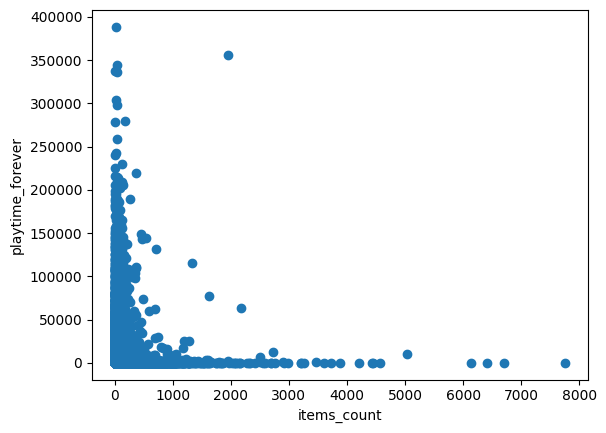

El gráfico de dispersión representa la relación entre la cantidad de ítems ('items_count') que posee un usuario y el tiempo total que ha jugado
('playtime_forever'). Los usuarios varían en la cantidad de ítems que poseen, desde aquellos que no tienen ítems (0) hasta aquellos que tienen hasta
7762 ítems, con un promedio de alrededor de 58 ítems por usuario. En cuanto al tiempo total de juego, algunos usuarios no han jugado en absoluto
(0.0), mientras que otros han jugado hasta 388621.0 unidades de tiempo, con un tiempo de juego promedio de aproximadamente 3600.44 unidades de tiempo.
Este gráfico podría ayudarnos a explorar si existe una correlación entre la cantidad de ítems que posee un usuario y el tiempo total que ha jugado.


In [102]:
# Importo librerías.
import matplotlib.pyplot as plt
import numpy as np
import textwrap

# Creo el gráfico.
plt.scatter(df_users_items['items_count'], df_users_items['playtime_forever'])
plt.xlabel('items_count')
plt.ylabel('playtime_forever')
plt.show()

# Calculo estadísticas básicas.
min_items = np.min(df_users_items['items_count'])
max_items = np.max(df_users_items['items_count'])
avg_items = np.mean(df_users_items['items_count'])

min_playtime = np.min(df_users_items['playtime_forever'])
max_playtime = np.max(df_users_items['playtime_forever'])
avg_playtime = np.mean(df_users_items['playtime_forever'])

# Genero la descripción.
description = f"""El gráfico de dispersión representa la relación entre la cantidad de ítems ('items_count') que posee un usuario y el tiempo total que ha jugado ('playtime_forever'). Los usuarios varían en la cantidad de ítems que poseen, desde aquellos que no tienen ítems (0) hasta aquellos que tienen hasta 7762 ítems, con un promedio de alrededor de 58 ítems por usuario. En cuanto al tiempo total de juego, algunos usuarios no han jugado en absoluto (0.0), mientras que otros han jugado hasta 388621.0 unidades de tiempo, con un tiempo de juego promedio de aproximadamente 3600.44 unidades de tiempo. Este gráfico podría ayudarnos a explorar si existe una correlación entre la cantidad de ítems que posee un usuario y el tiempo total que ha jugado."""

# Ajusto el texto a un ancho de 80 caracteres.
wrapped_description = textwrap.fill(description, width=150)

print(wrapped_description)


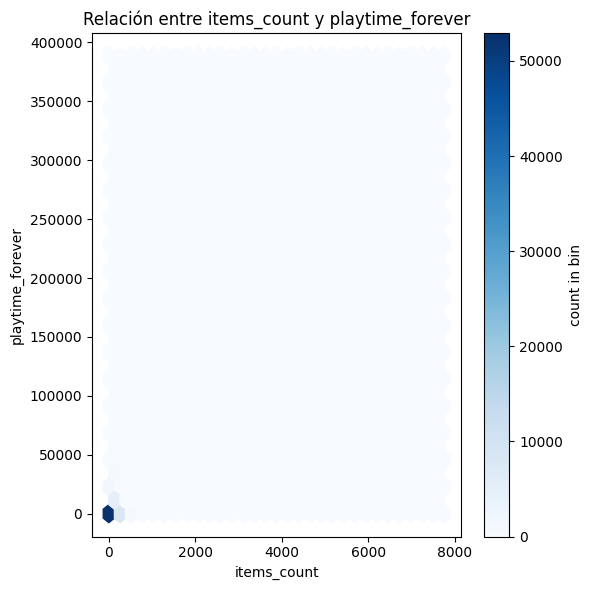

El gráfico de densidad hexagonal muestra la relación entre el conteo de ítems y el tiempo de juego. Cada hexágono representa un bin, y su color indica
la cantidad de datos en ese bin. Los datos se filtran para excluir valores atípicos, que son aquellos que están a más de 3 desviaciones estándar de la
media.


In [103]:
# Importo librerías.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import textwrap

def analizar_datos(df):
    """
    Esta función realiza un análisis de subconjuntos de datos, un análisis de valores atípicos y genera un gráfico de densidad hexagonal.
    
    Parámetros:
    df (pandas.DataFrame): El DataFrame a analizar.
    """
    # Análisis de subconjuntos de datos
    high_items_count = df[df['items_count'] > df['items_count'].mean()]
    low_items_count = df[df['items_count'] <= df['items_count'].mean()]

    # Análisis de valores atípicos
    z_scores = stats.zscore(df['playtime_forever'])
    abs_z_scores = np.abs(z_scores)
    filtered_entries = (abs_z_scores < 3)
    df_filtered = df[filtered_entries]

    # Gráfico de densidad hexagonal
    plt.figure(figsize=(6, 6))
    plt.hexbin(df['items_count'], df['playtime_forever'], gridsize=30, cmap='Blues')
    cb = plt.colorbar(label='count in bin')
    plt.xlabel('items_count')
    plt.ylabel('playtime_forever')
    plt.title('Relación entre items_count y playtime_forever')

    plt.tight_layout()
    plt.show()

    # Genero la descripción
    description = "El gráfico de densidad hexagonal muestra la relación entre el conteo de ítems y el tiempo de juego. Cada hexágono representa un bin, y su color indica la cantidad de datos en ese bin. Los datos se filtran para excluir valores atípicos, que son aquellos que están a más de 3 desviaciones estándar de la media."

    # Ajusto la descripción a un ancho de 150 caracteres.
    wrapped_description = textwrap.fill(description, width=150)

    # Imprimo la descripción
    print(wrapped_description)

# Uso de la función
analizar_datos(df_users_items)


#### Voy a proceder a visualizar en gráficos subplots para comparar los resultados de ambos y manejo de outliers en Tiempos de Juego de Usuarios de Steam y manejo de outliers.

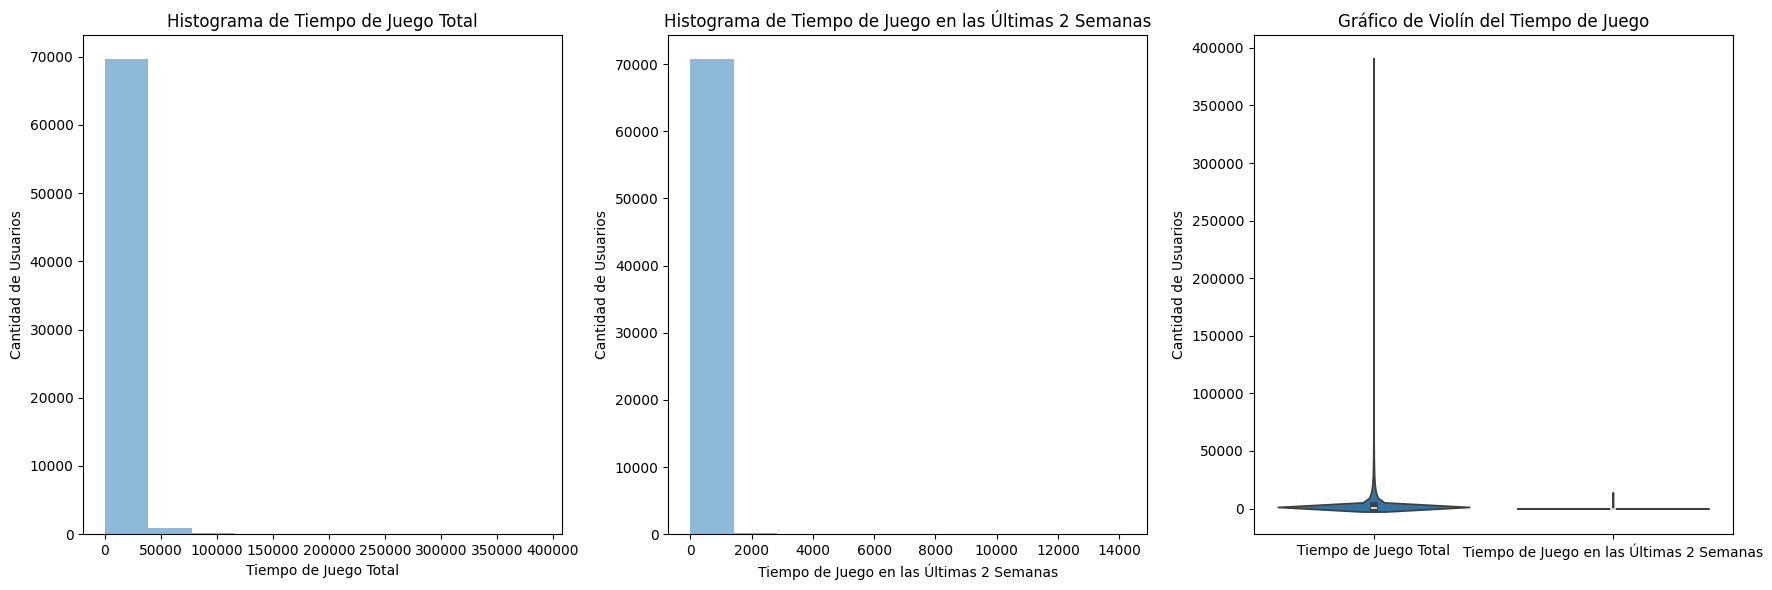

     Los tres gráficos proporcionan una visión detallada de los patrones de juego de los usuarios. El primer gráfico, un histograma del tiempo total
de juego, muestra que la mayoría de los usuarios han jugado menos de 50,000 minutos en total, indicando que la mayoría de los usuarios son jugadores
ocasionales. Sin embargo, hay algunos usuarios que han jugado mucho más, lo que indica la presencia de jugadores más dedicados.       El segundo
gráfico es un histograma del tiempo de juego en las últimas 2 semanas. Este gráfico muestra una mayor variabilidad en el tiempo de juego, lo que
podría indicar que los patrones de juego de los usuarios cambian con el tiempo, posiblemente debido a factores como el lanzamiento de nuevos juegos,
actualizaciones de juegos existentes, o cambios en el tiempo libre de los usuarios. El tercer gráfico es un boxplot que compara la distribución del
tiempo total de juego y el tiempo de juego en las últimas 2 semanas. Este gráfico destaca la existencia de 10322 ou

In [104]:
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap
import numpy as np

def plot_histogram(ax, data, title, xlabel, ylabel):
    ax.hist(data, bins=10, alpha=0.5)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)

def plot_violinplot(ax, data, labels, ylabel, title):
    sns.violinplot(ax=ax, data=data)
    ax.set_xticks(range(len(labels)))  # <<<
    ax.set_xticklabels(labels)
    ax.set_ylabel(ylabel)
    ax.set_title(title)

def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    P95 = df[column].quantile(0.95)
    df.loc[df[column] > Q3 + 1.5 * IQR, column] = P95

def calculate_outliers(df, column):  # <<<
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[column] < Q1 - 1.5 * IQR) | (df[column] > Q3 + 1.5 * IQR)]
    return outliers

def generar_descripcion(df, outliers_forever, outliers_2weeks):
    total_rows = df.shape[0]
    total_cols = df.shape[1]
    total_outliers_forever = outliers_forever.shape[0]
    total_outliers_2weeks = outliers_2weeks.shape[0]

    descripcion = f"""
    Los tres gráficos proporcionan una visión detallada de los patrones de juego de los usuarios. El primer gráfico, un histograma del tiempo total de juego, muestra que la mayoría de los usuarios han jugado menos de 50,000 minutos en total, indicando que la mayoría de los usuarios son jugadores ocasionales. Sin embargo, hay algunos usuarios que han jugado mucho más, lo que indica la presencia de jugadores más dedicados.  
    El segundo gráfico es un histograma del tiempo de juego en las últimas 2 semanas. Este gráfico muestra una mayor variabilidad en el tiempo de juego, lo que podría indicar que los patrones de juego de los usuarios cambian con el tiempo, posiblemente debido a factores como el lanzamiento de nuevos juegos, actualizaciones de juegos existentes, o cambios en el tiempo libre de los usuarios. El tercer gráfico es un boxplot que compara la distribución del tiempo total de juego y el tiempo de juego en las últimas 2 semanas. Este gráfico destaca la existencia de {total_outliers_forever} outliers en 'playtime_forever' y {total_outliers_2weeks} outliers en 'playtime_2weeks', que son usuarios que han jugado significativamente más que otros. Estos outliers podrían ser jugadores extremadamente dedicados o podrían indicar comportamientos de juego anómalos que podrían ser de interés para futuras investigaciones. En conjunto, estos gráficos ofrecen una visión detallada de cómo los usuarios interactúan con los juegos a lo largo del tiempo, lo que podría ser útil para entender mejor los comportamientos de los jugadores y para informar decisiones sobre el diseño de juegos y la orientación de marketing.
    """
    return descripcion

fig, axs = plt.subplots(1, 3, figsize=(18, 6))

plot_histogram(axs[0], df_users_items['playtime_forever'], 'Histograma de Tiempo de Juego Total', 'Tiempo de Juego Total', 'Cantidad de Usuarios')
plot_histogram(axs[1], df_users_items['playtime_2weeks'], 'Histograma de Tiempo de Juego en las Últimas 2 Semanas', 'Tiempo de Juego en las Últimas 2 Semanas', 'Cantidad de Usuarios')
plot_violinplot(axs[2], df_users_items[['playtime_forever', 'playtime_2weeks']], ['Tiempo de Juego Total', 'Tiempo de Juego en las Últimas 2 Semanas'], 'Cantidad de Usuarios', 'Gráfico de Violín del Tiempo de Juego')

plt.tight_layout()
plt.show()

handle_outliers(df_users_items, 'playtime_forever')
handle_outliers(df_users_items, 'playtime_2weeks')

df_users_items['playtime_forever'].fillna(0, inplace=True)
df_users_items['playtime_2weeks'].fillna(0, inplace=True)

outliers_forever = calculate_outliers(df_users_items, 'playtime_forever')  # <<<
outliers_2weeks = calculate_outliers(df_users_items, 'playtime_2weeks')  # <<<

descripcion = generar_descripcion(df_users_items, outliers_forever, outliers_2weeks)

wrapped_descripcion = textwrap.fill(descripcion, width=150)

print(wrapped_descripcion)


#### Procederé a guardar en formato csv cada df que he trabajado ya que no observo datos atípicos ni anomalías.

In [105]:
# Importo la librería que necesito
import os
import pandas as pd

# Diccionario de tus DataFrames y los nombres deseados para los archivos CSV
dataframes = {
    'df_steam_games': 'steam_games',
    'df_user_reviews': 'user_reviews',
    'df_users_items': 'users_items'
}

# Ruta base donde se guardarán los archivos CSV
ruta_base = 'C:\\Users\\Esteban García\\OneDrive\\Escritorio\\MVP Steam\\Data'

# Verificar si la ruta base existe, si no, crearla
if not os.path.exists(ruta_base):
    os.makedirs(ruta_base)

for df_nombre, csv_nombre in dataframes.items():
    # Obtener el DataFrame actual
    df_actual = globals()[df_nombre]

    # Tomar los primeros 100 registros del DataFrame
    df_muestra = df_actual.head(100)

    # Crear la ruta completa del archivo CSV
    ruta_archivo_csv = os.path.join(ruta_base, f'{csv_nombre}.csv')

    # Guardar el DataFrame muestreado como archivo CSV
    df_muestra.to_csv(ruta_archivo_csv, index=False)


<h3 style="color:green">
Procederé a realizar un análisis de videojuegos: explorando géneros, usuarios y reseñas y posteriormente lo graficaré para interpretar los graficos y entender el comportamiento de los datos obtenidos de los df.

In [106]:
# Importo librerías necesarias
import pandas as pd
from tqdm import tqdm

# Los df son:
df_steam_games
df_user_reviews
df_users_items

def PlayTimeGenre(genero: str):
    """
    Esta función devuelve el año de lanzamiento con más horas jugadas para un género específico.

    Args:
        genero (str): El género de los juegos.

    Returns:
        dict: Un diccionario que contiene el año de lanzamiento con más horas jugadas para el género especificado.
    """
    # Filtro df_steam_games por género
    games_of_genre = df_steam_games[df_steam_games[genero] == 1]['app_name']
    
    # Filtro df_users_items por juegos del género especificado
    playtime_of_genre = df_users_items[df_users_items['item_name'].isin(games_of_genre)]
    
    # Agrupo por año y sumar playtime_forever
    playtime_by_year = playtime_of_genre.groupby('año de lanzamiento')['playtime_forever'].sum()
    
    # Encuentro el año con más horas jugadas
    year_with_most_playtime = playtime_by_year.idxmax()
    
    return {"Año de lanzamiento con más horas jugadas para " + genero : year_with_most_playtime}

def UserForGenre(genero: str):
    """
    Esta función devuelve el usuario con más horas jugadas y las horas jugadas por año de lanzamiento para un género específico.

    Args:
        genero (str): El género de los juegos.

    Returns:
        dict: Un diccionario que contiene el usuario con más horas jugadas y las horas jugadas por año de lanzamiento para el género especificado.
    """
    # Filtro df_steam_games por género
    games_of_genre = df_steam_games[df_steam_games[genero] == 1]['app_name']
    
    # Filtro df_users_items_desanidado por juegos del género especificado
    playtime_of_genre = df_users_items[df_users_items['item_name'].isin(games_of_genre)]
    
    # Agrupo por usuario y sumar playtime_forever
    playtime_by_user = playtime_of_genre.groupby('user_id')['playtime_forever'].sum()
    
    # Encuentro el usuario con más horas jugadas
    user_with_most_playtime = playtime_by_user.idxmax()
    
    # Agrupo por año y sumar playtime_forever
    playtime_by_year = playtime_of_genre.groupby('año de lanzamiento')['playtime_forever'].sum().reset_index()
    
    # Convierto el DataFrame a una lista de diccionarios
    playtime_list = playtime_by_year.to_dict('records')
    
    return {"Usuario con más horas jugadas para " + genero : user_with_most_playtime, "Horas jugadas": playtime_list}

def UsersRecommend(año: int):
    """
    Esta función devuelve el top 3 de juegos más recomendados para un año específico.

    Args:
        año (int): El año de las recomendaciones.

    Returns:
        list: Una lista de diccionarios que contiene el top 3 de juegos más recomendados para el año especificado.
    """
    # Filtro df_user_reviews por año y recomendación
    recommended_games = df_user_reviews[(df_user_reviews['posted'] == año) & (df_user_reviews['recommend'] == True)]
    
    # Cuento las recomendaciones por juego
    recommendations_by_game = recommended_games['item_id'].value_counts()
    
    # Obtengo el top 3 de juegos más recomendados
    top_3_games = recommendations_by_game.nlargest(3).index.tolist()
    
    return [{"Puesto 1" : top_3_games[0]}, {"Puesto 2" : top_3_games[1]}, {"Puesto 3" : top_3_games[2]}]

def UsersNotRecommend(año: int):
    """
    Esta función devuelve el top 3 de juegos menos recomendados para un año específico.

    Args:
        año (int): El año de las no recomendaciones.

    Returns:
        list: Una lista de diccionarios que contiene el top 3 de juegos menos recomendados para el año especificado.
    """


In [107]:
# Contamos el número de reseñas por juego
reviews_count = df_user_reviews.groupby('item_id')['recommend'].count()

# Ordenamos los juegos por el número de reseñas
top_reviewed_games = reviews_count.sort_values(ascending=False)

# Imprimimos los 5 juegos con más reseñas
print(top_reviewed_games.head(5))


item_id
730       3707
440       3694
4000      1702
570       1544
218620    1113
Name: recommend, dtype: int64
